In [23]:
import healpy
h = pyfits.open('/data/galprop2/output/pi0_decay_healpix_54_F07_single_H2.gz')

In [24]:
h.info()

Filename: /data/galprop2/output/pi0_decay_healpix_54_F07_single_H2.gz
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1    SKYMAP      BinTableHDU    131   196608R x 38C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
2    ENERGIES    BinTableHDU     12   38R x 1C     [1D]   


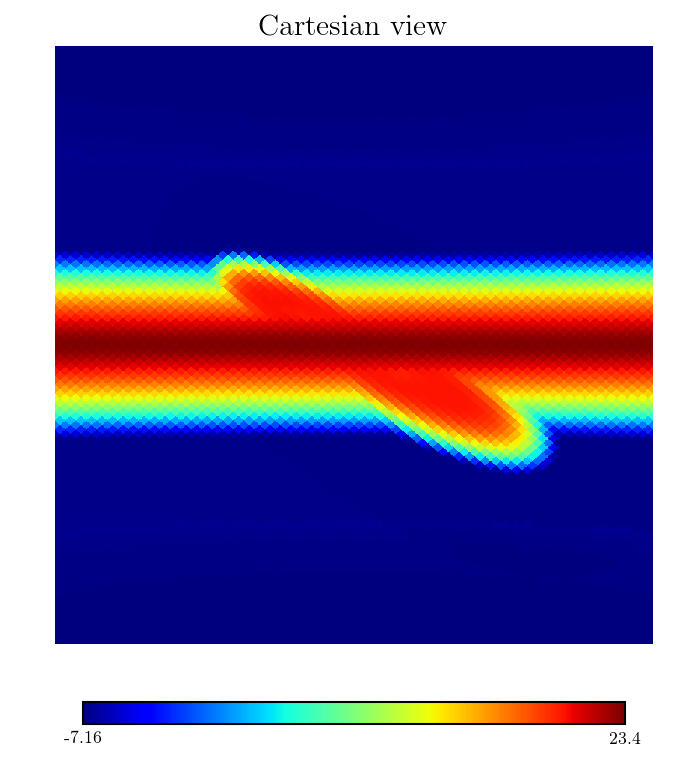

In [25]:
healpy.cartview(np.log10(h[1].data.field(10)), latra=[-20,20], lonra=[-20,20])

In [1]:
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10))

RuntimeError: dvipng was not able to process the following file:
/home/carlson/.cache/matplotlib/tex.cache/eb20a5a20de884e1a35f977fed97da32.dvi
Here is the full report generated by dvipng: 



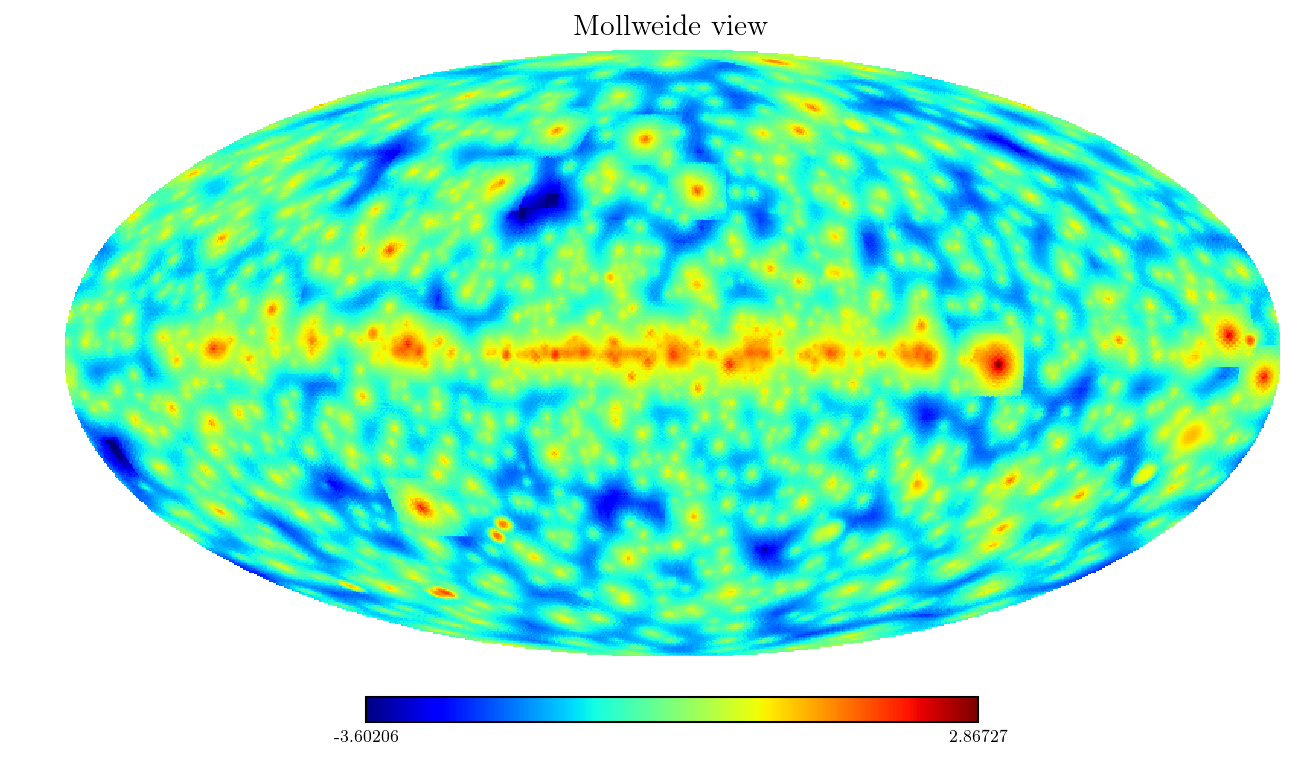

In [3]:
import healpy
healpy.mollview(np.log10(np.load('/data/PSC_3FGL_with_ext.npy')[0]))

-180.0 179.952505652 180.0 -179.82421875


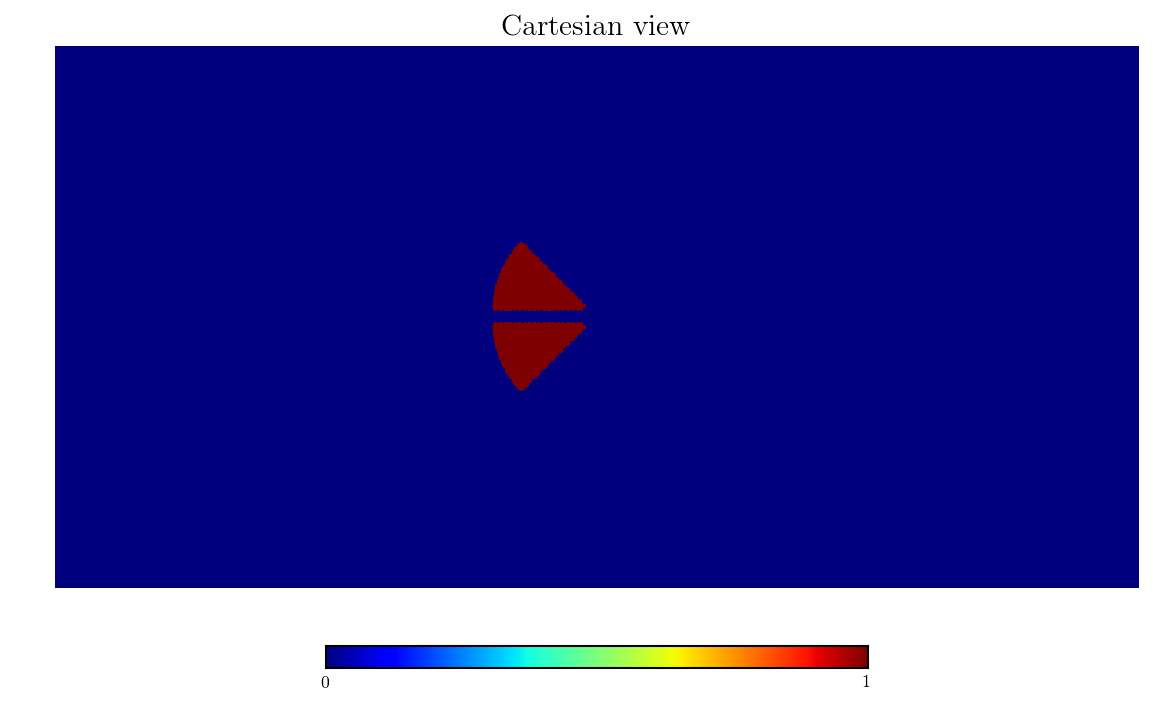

In [73]:

import Analysis
import Tools

def GenRadialMask(self, r1, r2, plane_mask=2, merge=False, start_angle=0., stop_angle=360.):
        '''
        Generate an annular mask with a plane cut out.

        :params r1: Inner radius in deg
        :params r2: Outer radius in deg
        :params plane_mask: Mask plus-minus "plane_mask" degrees in latitude
        :params merge: False will replace the current Analysis.mask.  In case one wants to combine multiple masks,
                    merge=True will apply the or operation between the exisiting and new mask
        :params start_angle: Stop and start angle must be specified in order to cut out an angular wedge beginning
                    from 0=+lon, 90=+lat, and 180=-lon. Start angle can be > stop angle to go through theta=0 
        :params stop_angle: Stop and start angle must be specified in order to cut out an angular wedge beginning
                    from 0=+lon, 90=+lat, and 180=-lon.  Start angle can be > stop angle to go through theta=0 
        :returns  mask: mask healpix array of dimension nside:
        '''

        pixels = np.arange(12*self.nside**2)
        l, b = Tools.hpix2ang(pixels, nside=self.nside) # Find l,b of each pixel
        r = Tools.Dist(0, l, 0, b)  # Find distance from origin
        mask = np.zeros(pixels.shape)
        l[l>180] -= 360
        
        angle_of_pixel = np.rad2deg(np.arctan2(-b,-l))
        
        print angle_of_pixel.min(), angle_of_pixel.max(), max(l), min(l)
        
        if stop_angle < 0: 
            stop_angle+=360
        
        if start_angle < 0: 
            start_angle+=360
        
        if stop_angle<start_angle: 
            mask[(r>r1) & (r<r2) & (np.abs(b)>plane_mask) & (start_angle <= (angle_of_pixel+180)) & ( (angle_of_pixel+180) <= 360)] = 1 # Unmask the annulus
            mask[(r>r1) & (r<r2) & (np.abs(b)>plane_mask) & (0 <= (angle_of_pixel+180)) & ( (angle_of_pixel+180) <= stop_angle)] = 1 # Unmask the annulus
                                                                                                     
        else:
            mask[(r>r1) & (r<r2) & (np.abs(b)>plane_mask) & (start_angle <= (angle_of_pixel+180)) & ( (angle_of_pixel+180) <= stop_angle)] = 1 # Unmask the annulus

        if merge is True:
            self.mask = (self.mask.astype(np.int32) | mask.astype(np.int32))
        else:
            self.mask = mask

        return mask
    
    
A = Analysis.Analysis()
import healpy

healpy.cartview(GenRadialMask(A, 5,35, plane_mask=2, merge=False, start_angle=-45, stop_angle=45))
    
    
    
    

    

In [10]:
print np.linspace(2,20,10)

[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]


In [11]:
import DM

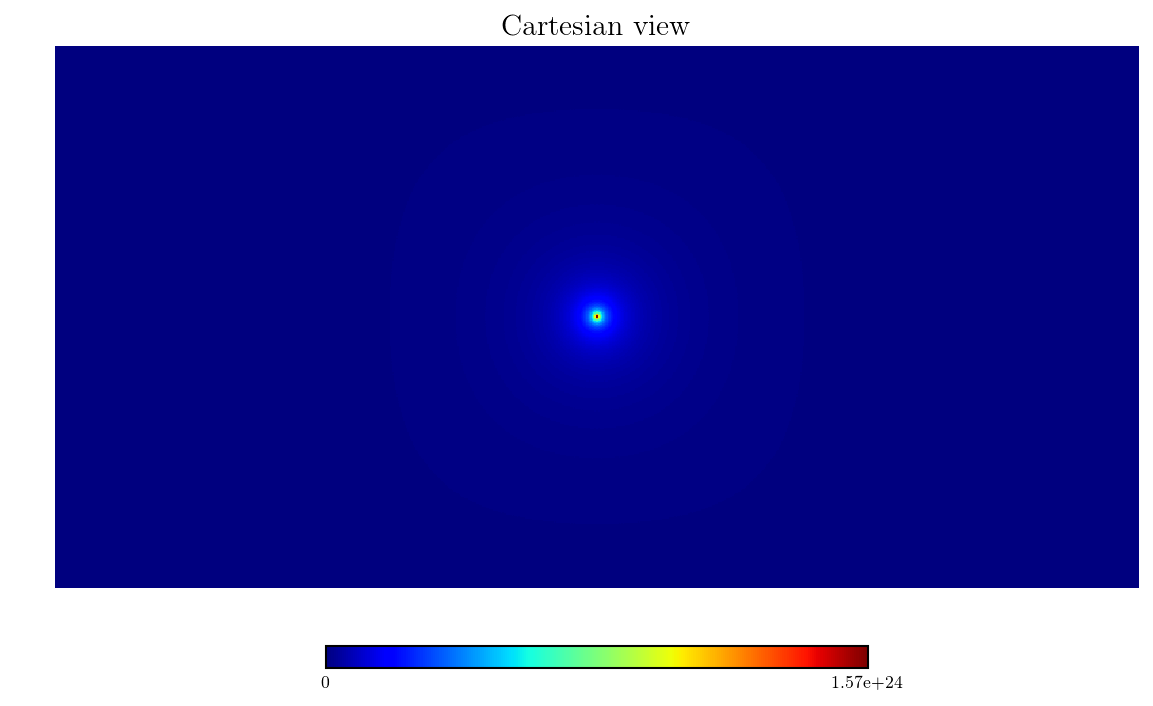

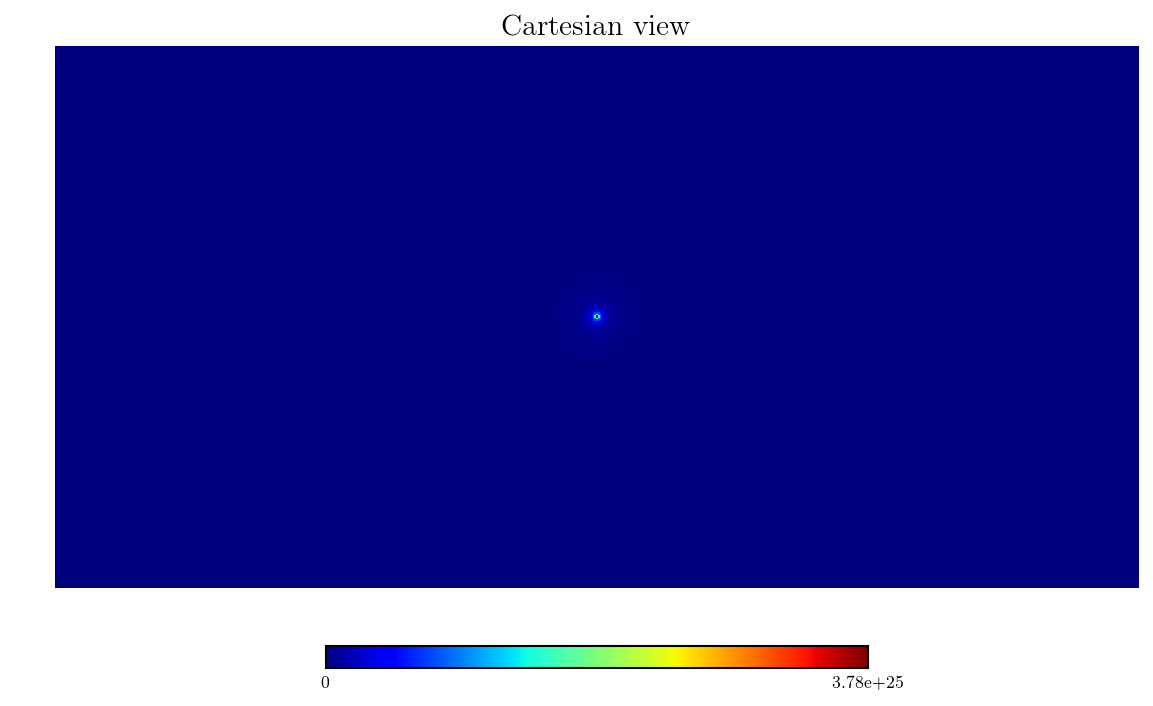

In [18]:
healpy.cartview(DM.GenNFW(gamma=.8))
healpy.cartview(DM.GenNFW(gamma=1.2))


In [1]:


import Analysis
import Tools

def LoadModel(basedir, galprop_tag):
    # Load various diffuse models and run fits.
    print 'Running Analysis for model', galprop_tag
    A = Analysis.Analysis(tag='P7REP_CLEAN_V15_calore', basepath='/data/GCE_sys/')
    A.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
    A.BinPhotons(infile='binned_photons_'+A.tag+'.npy')
    # Load 2FGL 
    A.AddPointSourceTemplate(fixNorm=True,pscmap='PSC_3FGL_with_ext.npy')
    A.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A.tag+'.npy',psc_model='PSC_3FGL_with_ext.npy',
                        alpha_psc=5., f_psc=0.1)
    A.AddIsotropicTemplate(fixNorm=False, fixSpectrum=False) # External chi^2 used to fix normalization within uncertainties
    
    A.AddFermiBubbleTemplate(template_file='./bubble_templates_diskcut30.0.fits', 
                         spec_file='./reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False, fixNorm=False)
    
    
    A.AddHDF5Template(hdf5file=basedir +'/'+ galprop_tag+'.hdf5',verbosity=1, multiplier=2., bremsfrac=1.25, 
                  E_subsample=2, fixSpectrum=False, separate_ics=False)
    return A
A = LoadModel('/data/GCE_sys/', 'base')

Running Analysis for model base
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...


 -180.0 179.952505652 180.0 -179.82421875
-180.0 179.952505652 180.0 -179.82421875
-180.0 179.952505652 180.0 -179.82421875
-180.0 179.952505652 180.0 -179.82421875
-180.0 179.952505652 180.0 -179.82421875
-180.0 179.952505652 180.0 -179.82421875


KeyboardInterrupt: 

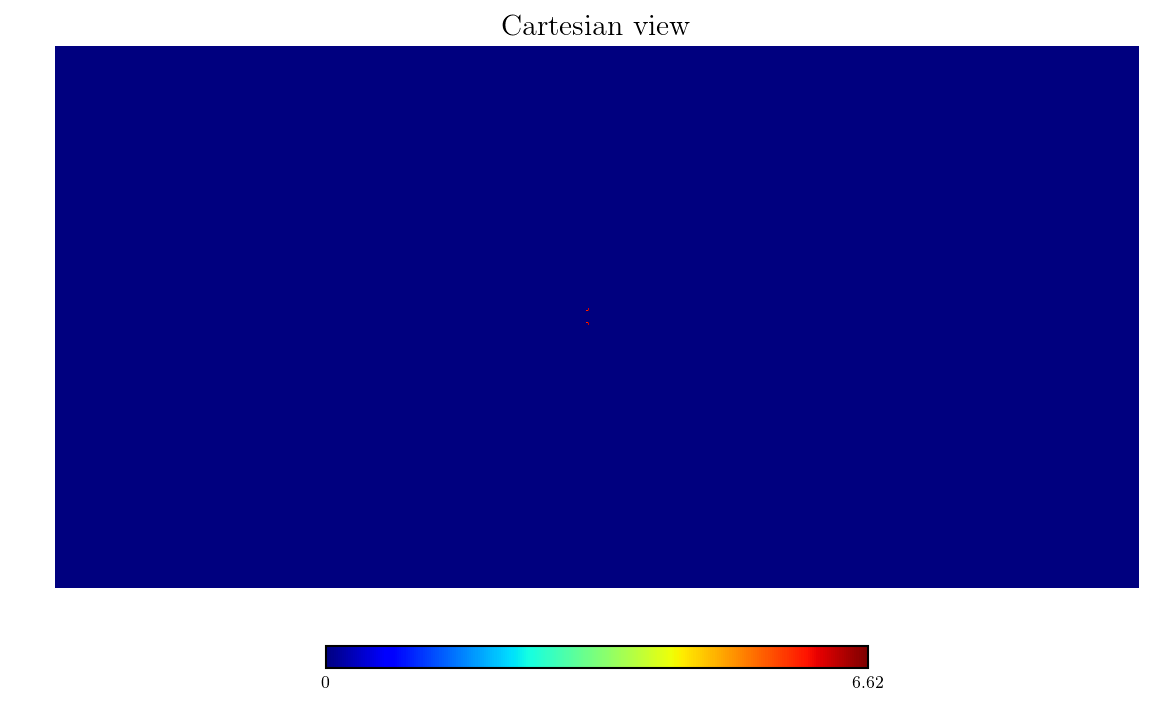

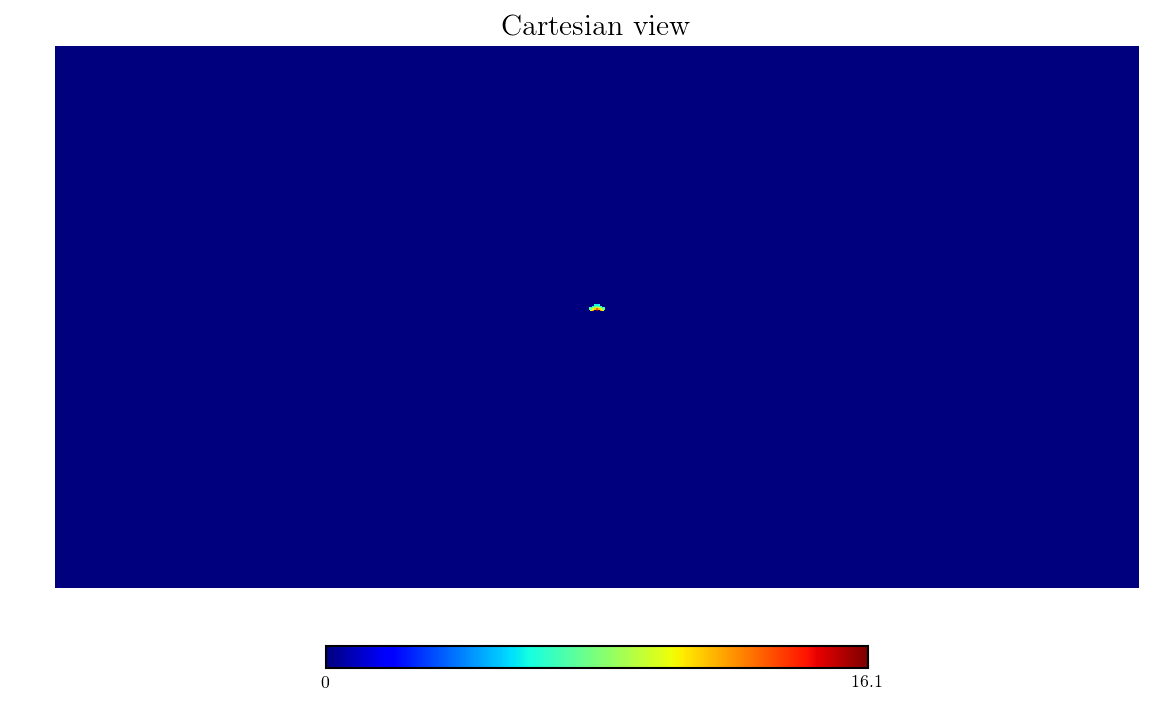

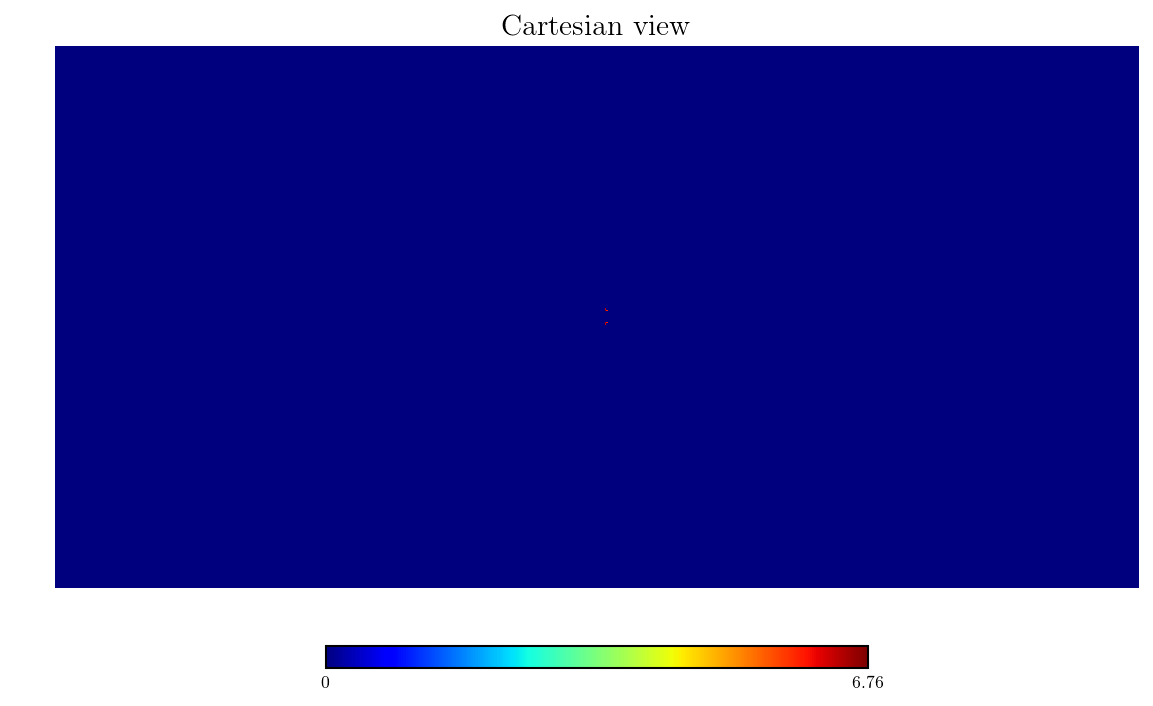

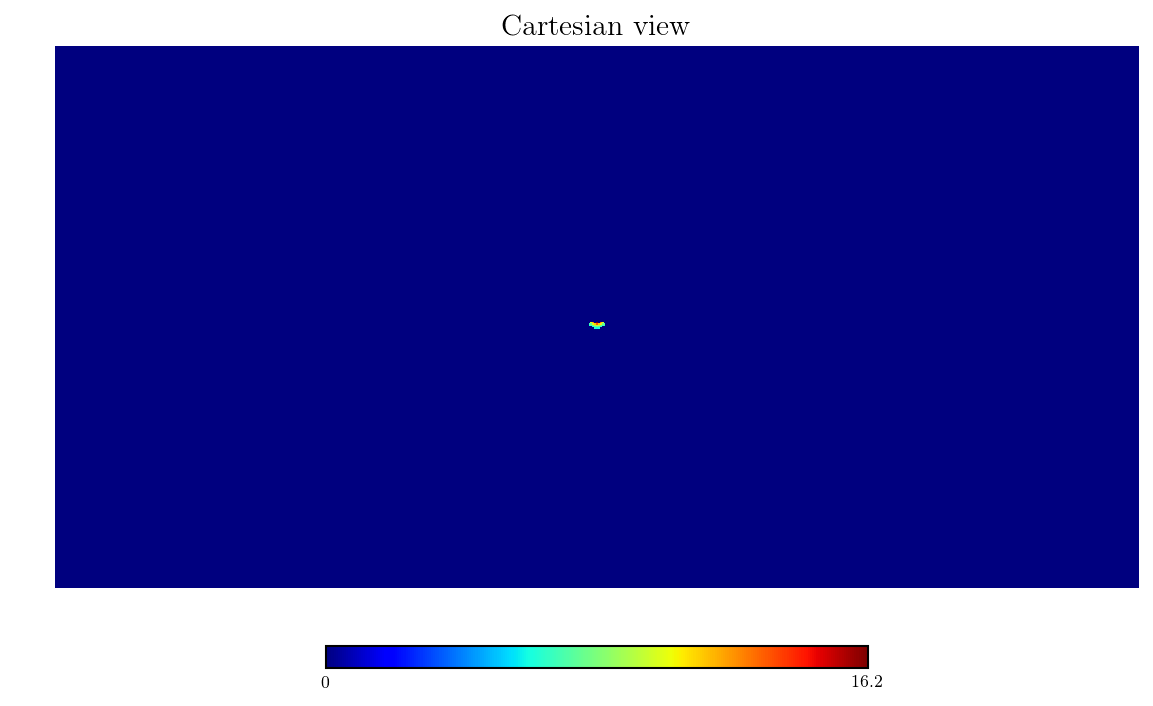

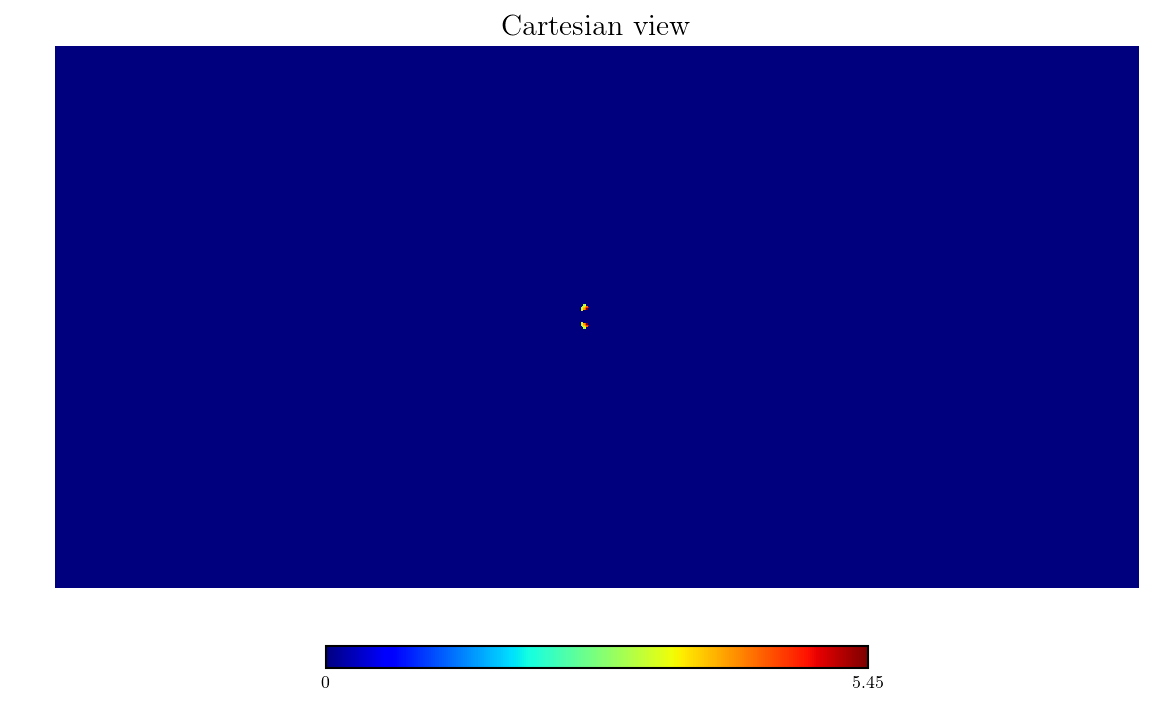

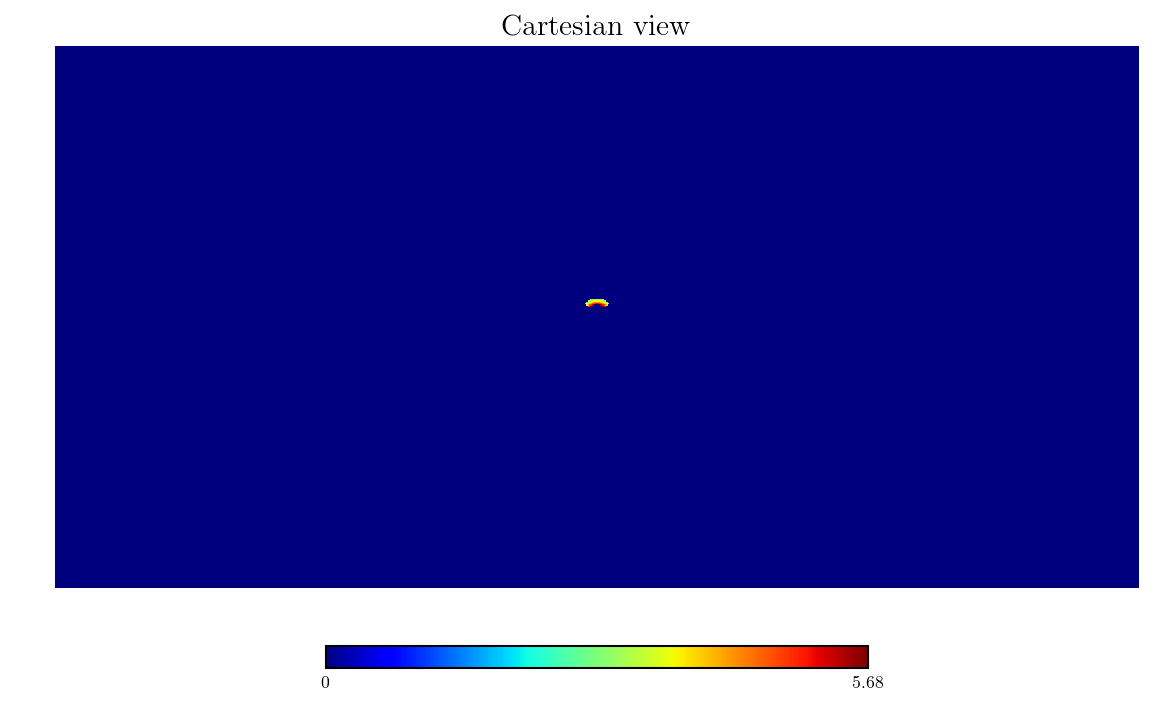

In [80]:
from copy import deepcopy

import healpy

# def GenRadialMask(self, r1, r2, plane_mask=2, merge=False):
#     '''
#     Generate an annular mask with a plane cut out.

#     :params r1: Inner radius in deg
#     :params r2: Outer radius in deg
#     :params plane_mask: Mask plus-minus "plane_mask" degrees in latitude
#     :param  merge: False will replace the current Analysis.mask.  In case one wants to combine multiple masks,
#                 merge=True will apply the or operation between the exisiting and new mask
#     :returns  mask: mask healpix array of dimension nside:
#     '''

#     pixels = np.arange(12*self.nside**2)
#     l, b = Tools.hpix2ang(pixels, nside=self.nside) # Find l,b of each pixel
#     r = Tools.Dist(0, l, 0, b)  # Find distance from origin
#     mask = np.zeros(pixels.shape)
#     mask[(r>r1) & (r<r2) & (np.abs(b)>plane_mask)] = 1 # Unmask the annulus

#     if merge is True:
#         self.mask = (self.mask.astype(np.int32) | mask.astype(np.int32))
#     else:
#         self.mask = mask

#     return mask


#-------------------------------------------
radius = np.linspace(2,20,10)
#radius = [2,4,10,15,20]
loglike_total, loglike, dm_spec, dm_spec_unc = [], [], [], []

test_master = np.zeros(shape=A.GenRadialMask(r1,r2, plane_mask=2, merge=False).shape)

A.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
                   r_s=20.0, axesratio=1, offset=(0, 0), spec_file=None)

for i_r, r in enumerate(radius[:-1]):
    quadrants = [['E', -45, 45], ['N', 45, 135], ['W', 135, 225], ['S', 225, 315]]

    for quad, start_angle, stop_angle in quadrants:
        r1, r2 = r, radius[i_r+1]

        
        
        mask = GenRadialMask(A, r1, r2, plane_mask=2, merge=False, start_angle=start_angle, stop_angle=stop_angle)
        # Now take isotropic template and copy it, multiplied by the mask            
        A.templateList['ring_%i'%i_r + '_' + quad] = deepcopy(A.templateList['DM'])
        
        # Loop over energy and multiply by mask.
        for i_E in range(A.n_bins):
            A.templateList['ring_%i'%i_r+ '_' + quad].healpixCube[i_E] *= mask
    
        healpy.cartview(A.templateList['ring_%i'%i_r + '_' + quad].healpixCube[10])


# A.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
#                r_s=20.0, axesratio=1, offset=(0, 0), spec_file=None,)




r_bins = [(radius[i], radius[i+1]) for i in range(len(radius)-1)]

In [15]:
A.PrintTemplates()

                NAME                    LIMITS      VALUE    FIXNORM    FIXSPEC   SRCCLASS
              ring_8              [None, None]  1.000e+00      False      False        ISO
                 PSC              [None, None]  1.000e+00       True       True        PSC
           Pi0_Brems              [None, None]  1.000e+00      False      False        GEN
              ring_4              [None, None]  1.000e+00      False      False        ISO
              ring_1              [None, None]  1.000e+00      False      False        ISO
           Isotropic              [None, None]  1.000e+00      False      False        ISO
                 ICS              [None, None]  1.000e+00      False      False        GEN
              ring_0              [None, None]  1.000e+00      False      False        ISO
             Bubbles              [None, None]  1.000e+00      False      False        GEN
              ring_2              [None, None]  1.000e+00      False      False        ISO

In [16]:
A.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]

Masking completed in 2.3239e+00 s
Write likelihood tempfile to  /tmp/tmpmgN4cT
Code generation completed in 1.3621e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


/tmp/tmpmgN4cT:36: RuntimeWarning: invalid value encountered in log
  neg_loglikelihood = np.sum(self.psc_weights*(model-self.data*np.log(model)))
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_0 = -5.687641
            PSC = +1.000000
    Pi0_Brems_0 = +0.448811
       ring_4_0 = -4.786592
       ring_1_0 = -1.593644
    Isotropic_0 = -5.687641
          ICS_0 = -0.112728
       ring_0_0 = +0.768846
      Bubbles_0 = -8.580375
       ring_2_0 = -4.085866
       ring_5_0 = -4.737302
       ring_3_0 = -4.848506
       ring_7_0 = -4.460012
       ring_6_0 = -4.796710

  m.migrad(ncall=5e4)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_0 = -6.022023
            PSC = +1.000000
    Pi0_Brems_0 = +0.421252
       ring_4_0 = -5.075922
       ring_1_0 = -1.723326
    Isotropic_0 = -6.022023
          ICS_0 = -0.168364
       ring_0_0 = +0.757288

FCN = -365443.023902 
 TOTAL NCALL = 277 
 NCALLS = 277 
 
 
 EDM = 0.000825005010841 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_0 
 2.830806e-01 
 2.177170e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 6.059173e-01 
 5.637562e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_0 
 4.353011e-01 
 1.687119e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_0 
 9.419798e-01 
 2.783108e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_0 
 2.830806e-01 
 2.177170e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_0 
 1.073580e+00 
 2.091025e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_0 
 1.054129e+00 
 2.960315e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_0 
 9.349273e-01 
 1.639172e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_0 
 7.268011e-01 
 2.315219e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_0 
 3.958550e-01 
 1.500240e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_0 
 5.539287e-01 
 1.919484e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_0 
 1.741618e-01 
 1.312149e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_0 
 1.017951e-01 
 1.324686e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{0}$ & 2.831e-01 & 2.177e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 6.059e-01 & 5.638e-03 & & & & & \\
\hline
4 & ring $4_{0}$ & 4.353e-01 & 1.687e-01 & & & & & \\
\hline
5 & ring $1_{0}$ & 9.420e-01 & 2.783e-01 & & & & & \\
\hline
6 & $Isotropic_{0}$ & 2.831e-01 & 2.177e-01 & & & & & \\
\hline
7 & $ICS_{0}$ & 1.074e+00 & 2.091e-02 & & & & & \\
\hline
8 & ring $0_{0}$ & 1.054e+00 & 2.960e-01 & & & & & \\
\hline
9 & $Bubbles_{0}$ & 9.349e-01 & 1.639e-01 & & & & & \\
\hline
10 & ring $2_{0}$ & 7.268e-01 & 2.315e-01 & & & & & \\
\hline
11 & ring $5_{0}$ & 3.959e-01 & 1.500e-01 & & & & & \\
\hline
12 & ring $3_{0}$ & 5.539e-01 & 1.919e-01 & & & & & \\
\hline
13 & ring $7_{0}$ & 1.742e-01 & 1.312e-01 & & & & & \\
\hline
14 & ring $6_{0}$ & 1.018e-01 & 1.325e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   6.40e-01 s
Masking completed in 1.9743e+00 s
Write likelihood tempfile to  /tmp/tmpdeHi8i
Code generation completed in 1.8802e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_1 = -5.174153
            PSC = +1.000000
    Pi0_Brems_1 = +0.482708
       ring_4_1 = -3.928591
       ring_1_1 = -1.041049
    Isotropic_1 = -5.174153
          ICS_1 = -0.076206
       ring_0_1 = +0.826101
      Bubbles_1 = -7.765239
       ring_2_1 = -2.896611
       ring_5_1 = -4.370384
       ring_3_1 = -3.878777
       ring_7_1 = -4.227064
       ring_6_1 = -4.574769

  m.migrad(ncall=5e4)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_1 = -5.482861
            PSC = +1.000000
    Pi0_Brems_1 = +0.456843
       ring_4_1 = -4.175020
       ring_1_1 = -1.143101
    Isotropic_1 = -5.482861
          ICS_1 = -0.130016
       ring_0_1 = +0.817406
      Bubbles_1 = -8.203501
       ring_2_1 = -3.091442
       ring_5_1 = -4.638903
       ring_3_1 = -4.122716
       ring_7_1 = -4.488417
      

FCN = -273911.489646 
 TOTAL NCALL = 277 
 NCALLS = 277 
 
 
 EDM = 0.000544026398764 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_1 
 3.270894e-01 
 2.056554e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 6.248436e-01 
 6.047730e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_1 
 6.524903e-01 
 1.747241e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_1 
 1.206419e+00 
 2.554414e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_1 
 3.270894e-01 
 2.056554e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_1 
 1.081475e+00 
 2.194918e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_1 
 1.020375e+00 
 2.735803e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_1 
 6.079396e-01 
 1.647185e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_1 
 1.024501e+00 
 2.251422e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_1 
 3.558332e-01 
 1.580370e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_1 
 6.296485e-01 
 1.964668e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_1 
 1.478193e-01 
 1.404519e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_1 
 1.047351e-01 
 1.445672e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{1}$ & 3.271e-01 & 2.057e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 6.248e-01 & 6.048e-03 & & & & & \\
\hline
4 & ring $4_{1}$ & 6.525e-01 & 1.747e-01 & & & & & \\
\hline
5 & ring $1_{1}$ & 1.206e+00 & 2.554e-01 & & & & & \\
\hline
6 & $Isotropic_{1}$ & 3.271e-01 & 2.057e-01 & & & & & \\
\hline
7 & $ICS_{1}$ & 1.081e+00 & 2.195e-02 & & & & & \\
\hline
8 & ring $0_{1}$ & 1.020e+00 & 2.736e-01 & & & & & \\
\hline
9 & $Bubbles_{1}$ & 6.079e-01 & 1.647e-01 & & & & & \\
\hline
10 & ring $2_{1}$ & 1.025e+00 & 2.251e-01 & & & & & \\
\hline
11 & ring $5_{1}$ & 3.558e-01 & 1.580e-01 & & & & & \\
\hline
12 & ring $3_{1}$ & 6.296e-01 & 1.965e-01 & & & & & \\
\hline
13 & ring $7_{1}$ & 1.478e-01 & 1.405e-01 & & & & & \\
\hline
14 & ring $6_{1}$ & 1.047e-01 & 1.446e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   4.50e-01 s
Masking completed in 2.0404e+00 s
Write likelihood tempfile to  /tmp/tmpZ0hMns
Code generation completed in 1.8899e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_2 = -4.366906
            PSC = +1.000000
    Pi0_Brems_2 = +0.535238
       ring_4_2 = -3.039268
       ring_1_2 = -0.538028
    Isotropic_2 = -4.366906
          ICS_2 = +0.001223
       ring_0_2 = +0.894140
      Bubbles_2 = -6.232607
       ring_2_2 = -1.974063
       ring_5_2 = -3.082315
       ring_3_2 = -2.698885
       ring_7_2 = -3.096524
       ring_6_2 = -3.424397

  m.migrad(ncall=5e4)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_2 = -4.635251
            PSC = +1.000000
    Pi0_Brems_2 = +0.512000
       ring_4_2 = -3.241231
       ring_1_2 = -0.614930
    Isotropic_2 = -4.635251
          ICS_2 = -0.048715
       ring_0_2 = +0.888847
      Bubbles_2 = -6.594237
       ring_2_2 = -2.122766
       ring_5_2 = -3.286431
       ring_3_2 = -2.883830
       ring_7_2 = -3.301350
      

FCN = -202536.935594 
 TOTAL NCALL = 273 
 NCALLS = 273 
 
 
 EDM = 0.000338698882304 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_2 
 3.230736e-01 
 1.897554e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 6.558439e-01 
 6.628736e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_2 
 6.070450e-01 
 1.750221e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_2 
 1.241249e+00 
 2.323712e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_2 
 3.230736e-01 
 1.897554e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_2 
 1.054560e+00 
 2.319823e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_2 
 1.041334e+00 
 2.464868e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_2 
 8.071714e-01 
 1.603132e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_2 
 9.449777e-01 
 2.123541e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_2 
 6.648069e-01 
 1.581000e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_2 
 7.419747e-01 
 1.923885e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_2 
 4.236195e-01 
 1.433345e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_2 
 3.370337e-01 
 1.482800e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{2}$ & 3.231e-01 & 1.898e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 6.558e-01 & 6.629e-03 & & & & & \\
\hline
4 & ring $4_{2}$ & 6.070e-01 & 1.750e-01 & & & & & \\
\hline
5 & ring $1_{2}$ & 1.241e+00 & 2.324e-01 & & & & & \\
\hline
6 & $Isotropic_{2}$ & 3.231e-01 & 1.898e-01 & & & & & \\
\hline
7 & $ICS_{2}$ & 1.055e+00 & 2.320e-02 & & & & & \\
\hline
8 & ring $0_{2}$ & 1.041e+00 & 2.465e-01 & & & & & \\
\hline
9 & $Bubbles_{2}$ & 8.072e-01 & 1.603e-01 & & & & & \\
\hline
10 & ring $2_{2}$ & 9.450e-01 & 2.124e-01 & & & & & \\
\hline
11 & ring $5_{2}$ & 6.648e-01 & 1.581e-01 & & & & & \\
\hline
12 & ring $3_{2}$ & 7.420e-01 & 1.924e-01 & & & & & \\
\hline
13 & ring $7_{2}$ & 4.236e-01 & 1.433e-01 & & & & & \\
\hline
14 & ring $6_{2}$ & 3.370e-01 & 1.483e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   4.47e-01 s
Masking completed in 2.0134e+00 s
Write likelihood tempfile to  /tmp/tmpol6iyz
Code generation completed in 1.6445e-01 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_3 = -3.876120
            PSC = +1.000000
    Pi0_Brems_3 = +0.553808
       ring_4_3 = -2.154187
       ring_1_3 = -0.060140
    Isotropic_3 = -3.876120
          ICS_3 = +0.025921
       ring_0_3 = +0.911639
      Bubbles_3 = -6.116125
       ring_2_3 = -1.070049
       ring_5_3 = -2.492525
       ring_3_3 = -1.771025
       ring_7_3 = -2.775812
       ring_6_3 = -2.744448

  m.migrad(ncall=5e4)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_3 = -4.119926
            PSC = +1.000000
    Pi0_Brems_3 = +0.531498
       ring_4_3 = -2.311896
       ring_1_3 = -0.113147
    Isotropic_3 = -4.119926
          ICS_3 = -0.022783
       ring_0_3 = +0.907221
      Bubbles_3 = -6.471932
       ring_2_3 = -1.173551
       ring_5_3 = -2.667151
       ring_3_3 = -1.909576
       ring_7_3 = -2.964602
      

FCN = -149104.574396 
 TOTAL NCALL = 273 
 NCALLS = 273 
 
 
 EDM = 0.000322606949383 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_3 
 2.998355e-01 
 1.762023e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 6.653036e-01 
 7.165894e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_3 
 8.041358e-01 
 1.721360e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_3 
 1.243159e+00 
 2.130106e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_3 
 2.998355e-01 
 1.762023e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_3 
 1.066799e+00 
 2.449672e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_3 
 1.005933e+00 
 2.226374e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_3 
 5.394208e-01 
 1.678092e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_3 
 1.100715e+00 
 1.995576e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_3 
 6.879295e-01 
 1.583366e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_3 
 8.752458e-01 
 1.853978e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_3 
 3.844037e-01 
 1.462147e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_3 
 5.272579e-01 
 1.499358e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{3}$ & 2.998e-01 & 1.762e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 6.653e-01 & 7.166e-03 & & & & & \\
\hline
4 & ring $4_{3}$ & 8.041e-01 & 1.721e-01 & & & & & \\
\hline
5 & ring $1_{3}$ & 1.243e+00 & 2.130e-01 & & & & & \\
\hline
6 & $Isotropic_{3}$ & 2.998e-01 & 1.762e-01 & & & & & \\
\hline
7 & $ICS_{3}$ & 1.067e+00 & 2.450e-02 & & & & & \\
\hline
8 & ring $0_{3}$ & 1.006e+00 & 2.226e-01 & & & & & \\
\hline
9 & $Bubbles_{3}$ & 5.394e-01 & 1.678e-01 & & & & & \\
\hline
10 & ring $2_{3}$ & 1.101e+00 & 1.996e-01 & & & & & \\
\hline
11 & ring $5_{3}$ & 6.879e-01 & 1.583e-01 & & & & & \\
\hline
12 & ring $3_{3}$ & 8.752e-01 & 1.854e-01 & & & & & \\
\hline
13 & ring $7_{3}$ & 3.844e-01 & 1.462e-01 & & & & & \\
\hline
14 & ring $6_{3}$ & 5.273e-01 & 1.499e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   6.24e-01 s
Masking completed in 2.2462e+00 s
Write likelihood tempfile to  /tmp/tmprhPgAm
Code generation completed in 1.8439e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_4 = -2.503397
            PSC = +1.000000
    Pi0_Brems_4 = +0.615062
       ring_4_4 = -1.316367
       ring_1_4 = +0.259969
    Isotropic_4 = -2.503397
          ICS_4 = +0.129653
       ring_0_4 = +0.962960
      Bubbles_4 = -4.822766
       ring_2_4 = -0.424260
       ring_5_4 = -1.663032
       ring_3_4 = -0.896381
       ring_7_4 = -1.864013
       ring_6_4 = -1.902288

  m.migrad(ncall=5e4)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_4 = -2.678566
            PSC = +1.000000
    Pi0_Brems_4 = +0.595816
       ring_4_4 = -1.432185
       ring_1_4 = +0.222967
    Isotropic_4 = -2.678566
          ICS_4 = +0.086135
       ring_0_4 = +0.961108
      Bubbles_4 = -5.113904
       ring_2_4 = -0.495473
       ring_5_4 = -1.796184
       ring_3_4 = -0.991200
       ring_7_4 = -2.007214
      

FCN = -140731.223218 
 TOTAL NCALL = 269 
 NCALLS = 269 
 
 
 EDM = 0.000234481152538 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_4 
 5.070950e-01 
 1.523543e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 7.054581e-01 
 7.274716e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_4 
 8.074049e-01 
 1.536985e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_4 
 1.172883e+00 
 1.812864e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_4 
 5.070950e-01 
 1.523543e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_4 
 1.051502e+00 
 2.535284e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_4 
 1.037994e+00 
 1.878623e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_4 
 5.159914e-01 
 1.549613e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_4 
 1.048641e+00 
 1.726607e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_4 
 6.822946e-01 
 1.429250e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_4 
 9.417273e-01 
 1.628904e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_4 
 5.202727e-01 
 1.334850e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_4 
 5.838791e-01 
 1.365447e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{4}$ & 5.071e-01 & 1.524e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 7.055e-01 & 7.275e-03 & & & & & \\
\hline
4 & ring $4_{4}$ & 8.074e-01 & 1.537e-01 & & & & & \\
\hline
5 & ring $1_{4}$ & 1.173e+00 & 1.813e-01 & & & & & \\
\hline
6 & $Isotropic_{4}$ & 5.071e-01 & 1.524e-01 & & & & & \\
\hline
7 & $ICS_{4}$ & 1.052e+00 & 2.535e-02 & & & & & \\
\hline
8 & ring $0_{4}$ & 1.038e+00 & 1.879e-01 & & & & & \\
\hline
9 & $Bubbles_{4}$ & 5.160e-01 & 1.550e-01 & & & & & \\
\hline
10 & ring $2_{4}$ & 1.049e+00 & 1.727e-01 & & & & & \\
\hline
11 & ring $5_{4}$ & 6.823e-01 & 1.429e-01 & & & & & \\
\hline
12 & ring $3_{4}$ & 9.417e-01 & 1.629e-01 & & & & & \\
\hline
13 & ring $7_{4}$ & 5.203e-01 & 1.335e-01 & & & & & \\
\hline
14 & ring $6_{4}$ & 5.839e-01 & 1.365e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.59e-01 s
Masking completed in 2.2157e+00 s
Write likelihood tempfile to  /tmp/tmp205qzm
Code generation completed in 2.0890e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_5 = -2.225527
            PSC = +1.000000
    Pi0_Brems_5 = +0.603750
       ring_4_5 = -0.808248
       ring_1_5 = +0.477320
    Isotropic_5 = -2.225527
          ICS_5 = +0.091787
       ring_0_5 = +0.955736
      Bubbles_5 = -4.743941
       ring_2_5 = +0.062035
       ring_5_5 = -1.191607
       ring_3_5 = -0.428155
       ring_7_5 = -1.385212
       ring_6_5 = -1.516886

  m.migrad(ncall=5e4)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_5 = -2.386803
            PSC = +1.000000
    Pi0_Brems_5 = +0.583938
       ring_4_5 = -0.898661
       ring_1_5 = +0.451186
    Isotropic_5 = -2.386803
          ICS_5 = +0.046376
       ring_0_5 = +0.953523
      Bubbles_5 = -5.031138
       ring_2_5 = +0.015136
       ring_5_5 = -1.301188
       ring_3_5 = -0.499562
       ring_7_5 = -1.504473
      

FCN = -135445.813215 
 TOTAL NCALL = 265 
 NCALLS = 265 
 
 
 EDM = 0.000383212733368 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_5 
 4.264479e-01 
 1.300735e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 7.055934e-01 
 7.268955e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_5 
 8.962315e-01 
 1.340495e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_5 
 1.201110e+00 
 1.511754e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_5 
 4.264479e-01 
 1.300735e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_5 
 1.024792e+00 
 2.503675e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_5 
 1.017672e+00 
 1.551960e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_5 
 5.786321e-01 
 1.463894e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_5 
 1.202311e+00 
 1.457521e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_5 
 7.632644e-01 
 1.268838e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_5 
 1.009778e+00 
 1.399730e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_5 
 6.275669e-01 
 1.195697e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_5 
 5.946467e-01 
 1.222183e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{5}$ & 4.264e-01 & 1.301e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 7.056e-01 & 7.269e-03 & & & & & \\
\hline
4 & ring $4_{5}$ & 8.962e-01 & 1.340e-01 & & & & & \\
\hline
5 & ring $1_{5}$ & 1.201e+00 & 1.512e-01 & & & & & \\
\hline
6 & $Isotropic_{5}$ & 4.264e-01 & 1.301e-01 & & & & & \\
\hline
7 & $ICS_{5}$ & 1.025e+00 & 2.504e-02 & & & & & \\
\hline
8 & ring $0_{5}$ & 1.018e+00 & 1.552e-01 & & & & & \\
\hline
9 & $Bubbles_{5}$ & 5.786e-01 & 1.464e-01 & & & & & \\
\hline
10 & ring $2_{5}$ & 1.202e+00 & 1.458e-01 & & & & & \\
\hline
11 & ring $5_{5}$ & 7.633e-01 & 1.269e-01 & & & & & \\
\hline
12 & ring $3_{5}$ & 1.010e+00 & 1.400e-01 & & & & & \\
\hline
13 & ring $7_{5}$ & 6.276e-01 & 1.196e-01 & & & & & \\
\hline
14 & ring $6_{5}$ & 5.946e-01 & 1.222e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   4.46e-01 s
Masking completed in 2.0127e+00 s
Write likelihood tempfile to  /tmp/tmp9RCLMb
Code generation completed in 1.8551e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_6 = -1.223420
            PSC = +1.000000
    Pi0_Brems_6 = +0.653953
       ring_4_6 = -0.146926
       ring_1_6 = +0.699742
    Isotropic_6 = -1.223420
          ICS_6 = +0.195776
       ring_0_6 = +0.976368
      Bubbles_6 = -3.718350
       ring_2_6 = +0.380240
       ring_5_6 = -0.483786
       ring_3_6 = +0.051907
       ring_7_6 = -0.675077
       ring_6_6 = -0.804693

  m.migrad(ncall=5e4)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_6 = -1.334591
            PSC = +1.000000
    Pi0_Brems_6 = +0.636650
       ring_4_6 = -0.204272
       ring_1_6 = +0.684729
    Isotropic_6 = -1.334591
          ICS_6 = +0.155565
       ring_0_6 = +0.975187
      Bubbles_6 = -3.954267
       ring_2_6 = +0.349252
       ring_5_6 = -0.557975
       ring_3_6 = +0.004502
       ring_7_6 = -0.758831
      

FCN = -129388.607195 
 TOTAL NCALL = 259 
 NCALLS = 259 
 
 
 EDM = 0.000174165359483 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_6 
 5.768720e-01 
 1.105160e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 7.393416e-01 
 7.532532e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_6 
 1.006804e+00 
 1.148252e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_6 
 1.205474e+00 
 1.259652e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_6 
 5.768720e-01 
 1.105160e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_6 
 9.965660e-01 
 2.561029e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_6 
 1.029755e+00 
 1.284520e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_6 
 7.434709e-01 
 1.385434e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_6 
 1.132478e+00 
 1.226517e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_6 
 8.531610e-01 
 1.099088e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_6 
 1.008435e+00 
 1.188935e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_6 
 7.412885e-01 
 1.049379e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_6 
 6.661282e-01 
 1.067425e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{6}$ & 5.769e-01 & 1.105e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 7.393e-01 & 7.533e-03 & & & & & \\
\hline
4 & ring $4_{6}$ & 1.007e+00 & 1.148e-01 & & & & & \\
\hline
5 & ring $1_{6}$ & 1.205e+00 & 1.260e-01 & & & & & \\
\hline
6 & $Isotropic_{6}$ & 5.769e-01 & 1.105e-01 & & & & & \\
\hline
7 & $ICS_{6}$ & 9.966e-01 & 2.561e-02 & & & & & \\
\hline
8 & ring $0_{6}$ & 1.030e+00 & 1.285e-01 & & & & & \\
\hline
9 & $Bubbles_{6}$ & 7.435e-01 & 1.385e-01 & & & & & \\
\hline
10 & ring $2_{6}$ & 1.132e+00 & 1.227e-01 & & & & & \\
\hline
11 & ring $5_{6}$ & 8.532e-01 & 1.099e-01 & & & & & \\
\hline
12 & ring $3_{6}$ & 1.008e+00 & 1.189e-01 & & & & & \\
\hline
13 & ring $7_{6}$ & 7.413e-01 & 1.049e-01 & & & & & \\
\hline
14 & ring $6_{6}$ & 6.661e-01 & 1.067e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   4.31e-01 s
Masking completed in 2.0985e+00 s
Write likelihood tempfile to  /tmp/tmpSWy0QK
Code generation completed in 1.8752e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_7 = -0.947726
            PSC = +1.000000
    Pi0_Brems_7 = +0.654414
       ring_4_7 = -0.005633
       ring_1_7 = +0.683019
    Isotropic_7 = -0.947726
          ICS_7 = +0.194055
       ring_0_7 = +0.980007
      Bubbles_7 = -3.482358
       ring_2_7 = +0.522364
       ring_5_7 = -0.351068
       ring_3_7 = +0.204227
       ring_7_7 = -0.563328
       ring_6_7 = -0.529140

  m.migrad(ncall=5e4)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_7 = -1.045112
            PSC = +1.000000
    Pi0_Brems_7 = +0.637134
       ring_4_7 = -0.055914
       ring_1_7 = +0.667170
    Isotropic_7 = -1.045112
          ICS_7 = +0.153758
       ring_0_7 = +0.979007
      Bubbles_7 = -3.706476
       ring_2_7 = +0.498482
       ring_5_7 = -0.418621
       ring_3_7 = +0.164439
       ring_7_7 = -0.641495
      

FCN = -118673.906571 
 TOTAL NCALL = 259 
 NCALLS = 259 
 
 
 EDM = 0.000182428732954 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_7 
 6.331873e-01 
 1.054892e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 7.419416e-01 
 7.675793e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_7 
 9.896817e-01 
 1.099062e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_7 
 1.105110e+00 
 1.183542e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_7 
 6.331873e-01 
 1.054892e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_7 
 9.893085e-01 
 2.585236e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_7 
 1.029936e+00 
 1.202643e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_7 
 7.135605e-01 
 1.318042e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_7 
 1.166260e+00 
 1.158585e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_7 
 8.264705e-01 
 1.061145e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_7 
 1.019628e+00 
 1.129760e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_7 
 7.034622e-01 
 1.019433e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_7 
 7.785717e-01 
 1.032714e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{7}$ & 6.332e-01 & 1.055e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 7.419e-01 & 7.676e-03 & & & & & \\
\hline
4 & ring $4_{7}$ & 9.897e-01 & 1.099e-01 & & & & & \\
\hline
5 & ring $1_{7}$ & 1.105e+00 & 1.184e-01 & & & & & \\
\hline
6 & $Isotropic_{7}$ & 6.332e-01 & 1.055e-01 & & & & & \\
\hline
7 & $ICS_{7}$ & 9.893e-01 & 2.585e-02 & & & & & \\
\hline
8 & ring $0_{7}$ & 1.030e+00 & 1.203e-01 & & & & & \\
\hline
9 & $Bubbles_{7}$ & 7.136e-01 & 1.318e-01 & & & & & \\
\hline
10 & ring $2_{7}$ & 1.166e+00 & 1.159e-01 & & & & & \\
\hline
11 & ring $5_{7}$ & 8.265e-01 & 1.061e-01 & & & & & \\
\hline
12 & ring $3_{7}$ & 1.020e+00 & 1.130e-01 & & & & & \\
\hline
13 & ring $7_{7}$ & 7.035e-01 & 1.019e-01 & & & & & \\
\hline
14 & ring $6_{7}$ & 7.786e-01 & 1.033e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   4.29e-01 s
Masking completed in 2.0376e+00 s
Write likelihood tempfile to  /tmp/tmpSLFQbH
Code generation completed in 1.8880e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_8 = -0.663679
            PSC = +1.000000
    Pi0_Brems_8 = +0.687496
       ring_4_8 = +0.275791
       ring_1_8 = +0.755381
    Isotropic_8 = -0.663679
          ICS_8 = +0.271476
       ring_0_8 = +0.980016
      Bubbles_8 = -3.007151
       ring_2_8 = +0.639759
       ring_5_8 = -0.031067
       ring_3_8 = +0.471814
       ring_7_8 = -0.419852
       ring_6_8 = -0.325210

  m.migrad(ncall=5e4)#, precision=precision)
GammaLikelihood.py:548: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
       ring_8_8 = -0.746863
            PSC = +1.000000
    Pi0_Brems_8 = +0.671871
       ring_4_8 = +0.239581
       ring_1_8 = +0.743150
    Isotropic_8 = -0.746863
          ICS_8 = +0.235050
       ring_0_8 = +0.979017
      Bubbles_8 = -3.207508
       ring_2_8 = +0.621747
       ring_5_8 = -0.082620
       ring_3_8 = +0.445405
       ring_7_8 = -0.490844
      

FCN = -107835.813829 
 TOTAL NCALL = 259 
 NCALLS = 259 
 
 
 EDM = 9.26784326306e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_8 
 6.693119e-01 
 1.033191e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 7.596376e-01 
 7.933015e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_8 
 1.095188e+00 
 1.074413e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_8 
 1.114493e+00 
 1.147613e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_8 
 6.693119e-01 
 1.033191e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_8 
 1.004221e+00 
 2.612865e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_8 
 1.030775e+00 
 1.163713e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_8 
 6.171259e-01 
 1.276620e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_8 
 1.168725e+00 
 1.127285e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_8 
 9.403141e-01 
 1.041240e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_8 
 1.151796e+00 
 1.100737e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_8 
 6.546569e-01 
 1.009363e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_8 
 7.765465e-01 
 1.020624e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{8}$ & 6.693e-01 & 1.033e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 7.596e-01 & 7.933e-03 & & & & & \\
\hline
4 & ring $4_{8}$ & 1.095e+00 & 1.074e-01 & & & & & \\
\hline
5 & ring $1_{8}$ & 1.114e+00 & 1.148e-01 & & & & & \\
\hline
6 & $Isotropic_{8}$ & 6.693e-01 & 1.033e-01 & & & & & \\
\hline
7 & $ICS_{8}$ & 1.004e+00 & 2.613e-02 & & & & & \\
\hline
8 & ring $0_{8}$ & 1.031e+00 & 1.164e-01 & & & & & \\
\hline
9 & $Bubbles_{8}$ & 6.171e-01 & 1.277e-01 & & & & & \\
\hline
10 & ring $2_{8}$ & 1.169e+00 & 1.127e-01 & & & & & \\
\hline
11 & ring $5_{8}$ & 9.403e-01 & 1.041e-01 & & & & & \\
\hline
12 & ring $3_{8}$ & 1.152e+00 & 1.101e-01 & & & & & \\
\hline
13 & ring $7_{8}$ & 6.547e-01 & 1.009e-01 & & & & & \\
\hline
14 & ring $6_{8}$ & 7.765e-01 & 1.021e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   4.51e-01 s
Masking completed in 2.1069e+00 s
Write likelihood tempfile to  /tmp/tmpIY2XPj
Code generation completed in 1.8771e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -96065.032579 
 TOTAL NCALL = 360 
 NCALLS = 360 
 
 
 EDM = 7.18748568669e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_9 
 6.199624e-01 
 9.983935e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 7.562428e-01 
 8.213433e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_9 
 1.047753e+00 
 1.046424e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_9 
 1.141869e+00 
 1.121637e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_9 
 6.199624e-01 
 9.983935e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_9 
 1.062775e+00 
 2.537525e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_9 
 1.031375e+00 
 1.140826e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_9 
 5.862568e-01 
 1.152319e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_9 
 1.107753e+00 
 1.100233e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_9 
 8.897907e-01 
 1.009477e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_9 
 1.107677e+00 
 1.073281e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_9 
 7.893024e-01 
 9.674520e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_9 
 8.988000e-01 
 9.814468e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{9}$ & 6.200e-01 & 9.984e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 7.562e-01 & 8.213e-03 & & & & & \\
\hline
4 & ring $4_{9}$ & 1.048e+00 & 1.046e-01 & & & & & \\
\hline
5 & ring $1_{9}$ & 1.142e+00 & 1.122e-01 & & & & & \\
\hline
6 & $Isotropic_{9}$ & 6.200e-01 & 9.984e-02 & & & & & \\
\hline
7 & $ICS_{9}$ & 1.063e+00 & 2.538e-02 & & & & & \\
\hline
8 & ring $0_{9}$ & 1.031e+00 & 1.141e-01 & & & & & \\
\hline
9 & $Bubbles_{9}$ & 5.863e-01 & 1.152e-01 & & & & & \\
\hline
10 & ring $2_{9}$ & 1.108e+00 & 1.100e-01 & & & & & \\
\hline
11 & ring $5_{9}$ & 8.898e-01 & 1.009e-01 & & & & & \\
\hline
12 & ring $3_{9}$ & 1.108e+00 & 1.073e-01 & & & & & \\
\hline
13 & ring $7_{9}$ & 7.893e-01 & 9.675e-02 & & & & & \\
\hline
14 & ring $6_{9}$ & 8.988e-01 & 9.814e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.87e-01 s
Masking completed in 2.0621e+00 s
Write likelihood tempfile to  /tmp/tmpGQDRY5
Code generation completed in 1.8811e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -81033.4542383 
 TOTAL NCALL = 330 
 NCALLS = 330 
 
 
 EDM = 0.00203228812216 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_10 
 6.971883e-01 
 1.033745e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 7.949630e-01 
 8.783550e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_10 
 1.001761e+00 
 1.082644e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_10 
 1.164602e+00 
 1.149085e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_10 
 6.971883e-01 
 1.033745e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_10 
 1.046649e+00 
 2.611925e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_10 
 1.049432e+00 
 1.166120e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_10 
 7.223488e-01 
 1.077962e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_10 
 1.090324e+00 
 1.130838e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_10 
 8.458064e-01 
 1.049257e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_10 
 1.070192e+00 
 1.106582e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_10 
 8.175115e-01 
 1.009850e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_10 
 8.216627e-01 
 1.024938e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{10}$ & 6.972e-01 & 1.034e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 7.950e-01 & 8.784e-03 & & & & & \\
\hline
4 & ring $4_{10}$ & 1.002e+00 & 1.083e-01 & & & & & \\
\hline
5 & ring $1_{10}$ & 1.165e+00 & 1.149e-01 & & & & & \\
\hline
6 & $Isotropic_{10}$ & 6.972e-01 & 1.034e-01 & & & & & \\
\hline
7 & $ICS_{10}$ & 1.047e+00 & 2.612e-02 & & & & & \\
\hline
8 & ring $0_{10}$ & 1.049e+00 & 1.166e-01 & & & & & \\
\hline
9 & $Bubbles_{10}$ & 7.223e-01 & 1.078e-01 & & & & & \\
\hline
10 & ring $2_{10}$ & 1.090e+00 & 1.131e-01 & & & & & \\
\hline
11 & ring $5_{10}$ & 8.458e-01 & 1.049e-01 & & & & & \\
\hline
12 & ring $3_{10}$ & 1.070e+00 & 1.107e-01 & & & & & \\
\hline
13 & ring $7_{10}$ & 8.175e-01 & 1.010e-01 & & & & & \\
\hline
14 & ring $6_{10}$ & 8.217e-01 & 1.025e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.75e-01 s
Masking completed in 1.9778e+00 s
Write likelihood tempfile to  /tmp/tmp6szf5f
Code generation completed in 1.8530e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -64120.9977338 
 TOTAL NCALL = 330 
 NCALLS = 330 
 
 
 EDM = 0.00104806396506 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_11 
 7.083025e-01 
 1.079117e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 8.006260e-01 
 9.331058e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_11 
 9.844496e-01 
 1.128184e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_11 
 1.171889e+00 
 1.186544e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_11 
 7.083025e-01 
 1.079117e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_11 
 1.041491e+00 
 2.685199e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_11 
 1.056265e+00 
 1.201400e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_11 
 7.407362e-01 
 1.105037e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_11 
 1.125520e+00 
 1.170569e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_11 
 9.121531e-01 
 1.097066e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_11 
 1.100167e+00 
 1.148774e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_11 
 8.337459e-01 
 1.061046e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_11 
 8.508560e-01 
 1.074654e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{11}$ & 7.083e-01 & 1.079e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 8.006e-01 & 9.331e-03 & & & & & \\
\hline
4 & ring $4_{11}$ & 9.844e-01 & 1.128e-01 & & & & & \\
\hline
5 & ring $1_{11}$ & 1.172e+00 & 1.187e-01 & & & & & \\
\hline
6 & $Isotropic_{11}$ & 7.083e-01 & 1.079e-01 & & & & & \\
\hline
7 & $ICS_{11}$ & 1.041e+00 & 2.685e-02 & & & & & \\
\hline
8 & ring $0_{11}$ & 1.056e+00 & 1.201e-01 & & & & & \\
\hline
9 & $Bubbles_{11}$ & 7.407e-01 & 1.105e-01 & & & & & \\
\hline
10 & ring $2_{11}$ & 1.126e+00 & 1.171e-01 & & & & & \\
\hline
11 & ring $5_{11}$ & 9.122e-01 & 1.097e-01 & & & & & \\
\hline
12 & ring $3_{11}$ & 1.100e+00 & 1.149e-01 & & & & & \\
\hline
13 & ring $7_{11}$ & 8.337e-01 & 1.061e-01 & & & & & \\
\hline
14 & ring $6_{11}$ & 8.509e-01 & 1.075e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.46e-01 s
Masking completed in 2.0242e+00 s
Write likelihood tempfile to  /tmp/tmpcLG46m
Code generation completed in 1.8430e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -52595.0458134 
 TOTAL NCALL = 333 
 NCALLS = 333 
 
 
 EDM = 0.000266665563419 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_12 
 6.979384e-01 
 1.153932e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 8.791733e-01 
 1.058531e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_12 
 1.030351e+00 
 1.204142e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_12 
 1.131467e+00 
 1.259020e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_12 
 6.979384e-01 
 1.153932e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_12 
 1.080728e+00 
 2.868923e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_12 
 1.053611e+00 
 1.272360e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_12 
 8.473663e-01 
 1.041437e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_12 
 1.131698e+00 
 1.243632e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_12 
 9.357125e-01 
 1.174739e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_12 
 1.096754e+00 
 1.223528e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_12 
 8.703786e-01 
 1.140063e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_12 
 8.833437e-01 
 1.154112e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{12}$ & 6.979e-01 & 1.154e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 8.792e-01 & 1.059e-02 & & & & & \\
\hline
4 & ring $4_{12}$ & 1.030e+00 & 1.204e-01 & & & & & \\
\hline
5 & ring $1_{12}$ & 1.131e+00 & 1.259e-01 & & & & & \\
\hline
6 & $Isotropic_{12}$ & 6.979e-01 & 1.154e-01 & & & & & \\
\hline
7 & $ICS_{12}$ & 1.081e+00 & 2.869e-02 & & & & & \\
\hline
8 & ring $0_{12}$ & 1.054e+00 & 1.272e-01 & & & & & \\
\hline
9 & $Bubbles_{12}$ & 8.474e-01 & 1.041e-01 & & & & & \\
\hline
10 & ring $2_{12}$ & 1.132e+00 & 1.244e-01 & & & & & \\
\hline
11 & ring $5_{12}$ & 9.357e-01 & 1.175e-01 & & & & & \\
\hline
12 & ring $3_{12}$ & 1.097e+00 & 1.224e-01 & & & & & \\
\hline
13 & ring $7_{12}$ & 8.704e-01 & 1.140e-01 & & & & & \\
\hline
14 & ring $6_{12}$ & 8.833e-01 & 1.154e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.53e-01 s
Masking completed in 2.0270e+00 s
Write likelihood tempfile to  /tmp/tmpU0nxFj
Code generation completed in 1.8649e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -36346.1089327 
 TOTAL NCALL = 336 
 NCALLS = 336 
 
 
 EDM = 5.06097877349e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_13 
 7.228922e-01 
 1.210488e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 9.148111e-01 
 1.178258e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_13 
 1.062633e+00 
 1.259268e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_13 
 1.180652e+00 
 1.309012e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_13 
 7.228922e-01 
 1.210488e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_13 
 1.062705e+00 
 2.959495e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_13 
 1.081563e+00 
 1.321303e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_13 
 1.091518e+00 
 1.014351e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_13 
 1.117773e+00 
 1.295969e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_13 
 1.005962e+00 
 1.233100e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_13 
 1.093166e+00 
 1.277395e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_13 
 8.011660e-01 
 1.202593e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_13 
 8.287916e-01 
 1.215472e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{13}$ & 7.229e-01 & 1.210e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 9.148e-01 & 1.178e-02 & & & & & \\
\hline
4 & ring $4_{13}$ & 1.063e+00 & 1.259e-01 & & & & & \\
\hline
5 & ring $1_{13}$ & 1.181e+00 & 1.309e-01 & & & & & \\
\hline
6 & $Isotropic_{13}$ & 7.229e-01 & 1.210e-01 & & & & & \\
\hline
7 & $ICS_{13}$ & 1.063e+00 & 2.959e-02 & & & & & \\
\hline
8 & ring $0_{13}$ & 1.082e+00 & 1.321e-01 & & & & & \\
\hline
9 & $Bubbles_{13}$ & 1.092e+00 & 1.014e-01 & & & & & \\
\hline
10 & ring $2_{13}$ & 1.118e+00 & 1.296e-01 & & & & & \\
\hline
11 & ring $5_{13}$ & 1.006e+00 & 1.233e-01 & & & & & \\
\hline
12 & ring $3_{13}$ & 1.093e+00 & 1.277e-01 & & & & & \\
\hline
13 & ring $7_{13}$ & 8.012e-01 & 1.203e-01 & & & & & \\
\hline
14 & ring $6_{13}$ & 8.288e-01 & 1.215e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   6.74e-01 s
Masking completed in 2.2688e+00 s
Write likelihood tempfile to  /tmp/tmpbqzT3K
Code generation completed in 1.8671e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -18235.7569988 
 TOTAL NCALL = 304 
 NCALLS = 304 
 
 
 EDM = 0.000558866093517 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_14 
 7.939729e-01 
 1.091485e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 9.510666e-01 
 1.326188e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_14 
 1.060321e+00 
 1.126233e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_14 
 1.095775e+00 
 1.159155e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_14 
 7.939729e-01 
 1.091485e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_14 
 1.030676e+00 
 3.057232e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_14 
 1.058815e+00 
 1.166348e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_14 
 7.921201e-01 
 9.167353e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_14 
 1.127964e+00 
 1.149811e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_14 
 9.357133e-01 
 1.110463e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_14 
 1.072590e+00 
 1.138325e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_14 
 8.579551e-01 
 1.088736e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_14 
 9.059008e-01 
 1.098069e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{14}$ & 7.940e-01 & 1.091e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 9.511e-01 & 1.326e-02 & & & & & \\
\hline
4 & ring $4_{14}$ & 1.060e+00 & 1.126e-01 & & & & & \\
\hline
5 & ring $1_{14}$ & 1.096e+00 & 1.159e-01 & & & & & \\
\hline
6 & $Isotropic_{14}$ & 7.940e-01 & 1.091e-01 & & & & & \\
\hline
7 & $ICS_{14}$ & 1.031e+00 & 3.057e-02 & & & & & \\
\hline
8 & ring $0_{14}$ & 1.059e+00 & 1.166e-01 & & & & & \\
\hline
9 & $Bubbles_{14}$ & 7.921e-01 & 9.167e-02 & & & & & \\
\hline
10 & ring $2_{14}$ & 1.128e+00 & 1.150e-01 & & & & & \\
\hline
11 & ring $5_{14}$ & 9.357e-01 & 1.110e-01 & & & & & \\
\hline
12 & ring $3_{14}$ & 1.073e+00 & 1.138e-01 & & & & & \\
\hline
13 & ring $7_{14}$ & 8.580e-01 & 1.089e-01 & & & & & \\
\hline
14 & ring $6_{14}$ & 9.059e-01 & 1.098e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.23e-01 s
Masking completed in 2.0390e+00 s
Write likelihood tempfile to  /tmp/tmpK0EsUN
Code generation completed in 1.9011e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -2172.04240469 
 TOTAL NCALL = 305 
 NCALLS = 305 
 
 
 EDM = 9.19681987737e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_15 
 8.371709e-01 
 1.052630e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 9.523927e-01 
 1.541311e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_15 
 9.718067e-01 
 1.081986e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_15 
 1.101696e+00 
 1.104857e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_15 
 8.371709e-01 
 1.052630e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_15 
 1.055922e+00 
 3.210463e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_15 
 1.060285e+00 
 1.110319e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_15 
 8.341591e-01 
 8.871045e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_15 
 1.051069e+00 
 1.098681e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_15 
 9.927194e-01 
 1.068435e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_15 
 1.063681e+00 
 1.089550e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_15 
 9.098123e-01 
 1.051810e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_15 
 9.828471e-01 
 1.058590e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{15}$ & 8.372e-01 & 1.053e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 9.524e-01 & 1.541e-02 & & & & & \\
\hline
4 & ring $4_{15}$ & 9.718e-01 & 1.082e-01 & & & & & \\
\hline
5 & ring $1_{15}$ & 1.102e+00 & 1.105e-01 & & & & & \\
\hline
6 & $Isotropic_{15}$ & 8.372e-01 & 1.053e-01 & & & & & \\
\hline
7 & $ICS_{15}$ & 1.056e+00 & 3.210e-02 & & & & & \\
\hline
8 & ring $0_{15}$ & 1.060e+00 & 1.110e-01 & & & & & \\
\hline
9 & $Bubbles_{15}$ & 8.342e-01 & 8.871e-02 & & & & & \\
\hline
10 & ring $2_{15}$ & 1.051e+00 & 1.099e-01 & & & & & \\
\hline
11 & ring $5_{15}$ & 9.927e-01 & 1.068e-01 & & & & & \\
\hline
12 & ring $3_{15}$ & 1.064e+00 & 1.090e-01 & & & & & \\
\hline
13 & ring $7_{15}$ & 9.098e-01 & 1.052e-01 & & & & & \\
\hline
14 & ring $6_{15}$ & 9.828e-01 & 1.059e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.49e-01 s
Masking completed in 2.0744e+00 s
Write likelihood tempfile to  /tmp/tmpgm1W9C
Code generation completed in 1.8380e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 9820.42625032 
 TOTAL NCALL = 276 
 NCALLS = 276 
 
 
 EDM = 0.0083286479149 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_16 
 7.794572e-01 
 1.217694e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 9.806500e-01 
 1.856158e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_16 
 1.008634e+00 
 1.251756e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_16 
 1.118718e+00 
 1.279805e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_16 
 7.794572e-01 
 1.217694e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_16 
 1.043715e+00 
 3.463169e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_16 
 1.058467e+00 
 1.286624e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_16 
 9.672453e-01 
 9.616092e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_16 
 1.100650e+00 
 1.271970e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_16 
 9.295554e-01 
 1.237672e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_16 
 1.052834e+00 
 1.262159e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_16 
 9.188736e-01 
 1.216486e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_16 
 9.560357e-01 
 1.224647e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{16}$ & 7.795e-01 & 1.218e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 9.807e-01 & 1.856e-02 & & & & & \\
\hline
4 & ring $4_{16}$ & 1.009e+00 & 1.252e-01 & & & & & \\
\hline
5 & ring $1_{16}$ & 1.119e+00 & 1.280e-01 & & & & & \\
\hline
6 & $Isotropic_{16}$ & 7.795e-01 & 1.218e-01 & & & & & \\
\hline
7 & $ICS_{16}$ & 1.044e+00 & 3.463e-02 & & & & & \\
\hline
8 & ring $0_{16}$ & 1.058e+00 & 1.287e-01 & & & & & \\
\hline
9 & $Bubbles_{16}$ & 9.672e-01 & 9.616e-02 & & & & & \\
\hline
10 & ring $2_{16}$ & 1.101e+00 & 1.272e-01 & & & & & \\
\hline
11 & ring $5_{16}$ & 9.296e-01 & 1.238e-01 & & & & & \\
\hline
12 & ring $3_{16}$ & 1.053e+00 & 1.262e-01 & & & & & \\
\hline
13 & ring $7_{16}$ & 9.189e-01 & 1.216e-01 & & & & & \\
\hline
14 & ring $6_{16}$ & 9.560e-01 & 1.225e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   4.96e-01 s
Masking completed in 2.0194e+00 s
Write likelihood tempfile to  /tmp/tmpZo_EzY
Code generation completed in 1.8370e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 17800.5405487 
 TOTAL NCALL = 261 
 NCALLS = 261 
 
 
 EDM = 0.00832743915228 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_17 
 8.645402e-01 
 1.442236e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.022377e+00 
 2.297770e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_17 
 9.742668e-01 
 1.487408e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_17 
 1.143012e+00 
 1.524237e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_17 
 8.645402e-01 
 1.442236e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_17 
 1.029633e+00 
 3.748973e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_17 
 1.078760e+00 
 1.533283e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_17 
 1.031285e+00 
 9.579481e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_17 
 1.069677e+00 
 1.514422e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_17 
 9.518299e-01 
 1.467645e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_17 
 1.065164e+00 
 1.500352e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_17 
 9.393115e-01 
 1.439911e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_17 
 8.220164e-01 
 1.454897e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{17}$ & 8.645e-01 & 1.442e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.022e+00 & 2.298e-02 & & & & & \\
\hline
4 & ring $4_{17}$ & 9.743e-01 & 1.487e-01 & & & & & \\
\hline
5 & ring $1_{17}$ & 1.143e+00 & 1.524e-01 & & & & & \\
\hline
6 & $Isotropic_{17}$ & 8.645e-01 & 1.442e-01 & & & & & \\
\hline
7 & $ICS_{17}$ & 1.030e+00 & 3.749e-02 & & & & & \\
\hline
8 & ring $0_{17}$ & 1.079e+00 & 1.533e-01 & & & & & \\
\hline
9 & $Bubbles_{17}$ & 1.031e+00 & 9.579e-02 & & & & & \\
\hline
10 & ring $2_{17}$ & 1.070e+00 & 1.514e-01 & & & & & \\
\hline
11 & ring $5_{17}$ & 9.518e-01 & 1.468e-01 & & & & & \\
\hline
12 & ring $3_{17}$ & 1.065e+00 & 1.500e-01 & & & & & \\
\hline
13 & ring $7_{17}$ & 9.393e-01 & 1.440e-01 & & & & & \\
\hline
14 & ring $6_{17}$ & 8.220e-01 & 1.455e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   4.40e-01 s
Masking completed in 2.0382e+00 s
Write likelihood tempfile to  /tmp/tmpi5ys0f
Code generation completed in 1.8771e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 21171.374377 
 TOTAL NCALL = 324 
 NCALLS = 324 
 
 
 EDM = 0.00234202877795 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_18 
 8.154531e-01 
 1.476916e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.084884e+00 
 2.927027e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_18 
 9.978695e-01 
 1.517813e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_18 
 1.102892e+00 
 1.551929e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_18 
 8.154531e-01 
 1.476916e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_18 
 9.363759e-01 
 4.135141e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_18 
 1.052598e+00 
 1.560107e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_18 
 9.324794e-01 
 8.118790e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_18 
 1.037995e+00 
 1.543329e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_18 
 1.011581e+00 
 1.499824e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_18 
 1.068534e+00 
 1.529497e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_18 
 9.691619e-01 
 1.474258e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_18 
 8.656004e-01 
 1.488552e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{18}$ & 8.155e-01 & 1.477e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.085e+00 & 2.927e-02 & & & & & \\
\hline
4 & ring $4_{18}$ & 9.979e-01 & 1.518e-01 & & & & & \\
\hline
5 & ring $1_{18}$ & 1.103e+00 & 1.552e-01 & & & & & \\
\hline
6 & $Isotropic_{18}$ & 8.155e-01 & 1.477e-01 & & & & & \\
\hline
7 & $ICS_{18}$ & 9.364e-01 & 4.135e-02 & & & & & \\
\hline
8 & ring $0_{18}$ & 1.053e+00 & 1.560e-01 & & & & & \\
\hline
9 & $Bubbles_{18}$ & 9.325e-01 & 8.119e-02 & & & & & \\
\hline
10 & ring $2_{18}$ & 1.038e+00 & 1.543e-01 & & & & & \\
\hline
11 & ring $5_{18}$ & 1.012e+00 & 1.500e-01 & & & & & \\
\hline
12 & ring $3_{18}$ & 1.069e+00 & 1.529e-01 & & & & & \\
\hline
13 & ring $7_{18}$ & 9.692e-01 & 1.474e-01 & & & & & \\
\hline
14 & ring $6_{18}$ & 8.656e-01 & 1.489e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.47e-01 s
Masking completed in 2.0303e+00 s
Write likelihood tempfile to  /tmp/tmpDwd02Z
Code generation completed in 1.8799e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 20871.9889783 
 TOTAL NCALL = 304 
 NCALLS = 304 
 
 
 EDM = 0.000524052801881 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_19 
 8.720042e-01 
 1.300306e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.112756e+00 
 3.891976e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_19 
 9.678577e-01 
 1.330967e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_19 
 1.092954e+00 
 1.354812e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_19 
 8.720042e-01 
 1.300306e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_19 
 8.812407e-01 
 4.688634e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_19 
 1.036810e+00 
 1.361071e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_19 
 8.501765e-01 
 7.176971e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_19 
 1.037818e+00 
 1.348580e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_19 
 9.315833e-01 
 1.319200e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_19 
 1.080541e+00 
 1.338404e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_19 
 8.753460e-01 
 1.301886e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_19 
 9.643028e-01 
 1.308733e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{19}$ & 8.720e-01 & 1.300e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.113e+00 & 3.892e-02 & & & & & \\
\hline
4 & ring $4_{19}$ & 9.679e-01 & 1.331e-01 & & & & & \\
\hline
5 & ring $1_{19}$ & 1.093e+00 & 1.355e-01 & & & & & \\
\hline
6 & $Isotropic_{19}$ & 8.720e-01 & 1.300e-01 & & & & & \\
\hline
7 & $ICS_{19}$ & 8.812e-01 & 4.689e-02 & & & & & \\
\hline
8 & ring $0_{19}$ & 1.037e+00 & 1.361e-01 & & & & & \\
\hline
9 & $Bubbles_{19}$ & 8.502e-01 & 7.177e-02 & & & & & \\
\hline
10 & ring $2_{19}$ & 1.038e+00 & 1.349e-01 & & & & & \\
\hline
11 & ring $5_{19}$ & 9.316e-01 & 1.319e-01 & & & & & \\
\hline
12 & ring $3_{19}$ & 1.081e+00 & 1.338e-01 & & & & & \\
\hline
13 & ring $7_{19}$ & 8.753e-01 & 1.302e-01 & & & & & \\
\hline
14 & ring $6_{19}$ & 9.643e-01 & 1.309e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.07e-01 s
Masking completed in 2.0453e+00 s
Write likelihood tempfile to  /tmp/tmpaO91dV
Code generation completed in 1.8599e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 17935.3542132 
 TOTAL NCALL = 303 
 NCALLS = 303 
 
 
 EDM = 4.19599298622e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_20 
 8.455243e-01 
 1.266179e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.133452e+00 
 5.394193e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_20 
 1.022352e+00 
 1.281872e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_20 
 1.026291e+00 
 1.296292e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_20 
 8.455243e-01 
 1.266179e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_20 
 8.672488e-01 
 5.575487e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_20 
 1.016876e+00 
 1.299492e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_20 
 9.065503e-01 
 7.302958e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_20 
 1.041180e+00 
 1.292118e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_20 
 9.722613e-01 
 1.275742e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_20 
 1.000184e+00 
 1.287920e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_20 
 9.807942e-01 
 1.264282e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_20 
 1.019505e+00 
 1.269191e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{20}$ & 8.455e-01 & 1.266e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.133e+00 & 5.394e-02 & & & & & \\
\hline
4 & ring $4_{20}$ & 1.022e+00 & 1.282e-01 & & & & & \\
\hline
5 & ring $1_{20}$ & 1.026e+00 & 1.296e-01 & & & & & \\
\hline
6 & $Isotropic_{20}$ & 8.455e-01 & 1.266e-01 & & & & & \\
\hline
7 & $ICS_{20}$ & 8.672e-01 & 5.575e-02 & & & & & \\
\hline
8 & ring $0_{20}$ & 1.017e+00 & 1.299e-01 & & & & & \\
\hline
9 & $Bubbles_{20}$ & 9.066e-01 & 7.303e-02 & & & & & \\
\hline
10 & ring $2_{20}$ & 1.041e+00 & 1.292e-01 & & & & & \\
\hline
11 & ring $5_{20}$ & 9.723e-01 & 1.276e-01 & & & & & \\
\hline
12 & ring $3_{20}$ & 1.000e+00 & 1.288e-01 & & & & & \\
\hline
13 & ring $7_{20}$ & 9.808e-01 & 1.264e-01 & & & & & \\
\hline
14 & ring $6_{20}$ & 1.020e+00 & 1.269e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.14e-01 s
Masking completed in 1.9817e+00 s
Write likelihood tempfile to  /tmp/tmpntdxRv
Code generation completed in 2.0242e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 13481.4151518 
 TOTAL NCALL = 276 
 NCALLS = 276 
 
 
 EDM = 0.000604266852248 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_21 
 9.965312e-01 
 1.199683e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.125548e+00 
 8.218797e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_21 
 1.015635e+00 
 1.210960e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_21 
 1.023834e+00 
 1.218332e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_21 
 9.965312e-01 
 1.199683e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_21 
 9.469761e-01 
 7.290057e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_21 
 1.015183e+00 
 1.220155e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_21 
 9.630377e-01 
 7.691691e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_21 
 1.022022e+00 
 1.216340e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_21 
 9.571977e-01 
 1.208621e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_21 
 9.965254e-01 
 1.214270e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_21 
 9.642041e-01 
 1.202361e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_21 
 1.017587e+00 
 1.203811e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{21}$ & 9.965e-01 & 1.200e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.126e+00 & 8.219e-02 & & & & & \\
\hline
4 & ring $4_{21}$ & 1.016e+00 & 1.211e-01 & & & & & \\
\hline
5 & ring $1_{21}$ & 1.024e+00 & 1.218e-01 & & & & & \\
\hline
6 & $Isotropic_{21}$ & 9.965e-01 & 1.200e-01 & & & & & \\
\hline
7 & $ICS_{21}$ & 9.470e-01 & 7.290e-02 & & & & & \\
\hline
8 & ring $0_{21}$ & 1.015e+00 & 1.220e-01 & & & & & \\
\hline
9 & $Bubbles_{21}$ & 9.630e-01 & 7.692e-02 & & & & & \\
\hline
10 & ring $2_{21}$ & 1.022e+00 & 1.216e-01 & & & & & \\
\hline
11 & ring $5_{21}$ & 9.572e-01 & 1.209e-01 & & & & & \\
\hline
12 & ring $3_{21}$ & 9.965e-01 & 1.214e-01 & & & & & \\
\hline
13 & ring $7_{21}$ & 9.642e-01 & 1.202e-01 & & & & & \\
\hline
14 & ring $6_{21}$ & 1.018e+00 & 1.204e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   4.58e-01 s
Masking completed in 2.0077e+00 s
Write likelihood tempfile to  /tmp/tmphsucSR
Code generation completed in 1.8702e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 7993.46555558 
 TOTAL NCALL = 304 
 NCALLS = 304 
 
 
 EDM = 8.81835081932e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_22 
 9.566318e-01 
 1.245868e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.712438e+00 
 1.614780e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_22 
 1.005710e+00 
 1.250847e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_22 
 1.010998e+00 
 1.255070e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_22 
 9.566318e-01 
 1.245868e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_22 
 8.303908e-01 
 1.222688e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_22 
 1.007297e+00 
 1.256119e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_22 
 8.056299e-01 
 7.899041e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_22 
 1.003235e+00 
 1.254182e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_22 
 1.009837e+00 
 1.248450e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_22 
 1.000331e+00 
 1.252600e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_22 
 9.661128e-01 
 1.246622e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_22 
 9.938930e-01 
 1.246848e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{22}$ & 9.566e-01 & 1.246e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.712e+00 & 1.615e-01 & & & & & \\
\hline
4 & ring $4_{22}$ & 1.006e+00 & 1.251e-01 & & & & & \\
\hline
5 & ring $1_{22}$ & 1.011e+00 & 1.255e-01 & & & & & \\
\hline
6 & $Isotropic_{22}$ & 9.566e-01 & 1.246e-01 & & & & & \\
\hline
7 & $ICS_{22}$ & 8.304e-01 & 1.223e-01 & & & & & \\
\hline
8 & ring $0_{22}$ & 1.007e+00 & 1.256e-01 & & & & & \\
\hline
9 & $Bubbles_{22}$ & 8.056e-01 & 7.899e-02 & & & & & \\
\hline
10 & ring $2_{22}$ & 1.003e+00 & 1.254e-01 & & & & & \\
\hline
11 & ring $5_{22}$ & 1.010e+00 & 1.248e-01 & & & & & \\
\hline
12 & ring $3_{22}$ & 1.000e+00 & 1.253e-01 & & & & & \\
\hline
13 & ring $7_{22}$ & 9.661e-01 & 1.247e-01 & & & & & \\
\hline
14 & ring $6_{22}$ & 9.939e-01 & 1.247e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.05e-01 s
Masking completed in 1.9845e+00 s
Write likelihood tempfile to  /tmp/tmpR5eANR
Code generation completed in 1.8730e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2615.4719277 
 TOTAL NCALL = 324 
 NCALLS = 324 
 
 
 EDM = 0.000775160080956 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_23 
 9.799727e-01 
 2.216860e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.576256e+00 
 4.916738e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_23 
 9.977672e-01 
 2.219491e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_23 
 1.002911e+00 
 2.221230e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_23 
 9.799727e-01 
 2.216860e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_23 
 2.088668e+00 
 3.880533e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_23 
 1.003222e+00 
 2.221669e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_23 
 8.866641e-01 
 1.378760e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_23 
 9.944930e-01 
 2.220825e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_23 
 9.903126e-01 
 2.218317e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_23 
 1.007019e+00 
 2.220009e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_23 
 1.007367e+00 
 2.215562e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_23 
 9.877373e-01 
 2.217482e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{23}$ & 9.800e-01 & 2.217e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.576e+00 & 4.917e-01 & & & & & \\
\hline
4 & ring $4_{23}$ & 9.978e-01 & 2.219e-01 & & & & & \\
\hline
5 & ring $1_{23}$ & 1.003e+00 & 2.221e-01 & & & & & \\
\hline
6 & $Isotropic_{23}$ & 9.800e-01 & 2.217e-01 & & & & & \\
\hline
7 & $ICS_{23}$ & 2.089e+00 & 3.881e-01 & & & & & \\
\hline
8 & ring $0_{23}$ & 1.003e+00 & 2.222e-01 & & & & & \\
\hline
9 & $Bubbles_{23}$ & 8.867e-01 & 1.379e-01 & & & & & \\
\hline
10 & ring $2_{23}$ & 9.945e-01 & 2.221e-01 & & & & & \\
\hline
11 & ring $5_{23}$ & 9.903e-01 & 2.218e-01 & & & & & \\
\hline
12 & ring $3_{23}$ & 1.007e+00 & 2.220e-01 & & & & & \\
\hline
13 & ring $7_{23}$ & 1.007e+00 & 2.216e-01 & & & & & \\
\hline
14 & ring $6_{23}$ & 9.877e-01 & 2.217e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.49e-01 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_0 
 2.830806e-01 
 2.103675e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 6.059173e-01 
 5.247373e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_0 
 4.353011e-01 
 1.440767e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_0 
 9.419798e-01 
 2.645668e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_0 
 2.830806e-01 
 2.103675e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_0 
 1.073580e+00 
 1.836541e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_0 
 1.054129e+00 
 2.949669e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_0 
 9.349273e-01 
 1.369148e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_0 
 7.268011e-01 
 2.097315e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_0 
 3.958550e-01 
 1.254553e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_0 
 5.539287e-01 
 1.695097e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_0 
 1.741618e-01 
 1.081028e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_0 
 1.017951e-01 
 1.137712e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{0}$ & 2.831e-01 & 2.104e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 6.059e-01 & 5.247e-03 & & & & & \\
\hline
4 & ring $4_{0}$ & 4.353e-01 & 1.441e-01 & & & & & \\
\hline
5 & ring $1_{0}$ & 9.420e-01 & 2.646e-01 & & & & & \\
\hline
6 & $Isotropic_{0}$ & 2.831e-01 & 2.104e-01 & & & & & \\
\hline
7 & $ICS_{0}$ & 1.074e+00 & 1.837e-02 & & & & & \\
\hline
8 & ring $0_{0}$ & 1.054e+00 & 2.950e-01 & & & & & \\
\hline
9 & $Bubbles_{0}$ & 9.349e-01 & 1.369e-01 & & & & & \\
\hline
10 & ring $2_{0}$ & 7.268e-01 & 2.097e-01 & & & & & \\
\hline
11 & ring $5_{0}$ & 3.959e-01 & 1.255e-01 & & & & & \\
\hline
12 & ring $3_{0}$ & 5.539e-01 & 1.695e-01 & & & & & \\
\hline
13 & ring $7_{0}$ & 1.742e-01 & 1.081e-01 & & & & & \\
\hline
14 & ring $6_{0}$ & 1.018e-01 & 1.138e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 ring_4_0
 
 
 
 
 
 
 
 ring_1_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 ring_0_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 ring_2_0
 
 
 
 
 
 
 
 ring_5_0
 
 
 
 
 
 
 
 ring_3_0
 
 
 
 
 
 
 
 ring_7_0
 
 
 
 
 
 
 
 ring_6_0
 
 
 
 
 
 
 
 ring_8_0 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 0.06
 
 
 
 0.01
 
 
 
 -0.88
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 0.05
 
 
 
 0.07
 
 
 
 0.07
 
 
 
 
 
 Pi0_Brems_0 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.02
 
 
 
 -0.01
 
 
 
 -0.80
 
 
 
 -0.01
 
 
 
 0.33
 
 
 
 0.02
 
 
 
 0.08
 
 
 
 0.06
 
 
 
 0.02
 
 
 
 0.06
 
 
 
 
 
 ring_4_0 
 
 
 0.06
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 0.06
 
 
 
 -0.26
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.12
 
 
 
 0.23
 
 
 
 0.18
 
 
 
 0.22
 
 
 
 0.24
 
 
 
 
 
 ring_1_0 
 
 
 0.01
 
 
 
 -0.02
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 0.05
 
 
 
 0.04
 
 
 
 0.04
 
 
 
 0.04
 
 
 
 
 
 Isotropic_0 
 
 
 -0.88
 
 
 
 -0.01
 
 
 
 0.06
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 0.05
 
 
 
 0.07
 
 
 
 0.07
 
 
 
 
 
 ICS_0 
 
 
 -0.03
 
 
 
 -0.80
 
 
 
 -0.26
 
 
 
 -0.05
 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.56
 
 
 
 -0.15
 
 
 
 -0.27
 
 
 
 -0.23
 
 
 
 -0.18
 
 
 
 -0.22
 
 
 
 
 
 ring_0_0 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_0 
 
 
 -0.06
 
 
 
 0.33
 
 
 
 -0.07
 
 
 
 0.02
 
 
 
 -0.06
 
 
 
 -0.56
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.12
 
 
 
 -0.02
 
 
 
 -0.21
 
 
 
 -0.19
 
 
 
 
 
 ring_2_0 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.12
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 -0.15
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 0.10
 
 
 
 0.12
 
 
 
 0.13
 
 
 
 
 
 ring_5_0 
 
 
 0.06
 
 
 
 0.08
 
 
 
 0.23
 
 
 
 0.05
 
 
 
 0.06
 
 
 
 -0.27
 
 
 
 0.00
 
 
 
 -0.12
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 0.19
 
 
 
 0.25
 
 
 
 0.27
 
 
 
 
 
 ring_3_0 
 
 
 0.05
 
 
 
 0.06
 
 
 
 0.18
 
 
 
 0.04
 
 
 
 0.05
 
 
 
 -0.23
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.10
 
 
 
 0.19
 
 
 
 1.00
 
 
 
 0.18
 
 
 
 0.19
 
 
 
 
 
 ring_7_0 
 
 
 0.07
 
 
 
 0.02
 
 
 
 0.22
 
 
 
 0.04
 
 
 
 0.07
 
 
 
 -0.18
 
 
 
 0.00
 
 
 
 -0.21
 
 
 
 0.12
 
 
 
 0.25
 
 
 
 0.18
 
 
 
 1.00
 
 
 
 0.27
 
 
 
 
 
 ring_6_0 
 
 
 0.07
 
 
 
 0.06
 
 
 
 0.24
 
 
 
 0.04
 
 
 
 0.07
 
 
 
 -0.22
 
 
 
 0.00
 
 
 
 -0.19
 
 
 
 0.13
 
 
 
 0.27
 
 
 
 0.19
 
 
 
 0.27
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{ring $4_{0}$} & \rotatebox{90}{ring $1_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{ring $0_{0}$} & \rotatebox{90}{$Bubbles_{0}$} & \rotatebox{90}{ring $2_{0}$} & \rotatebox{90}{ring $5_{0}$} & \rotatebox{90}{ring $3_{0}$} & \rotatebox{90}{ring $7_{0}$} & \rotatebox{90}{ring $6_{0}$}\\
\hline
ring $8_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{244,134,126} -0.88 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{164,252,185} -0.02 & \cellcolor[RGB]{164,253,185} -0.01 & \c

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_1 
 3.270894e-01 
 1.987780e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 6.248436e-01 
 5.756980e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_1 
 6.524903e-01 
 1.533626e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_1 
 1.206419e+00 
 2.452842e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_1 
 3.270894e-01 
 1.987780e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_1 
 1.081475e+00 
 1.964362e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_1 
 1.020375e+00 
 2.729113e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_1 
 6.079396e-01 
 1.340400e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_1 
 1.024501e+00 
 2.065460e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_1 
 3.558332e-01 
 1.341519e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_1 
 6.296485e-01 
 1.754650e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_1 
 1.478193e-01 
 1.165040e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_1 
 1.047351e-01 
 1.225041e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{1}$ & 3.271e-01 & 1.988e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 6.248e-01 & 5.757e-03 & & & & & \\
\hline
4 & ring $4_{1}$ & 6.525e-01 & 1.534e-01 & & & & & \\
\hline
5 & ring $1_{1}$ & 1.206e+00 & 2.453e-01 & & & & & \\
\hline
6 & $Isotropic_{1}$ & 3.271e-01 & 1.988e-01 & & & & & \\
\hline
7 & $ICS_{1}$ & 1.081e+00 & 1.964e-02 & & & & & \\
\hline
8 & ring $0_{1}$ & 1.020e+00 & 2.729e-01 & & & & & \\
\hline
9 & $Bubbles_{1}$ & 6.079e-01 & 1.340e-01 & & & & & \\
\hline
10 & ring $2_{1}$ & 1.025e+00 & 2.065e-01 & & & & & \\
\hline
11 & ring $5_{1}$ & 3.558e-01 & 1.342e-01 & & & & & \\
\hline
12 & ring $3_{1}$ & 6.296e-01 & 1.755e-01 & & & & & \\
\hline
13 & ring $7_{1}$ & 1.478e-01 & 1.165e-01 & & & & & \\
\hline
14 & ring $6_{1}$ & 1.047e-01 & 1.225e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 ring_4_1
 
 
 
 
 
 
 
 ring_1_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 ring_0_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 ring_2_1
 
 
 
 
 
 
 
 ring_5_1
 
 
 
 
 
 
 
 ring_3_1
 
 
 
 
 
 
 
 ring_7_1
 
 
 
 
 
 
 
 ring_6_1
 
 
 
 
 
 
 
 ring_8_1 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 0.06
 
 
 
 0.01
 
 
 
 -0.83
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 0.05
 
 
 
 0.07
 
 
 
 0.07
 
 
 
 
 
 Pi0_Brems_1 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 -0.80
 
 
 
 -0.00
 
 
 
 0.31
 
 
 
 0.02
 
 
 
 0.07
 
 
 
 0.06
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 
 
 ring_4_1 
 
 
 0.06
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 0.06
 
 
 
 -0.23
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.10
 
 
 
 0.20
 
 
 
 0.14
 
 
 
 0.19
 
 
 
 0.20
 
 
 
 
 
 ring_1_1 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 0.05
 
 
 
 0.04
 
 
 
 0.04
 
 
 
 0.04
 
 
 
 
 
 Isotropic_1 
 
 
 -0.83
 
 
 
 -0.01
 
 
 
 0.06
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 0.05
 
 
 
 0.07
 
 
 
 0.07
 
 
 
 
 
 ICS_1 
 
 
 -0.04
 
 
 
 -0.80
 
 
 
 -0.23
 
 
 
 -0.06
 
 
 
 -0.04
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.55
 
 
 
 -0.15
 
 
 
 -0.24
 
 
 
 -0.21
 
 
 
 -0.17
 
 
 
 -0.20
 
 
 
 
 
 ring_0_1 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_1 
 
 
 -0.06
 
 
 
 0.31
 
 
 
 -0.06
 
 
 
 0.03
 
 
 
 -0.06
 
 
 
 -0.55
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.11
 
 
 
 -0.01
 
 
 
 -0.19
 
 
 
 -0.17
 
 
 
 
 
 ring_2_1 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.10
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 -0.15
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 0.09
 
 
 
 0.10
 
 
 
 0.11
 
 
 
 
 
 ring_5_1 
 
 
 0.06
 
 
 
 0.07
 
 
 
 0.20
 
 
 
 0.05
 
 
 
 0.06
 
 
 
 -0.24
 
 
 
 0.00
 
 
 
 -0.11
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 0.16
 
 
 
 0.22
 
 
 
 0.23
 
 
 
 
 
 ring_3_1 
 
 
 0.05
 
 
 
 0.06
 
 
 
 0.14
 
 
 
 0.04
 
 
 
 0.05
 
 
 
 -0.21
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.09
 
 
 
 0.16
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 0.16
 
 
 
 
 
 ring_7_1 
 
 
 0.07
 
 
 
 0.02
 
 
 
 0.19
 
 
 
 0.04
 
 
 
 0.07
 
 
 
 -0.17
 
 
 
 0.00
 
 
 
 -0.19
 
 
 
 0.10
 
 
 
 0.22
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 0.23
 
 
 
 
 
 ring_6_1 
 
 
 0.07
 
 
 
 0.04
 
 
 
 0.20
 
 
 
 0.04
 
 
 
 0.07
 
 
 
 -0.20
 
 
 
 0.00
 
 
 
 -0.17
 
 
 
 0.11
 
 
 
 0.23
 
 
 
 0.16
 
 
 
 0.23
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{ring $4_{1}$} & \rotatebox{90}{ring $1_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{ring $0_{1}$} & \rotatebox{90}{$Bubbles_{1}$} & \rotatebox{90}{ring $2_{1}$} & \rotatebox{90}{ring $5_{1}$} & \rotatebox{90}{ring $3_{1}$} & \rotatebox{90}{ring $7_{1}$} & \rotatebox{90}{ring $6_{1}$}\\
\hline
ring $8_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{240,140,128} -0.83 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{164,253,185} -0.01 & \c

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_2 
 3.230736e-01 
 1.833098e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 6.558439e-01 
 6.351653e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_2 
 6.070450e-01 
 1.561306e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_2 
 1.241249e+00 
 2.249590e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_2 
 3.230736e-01 
 1.833098e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_2 
 1.054560e+00 
 2.152771e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_2 
 1.041334e+00 
 2.459953e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_2 
 8.071714e-01 
 1.333689e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_2 
 9.449777e-01 
 1.984394e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_2 
 6.648069e-01 
 1.388628e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_2 
 7.419747e-01 
 1.753207e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_2 
 4.236195e-01 
 1.223678e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_2 
 3.370337e-01 
 1.274891e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{2}$ & 3.231e-01 & 1.833e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 6.558e-01 & 6.352e-03 & & & & & \\
\hline
4 & ring $4_{2}$ & 6.070e-01 & 1.561e-01 & & & & & \\
\hline
5 & ring $1_{2}$ & 1.241e+00 & 2.250e-01 & & & & & \\
\hline
6 & $Isotropic_{2}$ & 3.231e-01 & 1.833e-01 & & & & & \\
\hline
7 & $ICS_{2}$ & 1.055e+00 & 2.153e-02 & & & & & \\
\hline
8 & ring $0_{2}$ & 1.041e+00 & 2.460e-01 & & & & & \\
\hline
9 & $Bubbles_{2}$ & 8.072e-01 & 1.334e-01 & & & & & \\
\hline
10 & ring $2_{2}$ & 9.450e-01 & 1.984e-01 & & & & & \\
\hline
11 & ring $5_{2}$ & 6.648e-01 & 1.389e-01 & & & & & \\
\hline
12 & ring $3_{2}$ & 7.420e-01 & 1.753e-01 & & & & & \\
\hline
13 & ring $7_{2}$ & 4.236e-01 & 1.224e-01 & & & & & \\
\hline
14 & ring $6_{2}$ & 3.370e-01 & 1.275e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 ring_4_2
 
 
 
 
 
 
 
 ring_1_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 ring_0_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 ring_2_2
 
 
 
 
 
 
 
 ring_5_2
 
 
 
 
 
 
 
 ring_3_2
 
 
 
 
 
 
 
 ring_7_2
 
 
 
 
 
 
 
 ring_6_2
 
 
 
 
 
 
 
 ring_8_2 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 0.05
 
 
 
 0.01
 
 
 
 -0.78
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 0.04
 
 
 
 0.07
 
 
 
 0.07
 
 
 
 
 
 Pi0_Brems_2 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 -0.81
 
 
 
 -0.00
 
 
 
 0.29
 
 
 
 0.02
 
 
 
 0.07
 
 
 
 0.05
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 
 
 ring_4_2 
 
 
 0.05
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 0.05
 
 
 
 -0.20
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.08
 
 
 
 0.16
 
 
 
 0.11
 
 
 
 0.15
 
 
 
 0.16
 
 
 
 
 
 ring_1_2 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.03
 
 
 
 0.04
 
 
 
 0.04
 
 
 
 
 
 Isotropic_2 
 
 
 -0.78
 
 
 
 -0.01
 
 
 
 0.05
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 0.04
 
 
 
 0.07
 
 
 
 0.07
 
 
 
 
 
 ICS_2 
 
 
 -0.03
 
 
 
 -0.81
 
 
 
 -0.20
 
 
 
 -0.06
 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.55
 
 
 
 -0.13
 
 
 
 -0.21
 
 
 
 -0.18
 
 
 
 -0.14
 
 
 
 -0.17
 
 
 
 
 
 ring_0_2 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_2 
 
 
 -0.07
 
 
 
 0.29
 
 
 
 -0.06
 
 
 
 0.03
 
 
 
 -0.07
 
 
 
 -0.55
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.10
 
 
 
 -0.01
 
 
 
 -0.17
 
 
 
 -0.16
 
 
 
 
 
 ring_2_2 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.08
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 -0.13
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 0.07
 
 
 
 0.08
 
 
 
 0.09
 
 
 
 
 
 ring_5_2 
 
 
 0.06
 
 
 
 0.07
 
 
 
 0.16
 
 
 
 0.04
 
 
 
 0.06
 
 
 
 -0.21
 
 
 
 0.00
 
 
 
 -0.10
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 0.18
 
 
 
 0.19
 
 
 
 
 
 ring_3_2 
 
 
 0.04
 
 
 
 0.05
 
 
 
 0.11
 
 
 
 0.03
 
 
 
 0.04
 
 
 
 -0.18
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.07
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 0.13
 
 
 
 
 
 ring_7_2 
 
 
 0.07
 
 
 
 0.02
 
 
 
 0.15
 
 
 
 0.04
 
 
 
 0.07
 
 
 
 -0.14
 
 
 
 0.00
 
 
 
 -0.17
 
 
 
 0.08
 
 
 
 0.18
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 0.19
 
 
 
 
 
 ring_6_2 
 
 
 0.07
 
 
 
 0.04
 
 
 
 0.16
 
 
 
 0.04
 
 
 
 0.07
 
 
 
 -0.17
 
 
 
 0.00
 
 
 
 -0.16
 
 
 
 0.09
 
 
 
 0.19
 
 
 
 0.13
 
 
 
 0.19
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{ring $4_{2}$} & \rotatebox{90}{ring $1_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{ring $0_{2}$} & \rotatebox{90}{$Bubbles_{2}$} & \rotatebox{90}{ring $2_{2}$} & \rotatebox{90}{ring $5_{2}$} & \rotatebox{90}{ring $3_{2}$} & \rotatebox{90}{ring $7_{2}$} & \rotatebox{90}{ring $6_{2}$}\\
\hline
ring $8_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{234,148,132} -0.78 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{164,252,185} -0.01 & \c

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_3 
 2.998355e-01 
 1.695126e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 6.653036e-01 
 6.913987e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_3 
 8.041358e-01 
 1.571116e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_3 
 1.243159e+00 
 2.079477e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_3 
 2.998355e-01 
 1.695126e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_3 
 1.066799e+00 
 2.299245e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_3 
 1.005933e+00 
 2.223526e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_3 
 5.394208e-01 
 1.408224e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_3 
 1.100715e+00 
 1.898866e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_3 
 6.879295e-01 
 1.415885e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_3 
 8.752458e-01 
 1.723705e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_3 
 3.844037e-01 
 1.267571e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_3 
 5.272579e-01 
 1.316735e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{3}$ & 2.998e-01 & 1.695e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 6.653e-01 & 6.914e-03 & & & & & \\
\hline
4 & ring $4_{3}$ & 8.041e-01 & 1.571e-01 & & & & & \\
\hline
5 & ring $1_{3}$ & 1.243e+00 & 2.079e-01 & & & & & \\
\hline
6 & $Isotropic_{3}$ & 2.998e-01 & 1.695e-01 & & & & & \\
\hline
7 & $ICS_{3}$ & 1.067e+00 & 2.299e-02 & & & & & \\
\hline
8 & ring $0_{3}$ & 1.006e+00 & 2.224e-01 & & & & & \\
\hline
9 & $Bubbles_{3}$ & 5.394e-01 & 1.408e-01 & & & & & \\
\hline
10 & ring $2_{3}$ & 1.101e+00 & 1.899e-01 & & & & & \\
\hline
11 & ring $5_{3}$ & 6.879e-01 & 1.416e-01 & & & & & \\
\hline
12 & ring $3_{3}$ & 8.752e-01 & 1.724e-01 & & & & & \\
\hline
13 & ring $7_{3}$ & 3.844e-01 & 1.268e-01 & & & & & \\
\hline
14 & ring $6_{3}$ & 5.273e-01 & 1.317e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 ring_4_3
 
 
 
 
 
 
 
 ring_1_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 ring_0_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 ring_2_3
 
 
 
 
 
 
 
 ring_5_3
 
 
 
 
 
 
 
 ring_3_3
 
 
 
 
 
 
 
 ring_7_3
 
 
 
 
 
 
 
 ring_6_3
 
 
 
 
 
 
 
 ring_8_3 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 0.05
 
 
 
 0.01
 
 
 
 -0.71
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 0.04
 
 
 
 0.06
 
 
 
 0.06
 
 
 
 
 
 Pi0_Brems_3 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 -0.82
 
 
 
 -0.00
 
 
 
 0.28
 
 
 
 0.01
 
 
 
 0.07
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 
 
 ring_4_3 
 
 
 0.05
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 0.05
 
 
 
 -0.17
 
 
 
 0.00
 
 
 
 -0.04
 
 
 
 0.06
 
 
 
 0.12
 
 
 
 0.09
 
 
 
 0.12
 
 
 
 0.13
 
 
 
 
 
 ring_1_3 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 
 
 Isotropic_3 
 
 
 -0.71
 
 
 
 -0.01
 
 
 
 0.05
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 0.04
 
 
 
 0.06
 
 
 
 0.06
 
 
 
 
 
 ICS_3 
 
 
 -0.03
 
 
 
 -0.82
 
 
 
 -0.17
 
 
 
 -0.05
 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.55
 
 
 
 -0.10
 
 
 
 -0.19
 
 
 
 -0.15
 
 
 
 -0.13
 
 
 
 -0.15
 
 
 
 
 
 ring_0_3 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_3 
 
 
 -0.07
 
 
 
 0.28
 
 
 
 -0.04
 
 
 
 0.03
 
 
 
 -0.07
 
 
 
 -0.55
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.08
 
 
 
 -0.00
 
 
 
 -0.15
 
 
 
 -0.14
 
 
 
 
 
 ring_2_3 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.06
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 -0.10
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 0.05
 
 
 
 0.06
 
 
 
 0.07
 
 
 
 
 
 ring_5_3 
 
 
 0.06
 
 
 
 0.07
 
 
 
 0.12
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 -0.19
 
 
 
 0.00
 
 
 
 -0.08
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 0.15
 
 
 
 0.15
 
 
 
 
 
 ring_3_3 
 
 
 0.04
 
 
 
 0.04
 
 
 
 0.09
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 -0.15
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.05
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 0.10
 
 
 
 
 
 ring_7_3 
 
 
 0.06
 
 
 
 0.02
 
 
 
 0.12
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 -0.13
 
 
 
 0.00
 
 
 
 -0.15
 
 
 
 0.06
 
 
 
 0.15
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 0.16
 
 
 
 
 
 ring_6_3 
 
 
 0.06
 
 
 
 0.04
 
 
 
 0.13
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 -0.15
 
 
 
 0.00
 
 
 
 -0.14
 
 
 
 0.07
 
 
 
 0.15
 
 
 
 0.10
 
 
 
 0.16
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{ring $4_{3}$} & \rotatebox{90}{ring $1_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{ring $0_{3}$} & \rotatebox{90}{$Bubbles_{3}$} & \rotatebox{90}{ring $2_{3}$} & \rotatebox{90}{ring $5_{3}$} & \rotatebox{90}{ring $3_{3}$} & \rotatebox{90}{ring $7_{3}$} & \rotatebox{90}{ring $6_{3}$}\\
\hline
ring $8_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{165,250,184} 0.03 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{169,245,182} 0.06\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{164,252,185} -0.01 & \c

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_4 
 5.070950e-01 
 1.467916e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 7.054581e-01 
 7.184045e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_4 
 8.074049e-01 
 1.432574e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_4 
 1.172883e+00 
 1.781514e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_4 
 5.070950e-01 
 1.467916e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_4 
 1.051502e+00 
 2.386692e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_4 
 1.037994e+00 
 1.876464e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_4 
 5.159914e-01 
 1.320666e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_4 
 1.048641e+00 
 1.666318e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_4 
 6.822946e-01 
 1.306452e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_4 
 9.417273e-01 
 1.543987e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_4 
 5.202727e-01 
 1.191407e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_4 
 5.838791e-01 
 1.229771e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{4}$ & 5.071e-01 & 1.468e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 7.055e-01 & 7.184e-03 & & & & & \\
\hline
4 & ring $4_{4}$ & 8.074e-01 & 1.433e-01 & & & & & \\
\hline
5 & ring $1_{4}$ & 1.173e+00 & 1.782e-01 & & & & & \\
\hline
6 & $Isotropic_{4}$ & 5.071e-01 & 1.468e-01 & & & & & \\
\hline
7 & $ICS_{4}$ & 1.052e+00 & 2.387e-02 & & & & & \\
\hline
8 & ring $0_{4}$ & 1.038e+00 & 1.876e-01 & & & & & \\
\hline
9 & $Bubbles_{4}$ & 5.160e-01 & 1.321e-01 & & & & & \\
\hline
10 & ring $2_{4}$ & 1.049e+00 & 1.666e-01 & & & & & \\
\hline
11 & ring $5_{4}$ & 6.823e-01 & 1.306e-01 & & & & & \\
\hline
12 & ring $3_{4}$ & 9.417e-01 & 1.544e-01 & & & & & \\
\hline
13 & ring $7_{4}$ & 5.203e-01 & 1.191e-01 & & & & & \\
\hline
14 & ring $6_{4}$ & 5.839e-01 & 1.230e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 ring_4_4
 
 
 
 
 
 
 
 ring_1_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 ring_0_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 ring_2_4
 
 
 
 
 
 
 
 ring_5_4
 
 
 
 
 
 
 
 ring_3_4
 
 
 
 
 
 
 
 ring_7_4
 
 
 
 
 
 
 
 ring_6_4
 
 
 
 
 
 
 
 ring_8_4 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 0.04
 
 
 
 0.01
 
 
 
 -0.63
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.02
 
 
 
 0.06
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 0.06
 
 
 
 
 
 Pi0_Brems_4 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.01
 
 
 
 -0.02
 
 
 
 -0.82
 
 
 
 -0.00
 
 
 
 0.27
 
 
 
 0.01
 
 
 
 0.06
 
 
 
 0.04
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 
 
 ring_4_4 
 
 
 0.04
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 -0.15
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.04
 
 
 
 0.10
 
 
 
 0.06
 
 
 
 0.10
 
 
 
 0.10
 
 
 
 
 
 ring_1_4 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 Isotropic_4 
 
 
 -0.63
 
 
 
 -0.02
 
 
 
 0.04
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.02
 
 
 
 0.06
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 0.06
 
 
 
 
 
 ICS_4 
 
 
 -0.03
 
 
 
 -0.82
 
 
 
 -0.15
 
 
 
 -0.04
 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.55
 
 
 
 -0.09
 
 
 
 -0.17
 
 
 
 -0.13
 
 
 
 -0.10
 
 
 
 -0.13
 
 
 
 
 
 ring_0_4 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_4 
 
 
 -0.07
 
 
 
 0.27
 
 
 
 -0.03
 
 
 
 0.03
 
 
 
 -0.07
 
 
 
 -0.55
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.07
 
 
 
 0.00
 
 
 
 -0.14
 
 
 
 -0.12
 
 
 
 
 
 ring_2_4 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.04
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 -0.09
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 0.04
 
 
 
 0.05
 
 
 
 0.05
 
 
 
 
 
 ring_5_4 
 
 
 0.06
 
 
 
 0.06
 
 
 
 0.10
 
 
 
 0.02
 
 
 
 0.06
 
 
 
 -0.17
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 0.12
 
 
 
 0.12
 
 
 
 
 
 ring_3_4 
 
 
 0.03
 
 
 
 0.04
 
 
 
 0.06
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 -0.13
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.04
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 0.08
 
 
 
 
 
 ring_7_4 
 
 
 0.06
 
 
 
 0.01
 
 
 
 0.10
 
 
 
 0.02
 
 
 
 0.06
 
 
 
 -0.10
 
 
 
 0.00
 
 
 
 -0.14
 
 
 
 0.05
 
 
 
 0.12
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 
 
 ring_6_4 
 
 
 0.06
 
 
 
 0.03
 
 
 
 0.10
 
 
 
 0.02
 
 
 
 0.06
 
 
 
 -0.13
 
 
 
 0.00
 
 
 
 -0.12
 
 
 
 0.05
 
 
 
 0.12
 
 
 
 0.08
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{ring $4_{4}$} & \rotatebox{90}{ring $1_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{ring $0_{4}$} & \rotatebox{90}{$Bubbles_{4}$} & \rotatebox{90}{ring $2_{4}$} & \rotatebox{90}{ring $5_{4}$} & \rotatebox{90}{ring $3_{4}$} & \rotatebox{90}{ring $7_{4}$} & \rotatebox{90}{ring $6_{4}$}\\
\hline
ring $8_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{169,246,182} 0.06\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{165,252,185} -0.02 & \cel

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_5 
 4.264479e-01 
 1.246580e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 7.055934e-01 
 7.202946e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_5 
 8.962315e-01 
 1.265179e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_5 
 1.201110e+00 
 1.489815e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_5 
 4.264479e-01 
 1.246580e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_5 
 1.024792e+00 
 2.364444e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_5 
 1.017672e+00 
 1.550456e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_5 
 5.786321e-01 
 1.237241e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_5 
 1.202311e+00 
 1.417924e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_5 
 7.632644e-01 
 1.176495e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_5 
 1.009778e+00 
 1.341073e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_5 
 6.275669e-01 
 1.085555e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_5 
 5.946467e-01 
 1.115925e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{5}$ & 4.264e-01 & 1.247e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 7.056e-01 & 7.203e-03 & & & & & \\
\hline
4 & ring $4_{5}$ & 8.962e-01 & 1.265e-01 & & & & & \\
\hline
5 & ring $1_{5}$ & 1.201e+00 & 1.490e-01 & & & & & \\
\hline
6 & $Isotropic_{5}$ & 4.264e-01 & 1.247e-01 & & & & & \\
\hline
7 & $ICS_{5}$ & 1.025e+00 & 2.364e-02 & & & & & \\
\hline
8 & ring $0_{5}$ & 1.018e+00 & 1.550e-01 & & & & & \\
\hline
9 & $Bubbles_{5}$ & 5.786e-01 & 1.237e-01 & & & & & \\
\hline
10 & ring $2_{5}$ & 1.202e+00 & 1.418e-01 & & & & & \\
\hline
11 & ring $5_{5}$ & 7.633e-01 & 1.176e-01 & & & & & \\
\hline
12 & ring $3_{5}$ & 1.010e+00 & 1.341e-01 & & & & & \\
\hline
13 & ring $7_{5}$ & 6.276e-01 & 1.086e-01 & & & & & \\
\hline
14 & ring $6_{5}$ & 5.946e-01 & 1.116e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 ring_4_5
 
 
 
 
 
 
 
 ring_1_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 ring_0_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 ring_2_5
 
 
 
 
 
 
 
 ring_5_5
 
 
 
 
 
 
 
 ring_3_5
 
 
 
 
 
 
 
 ring_7_5
 
 
 
 
 
 
 
 ring_6_5
 
 
 
 
 
 
 
 ring_8_5 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 0.04
 
 
 
 0.01
 
 
 
 -0.55
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.08
 
 
 
 0.02
 
 
 
 0.05
 
 
 
 0.03
 
 
 
 0.05
 
 
 
 0.05
 
 
 
 
 
 Pi0_Brems_5 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.01
 
 
 
 -0.02
 
 
 
 -0.83
 
 
 
 -0.00
 
 
 
 0.26
 
 
 
 0.01
 
 
 
 0.05
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 
 
 ring_4_5 
 
 
 0.04
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 -0.13
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.03
 
 
 
 0.07
 
 
 
 0.05
 
 
 
 0.07
 
 
 
 0.08
 
 
 
 
 
 ring_1_5 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 Isotropic_5 
 
 
 -0.55
 
 
 
 -0.02
 
 
 
 0.04
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.08
 
 
 
 0.02
 
 
 
 0.05
 
 
 
 0.03
 
 
 
 0.05
 
 
 
 0.05
 
 
 
 
 
 ICS_5 
 
 
 -0.02
 
 
 
 -0.83
 
 
 
 -0.13
 
 
 
 -0.03
 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.56
 
 
 
 -0.07
 
 
 
 -0.14
 
 
 
 -0.11
 
 
 
 -0.08
 
 
 
 -0.11
 
 
 
 
 
 ring_0_5 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_5 
 
 
 -0.08
 
 
 
 0.26
 
 
 
 -0.02
 
 
 
 0.03
 
 
 
 -0.08
 
 
 
 -0.56
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 -0.13
 
 
 
 -0.11
 
 
 
 
 
 ring_2_5 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 -0.07
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 0.03
 
 
 
 0.04
 
 
 
 0.04
 
 
 
 
 
 ring_5_5 
 
 
 0.05
 
 
 
 0.05
 
 
 
 0.07
 
 
 
 0.02
 
 
 
 0.05
 
 
 
 -0.14
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 0.09
 
 
 
 0.10
 
 
 
 
 
 ring_3_5 
 
 
 0.03
 
 
 
 0.03
 
 
 
 0.05
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 -0.11
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 0.06
 
 
 
 
 
 ring_7_5 
 
 
 0.05
 
 
 
 0.01
 
 
 
 0.07
 
 
 
 0.02
 
 
 
 0.05
 
 
 
 -0.08
 
 
 
 0.00
 
 
 
 -0.13
 
 
 
 0.04
 
 
 
 0.09
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 ring_6_5 
 
 
 0.05
 
 
 
 0.02
 
 
 
 0.08
 
 
 
 0.02
 
 
 
 0.05
 
 
 
 -0.11
 
 
 
 0.00
 
 
 
 -0.11
 
 
 
 0.04
 
 
 
 0.10
 
 
 
 0.06
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{ring $4_{5}$} & \rotatebox{90}{ring $1_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{ring $0_{5}$} & \rotatebox{90}{$Bubbles_{5}$} & \rotatebox{90}{ring $2_{5}$} & \rotatebox{90}{ring $5_{5}$} & \rotatebox{90}{ring $3_{5}$} & \rotatebox{90}{ring $7_{5}$} & \rotatebox{90}{ring $6_{5}$}\\
\hline
ring $8_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{170,244,181} -0.08 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{168,247,182} 0.05\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{165,251,184} -0.02 & \cel

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_6 
 5.768720e-01 
 1.064475e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 7.393416e-01 
 7.464419e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_6 
 1.006804e+00 
 1.102815e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_6 
 1.205474e+00 
 1.245362e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_6 
 5.768720e-01 
 1.064475e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_6 
 9.965660e-01 
 2.414365e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_6 
 1.029755e+00 
 1.283303e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_6 
 7.434709e-01 
 1.192371e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_6 
 1.132478e+00 
 1.203278e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_6 
 8.531610e-01 
 1.040375e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_6 
 1.008435e+00 
 1.153821e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_6 
 7.412885e-01 
 9.780827e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_6 
 6.661282e-01 
 9.979309e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{6}$ & 5.769e-01 & 1.064e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 7.393e-01 & 7.464e-03 & & & & & \\
\hline
4 & ring $4_{6}$ & 1.007e+00 & 1.103e-01 & & & & & \\
\hline
5 & ring $1_{6}$ & 1.205e+00 & 1.245e-01 & & & & & \\
\hline
6 & $Isotropic_{6}$ & 5.769e-01 & 1.064e-01 & & & & & \\
\hline
7 & $ICS_{6}$ & 9.966e-01 & 2.414e-02 & & & & & \\
\hline
8 & ring $0_{6}$ & 1.030e+00 & 1.283e-01 & & & & & \\
\hline
9 & $Bubbles_{6}$ & 7.435e-01 & 1.192e-01 & & & & & \\
\hline
10 & ring $2_{6}$ & 1.132e+00 & 1.203e-01 & & & & & \\
\hline
11 & ring $5_{6}$ & 8.532e-01 & 1.040e-01 & & & & & \\
\hline
12 & ring $3_{6}$ & 1.008e+00 & 1.154e-01 & & & & & \\
\hline
13 & ring $7_{6}$ & 7.413e-01 & 9.781e-02 & & & & & \\
\hline
14 & ring $6_{6}$ & 6.661e-01 & 9.979e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 ring_4_6
 
 
 
 
 
 
 
 ring_1_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 ring_0_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 ring_2_6
 
 
 
 
 
 
 
 ring_5_6
 
 
 
 
 
 
 
 ring_3_6
 
 
 
 
 
 
 
 ring_7_6
 
 
 
 
 
 
 
 ring_6_6
 
 
 
 
 
 
 
 ring_8_6 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 -0.45
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.08
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.05
 
 
 
 0.05
 
 
 
 
 
 Pi0_Brems_6 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.01
 
 
 
 -0.02
 
 
 
 -0.84
 
 
 
 -0.00
 
 
 
 0.25
 
 
 
 0.01
 
 
 
 0.05
 
 
 
 0.03
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 
 
 ring_4_6 
 
 
 0.03
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 -0.11
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.02
 
 
 
 0.05
 
 
 
 0.03
 
 
 
 0.05
 
 
 
 0.06
 
 
 
 
 
 ring_1_6 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 Isotropic_6 
 
 
 -0.45
 
 
 
 -0.02
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.08
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.05
 
 
 
 0.05
 
 
 
 
 
 ICS_6 
 
 
 -0.02
 
 
 
 -0.84
 
 
 
 -0.11
 
 
 
 -0.03
 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.55
 
 
 
 -0.06
 
 
 
 -0.12
 
 
 
 -0.09
 
 
 
 -0.07
 
 
 
 -0.10
 
 
 
 
 
 ring_0_6 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_6 
 
 
 -0.08
 
 
 
 0.25
 
 
 
 -0.02
 
 
 
 0.02
 
 
 
 -0.08
 
 
 
 -0.55
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 -0.11
 
 
 
 -0.09
 
 
 
 
 
 ring_2_6 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 
 
 ring_5_6 
 
 
 0.04
 
 
 
 0.05
 
 
 
 0.05
 
 
 
 0.01
 
 
 
 0.04
 
 
 
 -0.12
 
 
 
 0.00
 
 
 
 -0.05
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 0.07
 
 
 
 0.07
 
 
 
 
 
 ring_3_6 
 
 
 0.02
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 -0.09
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 0.04
 
 
 
 
 
 ring_7_6 
 
 
 0.05
 
 
 
 0.00
 
 
 
 0.05
 
 
 
 0.01
 
 
 
 0.05
 
 
 
 -0.07
 
 
 
 0.00
 
 
 
 -0.11
 
 
 
 0.03
 
 
 
 0.07
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 
 
 ring_6_6 
 
 
 0.05
 
 
 
 0.02
 
 
 
 0.06
 
 
 
 0.01
 
 
 
 0.05
 
 
 
 -0.10
 
 
 
 0.00
 
 
 
 -0.09
 
 
 
 0.03
 
 
 
 0.07
 
 
 
 0.04
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{ring $4_{6}$} & \rotatebox{90}{ring $1_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{ring $0_{6}$} & \rotatebox{90}{$Bubbles_{6}$} & \rotatebox{90}{ring $2_{6}$} & \rotatebox{90}{ring $5_{6}$} & \rotatebox{90}{ring $3_{6}$} & \rotatebox{90}{ring $7_{6}$} & \rotatebox{90}{ring $6_{6}$}\\
\hline
ring $8_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{170,244,181} -0.08 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{167,248,183} 0.05\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{165,251,184} -0.02 & \cel

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_7 
 6.331873e-01 
 1.017483e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 7.419416e-01 
 7.609718e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_7 
 9.896817e-01 
 1.061722e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_7 
 1.105110e+00 
 1.173425e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_7 
 6.331873e-01 
 1.017483e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_7 
 9.893085e-01 
 2.436598e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_7 
 1.029936e+00 
 1.201578e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_7 
 7.135605e-01 
 1.130766e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_7 
 1.166260e+00 
 1.139856e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_7 
 8.264705e-01 
 1.011210e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_7 
 1.019628e+00 
 1.101785e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_7 
 7.034622e-01 
 9.570822e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_7 
 7.785717e-01 
 9.750259e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{7}$ & 6.332e-01 & 1.017e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 7.419e-01 & 7.610e-03 & & & & & \\
\hline
4 & ring $4_{7}$ & 9.897e-01 & 1.062e-01 & & & & & \\
\hline
5 & ring $1_{7}$ & 1.105e+00 & 1.173e-01 & & & & & \\
\hline
6 & $Isotropic_{7}$ & 6.332e-01 & 1.017e-01 & & & & & \\
\hline
7 & $ICS_{7}$ & 9.893e-01 & 2.437e-02 & & & & & \\
\hline
8 & ring $0_{7}$ & 1.030e+00 & 1.202e-01 & & & & & \\
\hline
9 & $Bubbles_{7}$ & 7.136e-01 & 1.131e-01 & & & & & \\
\hline
10 & ring $2_{7}$ & 1.166e+00 & 1.140e-01 & & & & & \\
\hline
11 & ring $5_{7}$ & 8.265e-01 & 1.011e-01 & & & & & \\
\hline
12 & ring $3_{7}$ & 1.020e+00 & 1.102e-01 & & & & & \\
\hline
13 & ring $7_{7}$ & 7.035e-01 & 9.571e-02 & & & & & \\
\hline
14 & ring $6_{7}$ & 7.786e-01 & 9.750e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 ring_4_7
 
 
 
 
 
 
 
 ring_1_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 ring_0_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 ring_2_7
 
 
 
 
 
 
 
 ring_5_7
 
 
 
 
 
 
 
 ring_3_7
 
 
 
 
 
 
 
 ring_7_7
 
 
 
 
 
 
 
 ring_6_7
 
 
 
 
 
 
 
 ring_8_7 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 -0.40
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_7 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.84
 
 
 
 -0.00
 
 
 
 0.24
 
 
 
 0.00
 
 
 
 0.05
 
 
 
 0.03
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 
 
 ring_4_7 
 
 
 0.03
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 -0.10
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.03
 
 
 
 0.04
 
 
 
 0.05
 
 
 
 
 
 ring_1_7 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 Isotropic_7 
 
 
 -0.40
 
 
 
 -0.03
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.04
 
 
 
 
 
 ICS_7 
 
 
 -0.02
 
 
 
 -0.84
 
 
 
 -0.10
 
 
 
 -0.02
 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.55
 
 
 
 -0.05
 
 
 
 -0.11
 
 
 
 -0.08
 
 
 
 -0.06
 
 
 
 -0.09
 
 
 
 
 
 ring_0_7 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_7 
 
 
 -0.07
 
 
 
 0.24
 
 
 
 -0.02
 
 
 
 0.02
 
 
 
 -0.07
 
 
 
 -0.55
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.05
 
 
 
 0.01
 
 
 
 -0.11
 
 
 
 -0.08
 
 
 
 
 
 ring_2_7 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 ring_5_7 
 
 
 0.04
 
 
 
 0.05
 
 
 
 0.04
 
 
 
 0.01
 
 
 
 0.04
 
 
 
 -0.11
 
 
 
 0.00
 
 
 
 -0.05
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 0.06
 
 
 
 
 
 ring_3_7 
 
 
 0.02
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 -0.08
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 0.04
 
 
 
 
 
 ring_7_7 
 
 
 0.04
 
 
 
 0.00
 
 
 
 0.04
 
 
 
 0.01
 
 
 
 0.04
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 -0.11
 
 
 
 0.02
 
 
 
 0.06
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 
 
 ring_6_7 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.05
 
 
 
 0.01
 
 
 
 0.04
 
 
 
 -0.09
 
 
 
 0.00
 
 
 
 -0.08
 
 
 
 0.02
 
 
 
 0.06
 
 
 
 0.04
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{ring $4_{7}$} & \rotatebox{90}{ring $1_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{ring $0_{7}$} & \rotatebox{90}{$Bubbles_{7}$} & \rotatebox{90}{ring $2_{7}$} & \rotatebox{90}{ring $5_{7}$} & \rotatebox{90}{ring $3_{7}$} & \rotatebox{90}{ring $7_{7}$} & \rotatebox{90}{ring $6_{7}$}\\
\hline
ring $8_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{200,200,159} -0.40 & \cellcolor[RGB]{164,252,185} -0.02 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{165,251,184} -0.03 & \cel

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_8 
 6.693119e-01 
 1.000274e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 7.596376e-01 
 7.891239e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_8 
 1.095188e+00 
 1.045898e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_8 
 1.114493e+00 
 1.139137e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_8 
 6.693119e-01 
 1.000274e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_8 
 1.004221e+00 
 2.490658e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_8 
 1.030775e+00 
 1.162678e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_8 
 6.171259e-01 
 1.108742e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_8 
 1.168725e+00 
 1.112176e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_8 
 9.403141e-01 
 1.002284e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_8 
 1.151796e+00 
 1.079191e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_8 
 6.546569e-01 
 9.567204e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_8 
 7.765465e-01 
 9.731910e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{8}$ & 6.693e-01 & 1.000e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 7.596e-01 & 7.891e-03 & & & & & \\
\hline
4 & ring $4_{8}$ & 1.095e+00 & 1.046e-01 & & & & & \\
\hline
5 & ring $1_{8}$ & 1.114e+00 & 1.139e-01 & & & & & \\
\hline
6 & $Isotropic_{8}$ & 6.693e-01 & 1.000e-01 & & & & & \\
\hline
7 & $ICS_{8}$ & 1.004e+00 & 2.491e-02 & & & & & \\
\hline
8 & ring $0_{8}$ & 1.031e+00 & 1.163e-01 & & & & & \\
\hline
9 & $Bubbles_{8}$ & 6.171e-01 & 1.109e-01 & & & & & \\
\hline
10 & ring $2_{8}$ & 1.169e+00 & 1.112e-01 & & & & & \\
\hline
11 & ring $5_{8}$ & 9.403e-01 & 1.002e-01 & & & & & \\
\hline
12 & ring $3_{8}$ & 1.152e+00 & 1.079e-01 & & & & & \\
\hline
13 & ring $7_{8}$ & 6.547e-01 & 9.567e-02 & & & & & \\
\hline
14 & ring $6_{8}$ & 7.765e-01 & 9.732e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 ring_4_8
 
 
 
 
 
 
 
 ring_1_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 ring_0_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 ring_2_8
 
 
 
 
 
 
 
 ring_5_8
 
 
 
 
 
 
 
 ring_3_8
 
 
 
 
 
 
 
 ring_7_8
 
 
 
 
 
 
 
 ring_6_8
 
 
 
 
 
 
 
 ring_8_8 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 -0.36
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_8 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.84
 
 
 
 -0.00
 
 
 
 0.23
 
 
 
 0.00
 
 
 
 0.05
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 
 
 ring_4_8 
 
 
 0.03
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 -0.09
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.04
 
 
 
 
 
 ring_1_8 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 Isotropic_8 
 
 
 -0.36
 
 
 
 -0.03
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.04
 
 
 
 
 
 ICS_8 
 
 
 -0.01
 
 
 
 -0.84
 
 
 
 -0.09
 
 
 
 -0.02
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.54
 
 
 
 -0.05
 
 
 
 -0.10
 
 
 
 -0.08
 
 
 
 -0.05
 
 
 
 -0.07
 
 
 
 
 
 ring_0_8 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_8 
 
 
 -0.07
 
 
 
 0.23
 
 
 
 -0.01
 
 
 
 0.02
 
 
 
 -0.07
 
 
 
 -0.54
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 -0.10
 
 
 
 -0.08
 
 
 
 
 
 ring_2_8 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 ring_5_8 
 
 
 0.03
 
 
 
 0.05
 
 
 
 0.04
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 -0.10
 
 
 
 0.00
 
 
 
 -0.05
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 0.05
 
 
 
 0.05
 
 
 
 
 
 ring_3_8 
 
 
 0.02
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 -0.08
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 
 
 ring_7_8 
 
 
 0.04
 
 
 
 0.00
 
 
 
 0.04
 
 
 
 0.01
 
 
 
 0.04
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 -0.10
 
 
 
 0.02
 
 
 
 0.05
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 
 
 ring_6_8 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.01
 
 
 
 0.04
 
 
 
 -0.07
 
 
 
 0.00
 
 
 
 -0.08
 
 
 
 0.02
 
 
 
 0.05
 
 
 
 0.03
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{ring $4_{8}$} & \rotatebox{90}{ring $1_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{ring $0_{8}$} & \rotatebox{90}{$Bubbles_{8}$} & \rotatebox{90}{ring $2_{8}$} & \rotatebox{90}{ring $5_{8}$} & \rotatebox{90}{ring $3_{8}$} & \rotatebox{90}{ring $7_{8}$} & \rotatebox{90}{ring $6_{8}$}\\
\hline
ring $8_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{165,250,184} 0.03 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{166,249,183} 0.04\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{165,250,184} -0.03 & \cel

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_9 
 6.199624e-01 
 9.983629e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 7.562428e-01 
 8.213416e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_9 
 1.047753e+00 
 1.046423e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_9 
 1.141869e+00 
 1.121637e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_9 
 6.199624e-01 
 9.983629e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_9 
 1.062775e+00 
 2.537517e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_9 
 1.031375e+00 
 1.140826e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_9 
 5.862568e-01 
 1.152315e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_9 
 1.107753e+00 
 1.100233e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_9 
 8.897907e-01 
 1.009475e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_9 
 1.107677e+00 
 1.073280e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_9 
 7.893024e-01 
 9.674498e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_9 
 8.988000e-01 
 9.814447e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{9}$ & 6.200e-01 & 9.984e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 7.562e-01 & 8.213e-03 & & & & & \\
\hline
4 & ring $4_{9}$ & 1.048e+00 & 1.046e-01 & & & & & \\
\hline
5 & ring $1_{9}$ & 1.142e+00 & 1.122e-01 & & & & & \\
\hline
6 & $Isotropic_{9}$ & 6.200e-01 & 9.984e-02 & & & & & \\
\hline
7 & $ICS_{9}$ & 1.063e+00 & 2.538e-02 & & & & & \\
\hline
8 & ring $0_{9}$ & 1.031e+00 & 1.141e-01 & & & & & \\
\hline
9 & $Bubbles_{9}$ & 5.863e-01 & 1.152e-01 & & & & & \\
\hline
10 & ring $2_{9}$ & 1.108e+00 & 1.100e-01 & & & & & \\
\hline
11 & ring $5_{9}$ & 8.898e-01 & 1.009e-01 & & & & & \\
\hline
12 & ring $3_{9}$ & 1.108e+00 & 1.073e-01 & & & & & \\
\hline
13 & ring $7_{9}$ & 7.893e-01 & 9.674e-02 & & & & & \\
\hline
14 & ring $6_{9}$ & 8.988e-01 & 9.814e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 ring_4_9
 
 
 
 
 
 
 
 ring_1_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 ring_0_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 ring_2_9
 
 
 
 
 
 
 
 ring_5_9
 
 
 
 
 
 
 
 ring_3_9
 
 
 
 
 
 
 
 ring_7_9
 
 
 
 
 
 
 
 ring_6_9
 
 
 
 
 
 
 
 ring_8_9 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 -0.31
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 
 
 Pi0_Brems_9 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.84
 
 
 
 -0.00
 
 
 
 0.22
 
 
 
 0.00
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 
 
 ring_4_9 
 
 
 0.02
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 -0.08
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 
 
 ring_1_9 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 Isotropic_9 
 
 
 -0.31
 
 
 
 -0.03
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 
 
 ICS_9 
 
 
 -0.01
 
 
 
 -0.84
 
 
 
 -0.08
 
 
 
 -0.02
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.53
 
 
 
 -0.04
 
 
 
 -0.10
 
 
 
 -0.07
 
 
 
 -0.05
 
 
 
 -0.07
 
 
 
 
 
 ring_0_9 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_9 
 
 
 -0.07
 
 
 
 0.22
 
 
 
 -0.01
 
 
 
 0.02
 
 
 
 -0.07
 
 
 
 -0.53
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.09
 
 
 
 -0.07
 
 
 
 
 
 ring_2_9 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 ring_5_9 
 
 
 0.03
 
 
 
 0.04
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 -0.10
 
 
 
 0.00
 
 
 
 -0.04
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.04
 
 
 
 
 
 ring_3_9 
 
 
 0.02
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 -0.07
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 
 
 ring_7_9 
 
 
 0.03
 
 
 
 0.00
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 -0.09
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 
 
 ring_6_9 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 -0.07
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.03
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{ring $4_{9}$} & \rotatebox{90}{ring $1_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{ring $0_{9}$} & \rotatebox{90}{$Bubbles_{9}$} & \rotatebox{90}{ring $2_{9}$} & \rotatebox{90}{ring $5_{9}$} & \rotatebox{90}{ring $3_{9}$} & \rotatebox{90}{ring $7_{9}$} & \rotatebox{90}{ring $6_{9}$}\\
\hline
ring $8_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{192,212,165} -0.31 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{166,249,184} 0.03\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{165,251,184} -0.03 & \cel

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_10 
 6.971883e-01 
 1.033726e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 7.949630e-01 
 8.783539e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_10 
 1.001761e+00 
 1.082643e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_10 
 1.164602e+00 
 1.149085e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_10 
 6.971883e-01 
 1.033726e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_10 
 1.046649e+00 
 2.611919e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_10 
 1.049432e+00 
 1.166120e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_10 
 7.223488e-01 
 1.077959e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_10 
 1.090324e+00 
 1.130837e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_10 
 8.458064e-01 
 1.049256e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_10 
 1.070192e+00 
 1.106582e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_10 
 8.175115e-01 
 1.009848e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_10 
 8.216627e-01 
 1.024937e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{10}$ & 6.972e-01 & 1.034e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 7.950e-01 & 8.784e-03 & & & & & \\
\hline
4 & ring $4_{10}$ & 1.002e+00 & 1.083e-01 & & & & & \\
\hline
5 & ring $1_{10}$ & 1.165e+00 & 1.149e-01 & & & & & \\
\hline
6 & $Isotropic_{10}$ & 6.972e-01 & 1.034e-01 & & & & & \\
\hline
7 & $ICS_{10}$ & 1.047e+00 & 2.612e-02 & & & & & \\
\hline
8 & ring $0_{10}$ & 1.049e+00 & 1.166e-01 & & & & & \\
\hline
9 & $Bubbles_{10}$ & 7.223e-01 & 1.078e-01 & & & & & \\
\hline
10 & ring $2_{10}$ & 1.090e+00 & 1.131e-01 & & & & & \\
\hline
11 & ring $5_{10}$ & 8.458e-01 & 1.049e-01 & & & & & \\
\hline
12 & ring $3_{10}$ & 1.070e+00 & 1.107e-01 & & & & & \\
\hline
13 & ring $7_{10}$ & 8.175e-01 & 1.010e-01 & & & & & \\
\hline
14 & ring $6_{10}$ & 8.217e-01 & 1.025e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 ring_4_10
 
 
 
 
 
 
 
 ring_1_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 ring_0_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 ring_2_10
 
 
 
 
 
 
 
 ring_5_10
 
 
 
 
 
 
 
 ring_3_10
 
 
 
 
 
 
 
 ring_7_10
 
 
 
 
 
 
 
 ring_6_10
 
 
 
 
 
 
 
 ring_8_10 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 -0.28
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 
 
 Pi0_Brems_10 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.84
 
 
 
 -0.00
 
 
 
 0.20
 
 
 
 0.00
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 0.02
 
 
 
 
 
 ring_4_10 
 
 
 0.02
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 -0.08
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 
 
 ring_1_10 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 Isotropic_10 
 
 
 -0.28
 
 
 
 -0.03
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 
 
 ICS_10 
 
 
 -0.01
 
 
 
 -0.84
 
 
 
 -0.08
 
 
 
 -0.02
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.52
 
 
 
 -0.04
 
 
 
 -0.09
 
 
 
 -0.06
 
 
 
 -0.04
 
 
 
 -0.06
 
 
 
 
 
 ring_0_10 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_10 
 
 
 -0.07
 
 
 
 0.20
 
 
 
 -0.01
 
 
 
 0.02
 
 
 
 -0.07
 
 
 
 -0.52
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.09
 
 
 
 -0.07
 
 
 
 
 
 ring_2_10 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_5_10 
 
 
 0.03
 
 
 
 0.04
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 -0.09
 
 
 
 0.00
 
 
 
 -0.04
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.04
 
 
 
 
 
 ring_3_10 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 ring_7_10 
 
 
 0.03
 
 
 
 -0.00
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.09
 
 
 
 0.01
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 ring_6_10 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{ring $4_{10}$} & \rotatebox{90}{ring $1_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{ring $0_{10}$} & \rotatebox{90}{$Bubbles_{10}$} & \rotatebox{90}{ring $2_{10}$} & \rotatebox{90}{ring $5_{10}$} & \rotatebox{90}{ring $3_{10}$} & \rotatebox{90}{ring $7_{10}$} & \rotatebox{90}{ring $6_{10}$}\\
\hline
ring $8_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{189,216,167} -0.28 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{165,250,184} 0.03 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{164,252,185} -0.01 

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_11 
 7.083025e-01 
 1.079105e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 8.006260e-01 
 9.331061e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_11 
 9.844496e-01 
 1.128184e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_11 
 1.171889e+00 
 1.186544e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_11 
 7.083025e-01 
 1.079105e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_11 
 1.041491e+00 
 2.685199e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_11 
 1.056265e+00 
 1.201400e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_11 
 7.407362e-01 
 1.105035e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_11 
 1.125520e+00 
 1.170569e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_11 
 9.121531e-01 
 1.097066e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_11 
 1.100167e+00 
 1.148774e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_11 
 8.337459e-01 
 1.061045e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_11 
 8.508560e-01 
 1.074653e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{11}$ & 7.083e-01 & 1.079e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 8.006e-01 & 9.331e-03 & & & & & \\
\hline
4 & ring $4_{11}$ & 9.844e-01 & 1.128e-01 & & & & & \\
\hline
5 & ring $1_{11}$ & 1.172e+00 & 1.187e-01 & & & & & \\
\hline
6 & $Isotropic_{11}$ & 7.083e-01 & 1.079e-01 & & & & & \\
\hline
7 & $ICS_{11}$ & 1.041e+00 & 2.685e-02 & & & & & \\
\hline
8 & ring $0_{11}$ & 1.056e+00 & 1.201e-01 & & & & & \\
\hline
9 & $Bubbles_{11}$ & 7.407e-01 & 1.105e-01 & & & & & \\
\hline
10 & ring $2_{11}$ & 1.126e+00 & 1.171e-01 & & & & & \\
\hline
11 & ring $5_{11}$ & 9.122e-01 & 1.097e-01 & & & & & \\
\hline
12 & ring $3_{11}$ & 1.100e+00 & 1.149e-01 & & & & & \\
\hline
13 & ring $7_{11}$ & 8.337e-01 & 1.061e-01 & & & & & \\
\hline
14 & ring $6_{11}$ & 8.509e-01 & 1.075e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 ring_4_11
 
 
 
 
 
 
 
 ring_1_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 ring_0_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 ring_2_11
 
 
 
 
 
 
 
 ring_5_11
 
 
 
 
 
 
 
 ring_3_11
 
 
 
 
 
 
 
 ring_7_11
 
 
 
 
 
 
 
 ring_6_11
 
 
 
 
 
 
 
 ring_8_11 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 -0.25
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 
 
 Pi0_Brems_11 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.84
 
 
 
 -0.01
 
 
 
 0.21
 
 
 
 0.00
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 
 
 ring_4_11 
 
 
 0.02
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 -0.07
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 ring_1_11 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 Isotropic_11 
 
 
 -0.25
 
 
 
 -0.03
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 
 
 ICS_11 
 
 
 -0.00
 
 
 
 -0.84
 
 
 
 -0.07
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.53
 
 
 
 -0.04
 
 
 
 -0.08
 
 
 
 -0.06
 
 
 
 -0.04
 
 
 
 -0.06
 
 
 
 
 
 ring_0_11 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_11 
 
 
 -0.07
 
 
 
 0.21
 
 
 
 -0.01
 
 
 
 0.02
 
 
 
 -0.07
 
 
 
 -0.53
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.09
 
 
 
 -0.07
 
 
 
 
 
 ring_2_11 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_5_11 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 -0.08
 
 
 
 0.00
 
 
 
 -0.04
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 
 
 ring_3_11 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 ring_7_11 
 
 
 0.03
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.09
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 ring_6_11 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{ring $4_{11}$} & \rotatebox{90}{ring $1_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{ring $0_{11}$} & \rotatebox{90}{$Bubbles_{11}$} & \rotatebox{90}{ring $2_{11}$} & \rotatebox{90}{ring $5_{11}$} & \rotatebox{90}{ring $3_{11}$} & \rotatebox{90}{ring $7_{11}$} & \rotatebox{90}{ring $6_{11}$}\\
\hline
ring $8_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{164,252,185} -0.01 & 

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_12 
 6.979384e-01 
 1.153924e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 8.791733e-01 
 1.058526e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_12 
 1.030351e+00 
 1.204142e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_12 
 1.131467e+00 
 1.259020e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_12 
 6.979384e-01 
 1.153924e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_12 
 1.080728e+00 
 2.868905e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_12 
 1.053611e+00 
 1.272360e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_12 
 8.473663e-01 
 1.041434e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_12 
 1.131698e+00 
 1.243632e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_12 
 9.357125e-01 
 1.174738e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_12 
 1.096754e+00 
 1.223528e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_12 
 8.703786e-01 
 1.140062e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_12 
 8.833437e-01 
 1.154112e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{12}$ & 6.979e-01 & 1.154e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 8.792e-01 & 1.059e-02 & & & & & \\
\hline
4 & ring $4_{12}$ & 1.030e+00 & 1.204e-01 & & & & & \\
\hline
5 & ring $1_{12}$ & 1.131e+00 & 1.259e-01 & & & & & \\
\hline
6 & $Isotropic_{12}$ & 6.979e-01 & 1.154e-01 & & & & & \\
\hline
7 & $ICS_{12}$ & 1.081e+00 & 2.869e-02 & & & & & \\
\hline
8 & ring $0_{12}$ & 1.054e+00 & 1.272e-01 & & & & & \\
\hline
9 & $Bubbles_{12}$ & 8.474e-01 & 1.041e-01 & & & & & \\
\hline
10 & ring $2_{12}$ & 1.132e+00 & 1.244e-01 & & & & & \\
\hline
11 & ring $5_{12}$ & 9.357e-01 & 1.175e-01 & & & & & \\
\hline
12 & ring $3_{12}$ & 1.097e+00 & 1.224e-01 & & & & & \\
\hline
13 & ring $7_{12}$ & 8.704e-01 & 1.140e-01 & & & & & \\
\hline
14 & ring $6_{12}$ & 8.833e-01 & 1.154e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 ring_4_12
 
 
 
 
 
 
 
 ring_1_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 ring_0_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 ring_2_12
 
 
 
 
 
 
 
 ring_5_12
 
 
 
 
 
 
 
 ring_3_12
 
 
 
 
 
 
 
 ring_7_12
 
 
 
 
 
 
 
 ring_6_12
 
 
 
 
 
 
 
 ring_8_12 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 -0.22
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 
 
 Pi0_Brems_12 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.84
 
 
 
 -0.01
 
 
 
 0.19
 
 
 
 0.00
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 
 
 ring_4_12 
 
 
 0.02
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 -0.07
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 ring_1_12 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 Isotropic_12 
 
 
 -0.22
 
 
 
 -0.03
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 
 
 ICS_12 
 
 
 -0.00
 
 
 
 -0.84
 
 
 
 -0.07
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.52
 
 
 
 -0.04
 
 
 
 -0.08
 
 
 
 -0.06
 
 
 
 -0.03
 
 
 
 -0.05
 
 
 
 
 
 ring_0_12 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_12 
 
 
 -0.07
 
 
 
 0.19
 
 
 
 -0.01
 
 
 
 0.02
 
 
 
 -0.07
 
 
 
 -0.52
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.08
 
 
 
 -0.06
 
 
 
 
 
 ring_2_12 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_5_12 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 -0.08
 
 
 
 0.00
 
 
 
 -0.04
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 0.03
 
 
 
 
 
 ring_3_12 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 ring_7_12 
 
 
 0.03
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.08
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 
 
 ring_6_12 
 
 
 0.02
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{ring $4_{12}$} & \rotatebox{90}{ring $1_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{ring $0_{12}$} & \rotatebox{90}{$Bubbles_{12}$} & \rotatebox{90}{ring $2_{12}$} & \rotatebox{90}{ring $5_{12}$} & \rotatebox{90}{ring $3_{12}$} & \rotatebox{90}{ring $7_{12}$} & \rotatebox{90}{ring $6_{12}$}\\
\hline
ring $8_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{165,250,184} 0.03 & \cellcolor[RGB]{165,251,184} 0.02\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{164,252,185} -0.01 & 

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_13 
 7.228922e-01 
 1.210484e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 9.148111e-01 
 1.178258e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_13 
 1.062633e+00 
 1.259268e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_13 
 1.180652e+00 
 1.309012e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_13 
 7.228922e-01 
 1.210484e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_13 
 1.062705e+00 
 2.959495e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_13 
 1.081563e+00 
 1.321303e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_13 
 1.091518e+00 
 1.014351e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_13 
 1.117773e+00 
 1.295969e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_13 
 1.005962e+00 
 1.233099e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_13 
 1.093166e+00 
 1.277395e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_13 
 8.011660e-01 
 1.202592e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_13 
 8.287916e-01 
 1.215472e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{13}$ & 7.229e-01 & 1.210e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 9.148e-01 & 1.178e-02 & & & & & \\
\hline
4 & ring $4_{13}$ & 1.063e+00 & 1.259e-01 & & & & & \\
\hline
5 & ring $1_{13}$ & 1.181e+00 & 1.309e-01 & & & & & \\
\hline
6 & $Isotropic_{13}$ & 7.229e-01 & 1.210e-01 & & & & & \\
\hline
7 & $ICS_{13}$ & 1.063e+00 & 2.959e-02 & & & & & \\
\hline
8 & ring $0_{13}$ & 1.082e+00 & 1.321e-01 & & & & & \\
\hline
9 & $Bubbles_{13}$ & 1.092e+00 & 1.014e-01 & & & & & \\
\hline
10 & ring $2_{13}$ & 1.118e+00 & 1.296e-01 & & & & & \\
\hline
11 & ring $5_{13}$ & 1.006e+00 & 1.233e-01 & & & & & \\
\hline
12 & ring $3_{13}$ & 1.093e+00 & 1.277e-01 & & & & & \\
\hline
13 & ring $7_{13}$ & 8.012e-01 & 1.203e-01 & & & & & \\
\hline
14 & ring $6_{13}$ & 8.288e-01 & 1.215e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 ring_4_13
 
 
 
 
 
 
 
 ring_1_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 ring_0_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 ring_2_13
 
 
 
 
 
 
 
 ring_5_13
 
 
 
 
 
 
 
 ring_3_13
 
 
 
 
 
 
 
 ring_7_13
 
 
 
 
 
 
 
 ring_6_13
 
 
 
 
 
 
 
 ring_8_13 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.20
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 Pi0_Brems_13 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.84
 
 
 
 -0.01
 
 
 
 0.18
 
 
 
 0.00
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 0.02
 
 
 
 
 
 ring_4_13 
 
 
 0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 ring_1_13 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Isotropic_13 
 
 
 -0.20
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 ICS_13 
 
 
 -0.00
 
 
 
 -0.84
 
 
 
 -0.06
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.50
 
 
 
 -0.03
 
 
 
 -0.07
 
 
 
 -0.05
 
 
 
 -0.03
 
 
 
 -0.05
 
 
 
 
 
 ring_0_13 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_13 
 
 
 -0.07
 
 
 
 0.18
 
 
 
 -0.01
 
 
 
 0.02
 
 
 
 -0.07
 
 
 
 -0.50
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.08
 
 
 
 -0.06
 
 
 
 
 
 ring_2_13 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_5_13 
 
 
 0.02
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 -0.07
 
 
 
 0.00
 
 
 
 -0.04
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 ring_3_13 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_7_13 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.08
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 
 
 ring_6_13 
 
 
 0.02
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{ring $4_{13}$} & \rotatebox{90}{ring $1_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{ring $0_{13}$} & \rotatebox{90}{$Bubbles_{13}$} & \rotatebox{90}{ring $2_{13}$} & \rotatebox{90}{ring $5_{13}$} & \rotatebox{90}{ring $3_{13}$} & \rotatebox{90}{ring $7_{13}$} & \rotatebox{90}{ring $6_{13}$}\\
\hline
ring $8_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{181,227,172} -0.20 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{165,251,184} 0.02\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{164,252,185} -0.01 

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_14 
 7.939729e-01 
 1.091484e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 9.510666e-01 
 1.326186e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_14 
 1.060321e+00 
 1.126233e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_14 
 1.095775e+00 
 1.159155e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_14 
 7.939729e-01 
 1.091484e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_14 
 1.030676e+00 
 3.057231e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_14 
 1.058815e+00 
 1.166348e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_14 
 7.921201e-01 
 9.167362e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_14 
 1.127964e+00 
 1.149811e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_14 
 9.357133e-01 
 1.110463e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_14 
 1.072590e+00 
 1.138325e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_14 
 8.579551e-01 
 1.088736e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_14 
 9.059008e-01 
 1.098069e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{14}$ & 7.940e-01 & 1.091e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 9.511e-01 & 1.326e-02 & & & & & \\
\hline
4 & ring $4_{14}$ & 1.060e+00 & 1.126e-01 & & & & & \\
\hline
5 & ring $1_{14}$ & 1.096e+00 & 1.159e-01 & & & & & \\
\hline
6 & $Isotropic_{14}$ & 7.940e-01 & 1.091e-01 & & & & & \\
\hline
7 & $ICS_{14}$ & 1.031e+00 & 3.057e-02 & & & & & \\
\hline
8 & ring $0_{14}$ & 1.059e+00 & 1.166e-01 & & & & & \\
\hline
9 & $Bubbles_{14}$ & 7.921e-01 & 9.167e-02 & & & & & \\
\hline
10 & ring $2_{14}$ & 1.128e+00 & 1.150e-01 & & & & & \\
\hline
11 & ring $5_{14}$ & 9.357e-01 & 1.110e-01 & & & & & \\
\hline
12 & ring $3_{14}$ & 1.073e+00 & 1.138e-01 & & & & & \\
\hline
13 & ring $7_{14}$ & 8.580e-01 & 1.089e-01 & & & & & \\
\hline
14 & ring $6_{14}$ & 9.059e-01 & 1.098e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 ring_4_14
 
 
 
 
 
 
 
 ring_1_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 ring_0_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 ring_2_14
 
 
 
 
 
 
 
 ring_5_14
 
 
 
 
 
 
 
 ring_3_14
 
 
 
 
 
 
 
 ring_7_14
 
 
 
 
 
 
 
 ring_6_14
 
 
 
 
 
 
 
 ring_8_14 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.15
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 Pi0_Brems_14 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.85
 
 
 
 -0.01
 
 
 
 0.18
 
 
 
 0.00
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 0.01
 
 
 
 
 
 ring_4_14 
 
 
 0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_1_14 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Isotropic_14 
 
 
 -0.15
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 ICS_14 
 
 
 0.00
 
 
 
 -0.85
 
 
 
 -0.06
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.50
 
 
 
 -0.03
 
 
 
 -0.06
 
 
 
 -0.05
 
 
 
 -0.02
 
 
 
 -0.04
 
 
 
 
 
 ring_0_14 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_14 
 
 
 -0.06
 
 
 
 0.18
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 -0.50
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 -0.05
 
 
 
 
 
 ring_2_14 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_5_14 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.02
 
 
 
 
 
 ring_3_14 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_7_14 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 
 
 ring_6_14 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.05
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{ring $4_{14}$} & \rotatebox{90}{ring $1_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{ring $0_{14}$} & \rotatebox{90}{$Bubbles_{14}$} & \rotatebox{90}{ring $2_{14}$} & \rotatebox{90}{ring $5_{14}$} & \rotatebox{90}{ring $3_{14}$} & \rotatebox{90}{ring $7_{14}$} & \rotatebox{90}{ring $6_{14}$}\\
\hline
ring $8_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{176,234,176} -0.15 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{165,252,185} 0.02\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{164,252,185} -0.01 & \ce

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_15 
 8.371709e-01 
 1.052630e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 9.523927e-01 
 1.541311e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_15 
 9.718067e-01 
 1.081986e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_15 
 1.101696e+00 
 1.104857e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_15 
 8.371709e-01 
 1.052630e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_15 
 1.055922e+00 
 3.210462e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_15 
 1.060285e+00 
 1.110319e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_15 
 8.341591e-01 
 8.871047e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_15 
 1.051069e+00 
 1.098681e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_15 
 9.927194e-01 
 1.068435e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_15 
 1.063681e+00 
 1.089550e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_15 
 9.098123e-01 
 1.051810e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_15 
 9.828471e-01 
 1.058590e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{15}$ & 8.372e-01 & 1.053e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 9.524e-01 & 1.541e-02 & & & & & \\
\hline
4 & ring $4_{15}$ & 9.718e-01 & 1.082e-01 & & & & & \\
\hline
5 & ring $1_{15}$ & 1.102e+00 & 1.105e-01 & & & & & \\
\hline
6 & $Isotropic_{15}$ & 8.372e-01 & 1.053e-01 & & & & & \\
\hline
7 & $ICS_{15}$ & 1.056e+00 & 3.210e-02 & & & & & \\
\hline
8 & ring $0_{15}$ & 1.060e+00 & 1.110e-01 & & & & & \\
\hline
9 & $Bubbles_{15}$ & 8.342e-01 & 8.871e-02 & & & & & \\
\hline
10 & ring $2_{15}$ & 1.051e+00 & 1.099e-01 & & & & & \\
\hline
11 & ring $5_{15}$ & 9.927e-01 & 1.068e-01 & & & & & \\
\hline
12 & ring $3_{15}$ & 1.064e+00 & 1.090e-01 & & & & & \\
\hline
13 & ring $7_{15}$ & 9.098e-01 & 1.052e-01 & & & & & \\
\hline
14 & ring $6_{15}$ & 9.828e-01 & 1.059e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 ring_4_15
 
 
 
 
 
 
 
 ring_1_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 ring_0_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 ring_2_15
 
 
 
 
 
 
 
 ring_5_15
 
 
 
 
 
 
 
 ring_3_15
 
 
 
 
 
 
 
 ring_7_15
 
 
 
 
 
 
 
 ring_6_15
 
 
 
 
 
 
 
 ring_8_15 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.12
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_15 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.85
 
 
 
 -0.01
 
 
 
 0.16
 
 
 
 0.00
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 0.01
 
 
 
 
 
 ring_4_15 
 
 
 0.01
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_1_15 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Isotropic_15 
 
 
 -0.12
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ICS_15 
 
 
 0.00
 
 
 
 -0.85
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.48
 
 
 
 -0.02
 
 
 
 -0.06
 
 
 
 -0.04
 
 
 
 -0.02
 
 
 
 -0.04
 
 
 
 
 
 ring_0_15 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_15 
 
 
 -0.06
 
 
 
 0.16
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 -0.48
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 -0.05
 
 
 
 
 
 ring_2_15 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_5_15 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_3_15 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_7_15 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 
 
 ring_6_15 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{ring $4_{15}$} & \rotatebox{90}{ring $1_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{ring $0_{15}$} & \rotatebox{90}{$Bubbles_{15}$} & \rotatebox{90}{ring $2_{15}$} & \rotatebox{90}{ring $5_{15}$} & \rotatebox{90}{ring $3_{15}$} & \rotatebox{90}{ring $7_{15}$} & \rotatebox{90}{ring $6_{15}$}\\
\hline
ring $8_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{164,253,185} -0.01 & \ce

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_16 
 7.794572e-01 
 1.217693e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 9.806500e-01 
 1.856157e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_16 
 1.008634e+00 
 1.251756e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_16 
 1.118718e+00 
 1.279805e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_16 
 7.794572e-01 
 1.217693e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_16 
 1.043715e+00 
 3.463164e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_16 
 1.058467e+00 
 1.286624e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_16 
 9.672453e-01 
 9.616081e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_16 
 1.100650e+00 
 1.271970e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_16 
 9.295554e-01 
 1.237672e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_16 
 1.052834e+00 
 1.262159e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_16 
 9.188736e-01 
 1.216486e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_16 
 9.560357e-01 
 1.224647e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{16}$ & 7.795e-01 & 1.218e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 9.807e-01 & 1.856e-02 & & & & & \\
\hline
4 & ring $4_{16}$ & 1.009e+00 & 1.252e-01 & & & & & \\
\hline
5 & ring $1_{16}$ & 1.119e+00 & 1.280e-01 & & & & & \\
\hline
6 & $Isotropic_{16}$ & 7.795e-01 & 1.218e-01 & & & & & \\
\hline
7 & $ICS_{16}$ & 1.044e+00 & 3.463e-02 & & & & & \\
\hline
8 & ring $0_{16}$ & 1.058e+00 & 1.287e-01 & & & & & \\
\hline
9 & $Bubbles_{16}$ & 9.672e-01 & 9.616e-02 & & & & & \\
\hline
10 & ring $2_{16}$ & 1.101e+00 & 1.272e-01 & & & & & \\
\hline
11 & ring $5_{16}$ & 9.296e-01 & 1.238e-01 & & & & & \\
\hline
12 & ring $3_{16}$ & 1.053e+00 & 1.262e-01 & & & & & \\
\hline
13 & ring $7_{16}$ & 9.189e-01 & 1.216e-01 & & & & & \\
\hline
14 & ring $6_{16}$ & 9.560e-01 & 1.225e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 ring_4_16
 
 
 
 
 
 
 
 ring_1_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 ring_0_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 ring_2_16
 
 
 
 
 
 
 
 ring_5_16
 
 
 
 
 
 
 
 ring_3_16
 
 
 
 
 
 
 
 ring_7_16
 
 
 
 
 
 
 
 ring_6_16
 
 
 
 
 
 
 
 ring_8_16 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.12
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_16 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.85
 
 
 
 -0.01
 
 
 
 0.15
 
 
 
 0.00
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 0.01
 
 
 
 
 
 ring_4_16 
 
 
 0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_1_16 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Isotropic_16 
 
 
 -0.12
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 
 
 ICS_16 
 
 
 0.00
 
 
 
 -0.85
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.48
 
 
 
 -0.03
 
 
 
 -0.06
 
 
 
 -0.04
 
 
 
 -0.02
 
 
 
 -0.04
 
 
 
 
 
 ring_0_16 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_16 
 
 
 -0.06
 
 
 
 0.15
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 -0.48
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 -0.05
 
 
 
 
 
 ring_2_16 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_5_16 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_3_16 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_7_16 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 
 
 ring_6_16 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.05
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{ring $4_{16}$} & \rotatebox{90}{ring $1_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{ring $0_{16}$} & \rotatebox{90}{$Bubbles_{16}$} & \rotatebox{90}{ring $2_{16}$} & \rotatebox{90}{ring $5_{16}$} & \rotatebox{90}{ring $3_{16}$} & \rotatebox{90}{ring $7_{16}$} & \rotatebox{90}{ring $6_{16}$}\\
\hline
ring $8_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{174,237,178} -0.12 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,250,184} 0.03 & \cellcolor[RGB]{164,253,185} -0.01 & \ce

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_17 
 8.645402e-01 
 1.442235e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.022377e+00 
 2.297766e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_17 
 9.742668e-01 
 1.487408e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_17 
 1.143012e+00 
 1.524237e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_17 
 8.645402e-01 
 1.442235e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_17 
 1.029633e+00 
 3.748968e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_17 
 1.078760e+00 
 1.533283e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_17 
 1.031285e+00 
 9.579484e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_17 
 1.069677e+00 
 1.514422e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_17 
 9.518299e-01 
 1.467645e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_17 
 1.065164e+00 
 1.500352e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_17 
 9.393115e-01 
 1.439911e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_17 
 8.220164e-01 
 1.454897e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{17}$ & 8.645e-01 & 1.442e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.022e+00 & 2.298e-02 & & & & & \\
\hline
4 & ring $4_{17}$ & 9.743e-01 & 1.487e-01 & & & & & \\
\hline
5 & ring $1_{17}$ & 1.143e+00 & 1.524e-01 & & & & & \\
\hline
6 & $Isotropic_{17}$ & 8.645e-01 & 1.442e-01 & & & & & \\
\hline
7 & $ICS_{17}$ & 1.030e+00 & 3.749e-02 & & & & & \\
\hline
8 & ring $0_{17}$ & 1.079e+00 & 1.533e-01 & & & & & \\
\hline
9 & $Bubbles_{17}$ & 1.031e+00 & 9.579e-02 & & & & & \\
\hline
10 & ring $2_{17}$ & 1.070e+00 & 1.514e-01 & & & & & \\
\hline
11 & ring $5_{17}$ & 9.518e-01 & 1.468e-01 & & & & & \\
\hline
12 & ring $3_{17}$ & 1.065e+00 & 1.500e-01 & & & & & \\
\hline
13 & ring $7_{17}$ & 9.393e-01 & 1.440e-01 & & & & & \\
\hline
14 & ring $6_{17}$ & 8.220e-01 & 1.455e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 ring_4_17
 
 
 
 
 
 
 
 ring_1_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 ring_0_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 ring_2_17
 
 
 
 
 
 
 
 ring_5_17
 
 
 
 
 
 
 
 ring_3_17
 
 
 
 
 
 
 
 ring_7_17
 
 
 
 
 
 
 
 ring_6_17
 
 
 
 
 
 
 
 ring_8_17 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.14
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_17 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.85
 
 
 
 -0.01
 
 
 
 0.13
 
 
 
 0.00
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 
 
 ring_4_17 
 
 
 0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_1_17 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Isotropic_17 
 
 
 -0.14
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 
 
 ICS_17 
 
 
 0.00
 
 
 
 -0.85
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.45
 
 
 
 -0.03
 
 
 
 -0.06
 
 
 
 -0.04
 
 
 
 -0.02
 
 
 
 -0.04
 
 
 
 
 
 ring_0_17 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_17 
 
 
 -0.07
 
 
 
 0.13
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 -0.07
 
 
 
 -0.45
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 -0.00
 
 
 
 -0.07
 
 
 
 -0.05
 
 
 
 
 
 ring_2_17 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_5_17 
 
 
 0.01
 
 
 
 0.04
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 -0.04
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 
 
 ring_3_17 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_7_17 
 
 
 0.02
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 
 
 ring_6_17 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.05
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{ring $4_{17}$} & \rotatebox{90}{ring $1_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{ring $0_{17}$} & \rotatebox{90}{$Bubbles_{17}$} & \rotatebox{90}{ring $2_{17}$} & \rotatebox{90}{ring $5_{17}$} & \rotatebox{90}{ring $3_{17}$} & \rotatebox{90}{ring $7_{17}$} & \rotatebox{90}{ring $6_{17}$}\\
\hline
ring $8_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{175,235,177} -0.14 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{164,253,185} -0.01 & \

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_18 
 8.154531e-01 
 1.476915e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.084884e+00 
 2.927040e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_18 
 9.978695e-01 
 1.517813e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_18 
 1.102892e+00 
 1.551929e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_18 
 8.154531e-01 
 1.476915e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_18 
 9.363759e-01 
 4.135161e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_18 
 1.052598e+00 
 1.560107e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_18 
 9.324794e-01 
 8.118790e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_18 
 1.037995e+00 
 1.543329e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_18 
 1.011581e+00 
 1.499824e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_18 
 1.068534e+00 
 1.529497e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_18 
 9.691619e-01 
 1.474258e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_18 
 8.656004e-01 
 1.488552e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{18}$ & 8.155e-01 & 1.477e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.085e+00 & 2.927e-02 & & & & & \\
\hline
4 & ring $4_{18}$ & 9.979e-01 & 1.518e-01 & & & & & \\
\hline
5 & ring $1_{18}$ & 1.103e+00 & 1.552e-01 & & & & & \\
\hline
6 & $Isotropic_{18}$ & 8.155e-01 & 1.477e-01 & & & & & \\
\hline
7 & $ICS_{18}$ & 9.364e-01 & 4.135e-02 & & & & & \\
\hline
8 & ring $0_{18}$ & 1.053e+00 & 1.560e-01 & & & & & \\
\hline
9 & $Bubbles_{18}$ & 9.325e-01 & 8.119e-02 & & & & & \\
\hline
10 & ring $2_{18}$ & 1.038e+00 & 1.543e-01 & & & & & \\
\hline
11 & ring $5_{18}$ & 1.012e+00 & 1.500e-01 & & & & & \\
\hline
12 & ring $3_{18}$ & 1.069e+00 & 1.529e-01 & & & & & \\
\hline
13 & ring $7_{18}$ & 9.692e-01 & 1.474e-01 & & & & & \\
\hline
14 & ring $6_{18}$ & 8.656e-01 & 1.489e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 ring_4_18
 
 
 
 
 
 
 
 ring_1_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 ring_0_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 ring_2_18
 
 
 
 
 
 
 
 ring_5_18
 
 
 
 
 
 
 
 ring_3_18
 
 
 
 
 
 
 
 ring_7_18
 
 
 
 
 
 
 
 ring_6_18
 
 
 
 
 
 
 
 ring_8_18 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.12
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_18 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.85
 
 
 
 -0.01
 
 
 
 0.13
 
 
 
 0.00
 
 
 
 0.04
 
 
 
 0.02
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 
 
 ring_4_18 
 
 
 0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_1_18 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Isotropic_18 
 
 
 -0.12
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ICS_18 
 
 
 0.00
 
 
 
 -0.85
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.44
 
 
 
 -0.02
 
 
 
 -0.06
 
 
 
 -0.04
 
 
 
 -0.02
 
 
 
 -0.04
 
 
 
 
 
 ring_0_18 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_18 
 
 
 -0.06
 
 
 
 0.13
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 -0.44
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.03
 
 
 
 -0.00
 
 
 
 -0.07
 
 
 
 -0.05
 
 
 
 
 
 ring_2_18 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 
 
 ring_5_18 
 
 
 0.01
 
 
 
 0.04
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_3_18 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_7_18 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 
 
 ring_6_18 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{ring $4_{18}$} & \rotatebox{90}{ring $1_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{ring $0_{18}$} & \rotatebox{90}{$Bubbles_{18}$} & \rotatebox{90}{ring $2_{18}$} & \rotatebox{90}{ring $5_{18}$} & \rotatebox{90}{ring $3_{18}$} & \rotatebox{90}{ring $7_{18}$} & \rotatebox{90}{ring $6_{18}$}\\
\hline
ring $8_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{174,237,178} -0.12 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{164,253,185} -0.01 & \

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_19 
 8.720042e-01 
 1.300303e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.112756e+00 
 3.891957e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_19 
 9.678577e-01 
 1.330967e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_19 
 1.092954e+00 
 1.354812e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_19 
 8.720042e-01 
 1.300303e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_19 
 8.812407e-01 
 4.688193e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_19 
 1.036810e+00 
 1.361071e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_19 
 8.501765e-01 
 7.175400e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_19 
 1.037818e+00 
 1.348580e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_19 
 9.315833e-01 
 1.319200e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_19 
 1.080541e+00 
 1.338404e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_19 
 8.753460e-01 
 1.301883e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_19 
 9.643028e-01 
 1.308732e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{19}$ & 8.720e-01 & 1.300e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.113e+00 & 3.892e-02 & & & & & \\
\hline
4 & ring $4_{19}$ & 9.679e-01 & 1.331e-01 & & & & & \\
\hline
5 & ring $1_{19}$ & 1.093e+00 & 1.355e-01 & & & & & \\
\hline
6 & $Isotropic_{19}$ & 8.720e-01 & 1.300e-01 & & & & & \\
\hline
7 & $ICS_{19}$ & 8.812e-01 & 4.688e-02 & & & & & \\
\hline
8 & ring $0_{19}$ & 1.037e+00 & 1.361e-01 & & & & & \\
\hline
9 & $Bubbles_{19}$ & 8.502e-01 & 7.175e-02 & & & & & \\
\hline
10 & ring $2_{19}$ & 1.038e+00 & 1.349e-01 & & & & & \\
\hline
11 & ring $5_{19}$ & 9.316e-01 & 1.319e-01 & & & & & \\
\hline
12 & ring $3_{19}$ & 1.081e+00 & 1.338e-01 & & & & & \\
\hline
13 & ring $7_{19}$ & 8.753e-01 & 1.302e-01 & & & & & \\
\hline
14 & ring $6_{19}$ & 9.643e-01 & 1.309e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 ring_4_19
 
 
 
 
 
 
 
 ring_1_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 ring_0_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 ring_2_19
 
 
 
 
 
 
 
 ring_5_19
 
 
 
 
 
 
 
 ring_3_19
 
 
 
 
 
 
 
 ring_7_19
 
 
 
 
 
 
 
 ring_6_19
 
 
 
 
 
 
 
 ring_8_19 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.10
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_19 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.01
 
 
 
 -0.02
 
 
 
 -0.86
 
 
 
 -0.01
 
 
 
 0.10
 
 
 
 0.00
 
 
 
 0.03
 
 
 
 0.02
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 
 
 ring_4_19 
 
 
 0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_1_19 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Isotropic_19 
 
 
 -0.10
 
 
 
 -0.02
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ICS_19 
 
 
 -0.00
 
 
 
 -0.86
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.39
 
 
 
 -0.02
 
 
 
 -0.06
 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 -0.04
 
 
 
 
 
 ring_0_19 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_19 
 
 
 -0.05
 
 
 
 0.10
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 -0.05
 
 
 
 -0.39
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.03
 
 
 
 -0.00
 
 
 
 -0.05
 
 
 
 -0.04
 
 
 
 
 
 ring_2_19 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_5_19 
 
 
 0.01
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_3_19 
 
 
 0.01
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_7_19 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.05
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 
 
 ring_6_19 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{ring $4_{19}$} & \rotatebox{90}{ring $1_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{ring $0_{19}$} & \rotatebox{90}{$Bubbles_{19}$} & \rotatebox{90}{ring $2_{19}$} & \rotatebox{90}{ring $5_{19}$} & \rotatebox{90}{ring $3_{19}$} & \rotatebox{90}{ring $7_{19}$} & \rotatebox{90}{ring $6_{19}$}\\
\hline
ring $8_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,250,184} 0.03 & \cellcolor[RGB]{164,253,185} -0.0

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_20 
 8.455243e-01 
 1.266178e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.133452e+00 
 5.394178e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_20 
 1.022352e+00 
 1.281872e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_20 
 1.026291e+00 
 1.296292e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_20 
 8.455243e-01 
 1.266178e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_20 
 8.672488e-01 
 5.575086e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_20 
 1.016876e+00 
 1.299492e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_20 
 9.065503e-01 
 7.301688e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_20 
 1.041180e+00 
 1.292118e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_20 
 9.722613e-01 
 1.275742e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_20 
 1.000184e+00 
 1.287920e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_20 
 9.807942e-01 
 1.264281e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_20 
 1.019505e+00 
 1.269190e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{20}$ & 8.455e-01 & 1.266e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.133e+00 & 5.394e-02 & & & & & \\
\hline
4 & ring $4_{20}$ & 1.022e+00 & 1.282e-01 & & & & & \\
\hline
5 & ring $1_{20}$ & 1.026e+00 & 1.296e-01 & & & & & \\
\hline
6 & $Isotropic_{20}$ & 8.455e-01 & 1.266e-01 & & & & & \\
\hline
7 & $ICS_{20}$ & 8.672e-01 & 5.575e-02 & & & & & \\
\hline
8 & ring $0_{20}$ & 1.017e+00 & 1.299e-01 & & & & & \\
\hline
9 & $Bubbles_{20}$ & 9.066e-01 & 7.302e-02 & & & & & \\
\hline
10 & ring $2_{20}$ & 1.041e+00 & 1.292e-01 & & & & & \\
\hline
11 & ring $5_{20}$ & 9.723e-01 & 1.276e-01 & & & & & \\
\hline
12 & ring $3_{20}$ & 1.000e+00 & 1.288e-01 & & & & & \\
\hline
13 & ring $7_{20}$ & 9.808e-01 & 1.264e-01 & & & & & \\
\hline
14 & ring $6_{20}$ & 1.020e+00 & 1.269e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 ring_4_20
 
 
 
 
 
 
 
 ring_1_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 ring_0_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 ring_2_20
 
 
 
 
 
 
 
 ring_5_20
 
 
 
 
 
 
 
 ring_3_20
 
 
 
 
 
 
 
 ring_7_20
 
 
 
 
 
 
 
 ring_6_20
 
 
 
 
 
 
 
 ring_8_20 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.06
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_20 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.01
 
 
 
 -0.02
 
 
 
 -0.87
 
 
 
 -0.00
 
 
 
 0.09
 
 
 
 0.00
 
 
 
 0.03
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 
 
 ring_4_20 
 
 
 0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_1_20 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Isotropic_20 
 
 
 -0.06
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ICS_20 
 
 
 0.00
 
 
 
 -0.87
 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.36
 
 
 
 -0.02
 
 
 
 -0.04
 
 
 
 -0.03
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 
 
 ring_0_20 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_20 
 
 
 -0.04
 
 
 
 0.09
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 -0.04
 
 
 
 -0.36
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 -0.00
 
 
 
 -0.04
 
 
 
 -0.03
 
 
 
 
 
 ring_2_20 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_5_20 
 
 
 0.00
 
 
 
 0.03
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.01
 
 
 
 
 
 ring_3_20 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_7_20 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.04
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 
 
 ring_6_20 
 
 
 0.01
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{ring $4_{20}$} & \rotatebox{90}{ring $1_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{ring $0_{20}$} & \rotatebox{90}{$Bubbles_{20}$} & \rotatebox{90}{ring $2_{20}$} & \rotatebox{90}{ring $5_{20}$} & \rotatebox{90}{ring $3_{20}$} & \rotatebox{90}{ring $7_{20}$} & \rotatebox{90}{ring $6_{20}$}\\
\hline
ring $8_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{164,253,186} 0.01\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{163,253,186} -0.01 & \

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_21 
 9.965312e-01 
 1.199683e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.125548e+00 
 8.218861e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_21 
 1.015635e+00 
 1.210960e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_21 
 1.023834e+00 
 1.218332e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_21 
 9.965312e-01 
 1.199683e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_21 
 9.469761e-01 
 7.289864e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_21 
 1.015183e+00 
 1.220155e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_21 
 9.630377e-01 
 7.690908e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_21 
 1.022022e+00 
 1.216340e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_21 
 9.571977e-01 
 1.208621e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_21 
 9.965254e-01 
 1.214270e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_21 
 9.642041e-01 
 1.202360e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_21 
 1.017587e+00 
 1.203810e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{21}$ & 9.965e-01 & 1.200e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.126e+00 & 8.219e-02 & & & & & \\
\hline
4 & ring $4_{21}$ & 1.016e+00 & 1.211e-01 & & & & & \\
\hline
5 & ring $1_{21}$ & 1.024e+00 & 1.218e-01 & & & & & \\
\hline
6 & $Isotropic_{21}$ & 9.965e-01 & 1.200e-01 & & & & & \\
\hline
7 & $ICS_{21}$ & 9.470e-01 & 7.290e-02 & & & & & \\
\hline
8 & ring $0_{21}$ & 1.015e+00 & 1.220e-01 & & & & & \\
\hline
9 & $Bubbles_{21}$ & 9.630e-01 & 7.691e-02 & & & & & \\
\hline
10 & ring $2_{21}$ & 1.022e+00 & 1.216e-01 & & & & & \\
\hline
11 & ring $5_{21}$ & 9.572e-01 & 1.209e-01 & & & & & \\
\hline
12 & ring $3_{21}$ & 9.965e-01 & 1.214e-01 & & & & & \\
\hline
13 & ring $7_{21}$ & 9.642e-01 & 1.202e-01 & & & & & \\
\hline
14 & ring $6_{21}$ & 1.018e+00 & 1.204e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 ring_4_21
 
 
 
 
 
 
 
 ring_1_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 ring_0_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 ring_2_21
 
 
 
 
 
 
 
 ring_5_21
 
 
 
 
 
 
 
 ring_3_21
 
 
 
 
 
 
 
 ring_7_21
 
 
 
 
 
 
 
 ring_6_21
 
 
 
 
 
 
 
 ring_8_21 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.04
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_21 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 -0.88
 
 
 
 -0.00
 
 
 
 0.05
 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 
 
 ring_4_21 
 
 
 0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_1_21 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Isotropic_21 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ICS_21 
 
 
 -0.00
 
 
 
 -0.88
 
 
 
 -0.03
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.30
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.02
 
 
 
 -0.01
 
 
 
 -0.02
 
 
 
 
 
 ring_0_21 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_21 
 
 
 -0.03
 
 
 
 0.05
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 -0.30
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 -0.00
 
 
 
 -0.03
 
 
 
 -0.03
 
 
 
 
 
 ring_2_21 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_5_21 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_3_21 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_7_21 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 
 
 ring_6_21 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{ring $4_{21}$} & \rotatebox{90}{ring $1_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{ring $0_{21}$} & \rotatebox{90}{$Bubbles_{21}$} & \rotatebox{90}{ring $2_{21}$} & \rotatebox{90}{ring $5_{21}$} & \rotatebox{90}{ring $3_{21}$} & \rotatebox{90}{ring $7_{21}$} & \rotatebox{90}{ring $6_{21}$}\\
\hline
ring $8_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{163,253,186} 0.00\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{163,254,186} -0.0

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_22 
 9.566318e-01 
 1.245868e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.712438e+00 
 1.614832e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_22 
 1.005710e+00 
 1.250847e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_22 
 1.010998e+00 
 1.255070e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_22 
 9.566318e-01 
 1.245868e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_22 
 8.303908e-01 
 1.222711e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_22 
 1.007297e+00 
 1.256119e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_22 
 8.056299e-01 
 7.898701e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_22 
 1.003235e+00 
 1.254182e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_22 
 1.009837e+00 
 1.248450e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_22 
 1.000331e+00 
 1.252600e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_22 
 9.661128e-01 
 1.246621e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_22 
 9.938930e-01 
 1.246848e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{22}$ & 9.566e-01 & 1.246e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.712e+00 & 1.615e-01 & & & & & \\
\hline
4 & ring $4_{22}$ & 1.006e+00 & 1.251e-01 & & & & & \\
\hline
5 & ring $1_{22}$ & 1.011e+00 & 1.255e-01 & & & & & \\
\hline
6 & $Isotropic_{22}$ & 9.566e-01 & 1.246e-01 & & & & & \\
\hline
7 & $ICS_{22}$ & 8.304e-01 & 1.223e-01 & & & & & \\
\hline
8 & ring $0_{22}$ & 1.007e+00 & 1.256e-01 & & & & & \\
\hline
9 & $Bubbles_{22}$ & 8.056e-01 & 7.899e-02 & & & & & \\
\hline
10 & ring $2_{22}$ & 1.003e+00 & 1.254e-01 & & & & & \\
\hline
11 & ring $5_{22}$ & 1.010e+00 & 1.248e-01 & & & & & \\
\hline
12 & ring $3_{22}$ & 1.000e+00 & 1.253e-01 & & & & & \\
\hline
13 & ring $7_{22}$ & 9.661e-01 & 1.247e-01 & & & & & \\
\hline
14 & ring $6_{22}$ & 9.939e-01 & 1.247e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 ring_4_22
 
 
 
 
 
 
 
 ring_1_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 ring_0_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 ring_2_22
 
 
 
 
 
 
 
 ring_5_22
 
 
 
 
 
 
 
 ring_3_22
 
 
 
 
 
 
 
 ring_7_22
 
 
 
 
 
 
 
 ring_6_22
 
 
 
 
 
 
 
 ring_8_22 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_22 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 -0.89
 
 
 
 -0.00
 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 0.02
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 0.01
 
 
 
 
 
 ring_4_22 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_1_22 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Isotropic_22 
 
 
 -0.02
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ICS_22 
 
 
 0.00
 
 
 
 -0.89
 
 
 
 -0.02
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.22
 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.02
 
 
 
 -0.01
 
 
 
 -0.02
 
 
 
 
 
 ring_0_22 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_22 
 
 
 -0.02
 
 
 
 0.02
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 -0.22
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 -0.02
 
 
 
 -0.02
 
 
 
 
 
 ring_2_22 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_5_22 
 
 
 0.00
 
 
 
 0.02
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_3_22 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_7_22 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 
 
 ring_6_22 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{ring $4_{22}$} & \rotatebox{90}{ring $1_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{ring $0_{22}$} & \rotatebox{90}{$Bubbles_{22}$} & \rotatebox{90}{ring $2_{22}$} & \rotatebox{90}{ring $5_{22}$} & \rotatebox{90}{ring $3_{22}$} & \rotatebox{90}{ring $7_{22}$} & \rotatebox{90}{ring $6_{22}$}\\
\hline
ring $8_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{163,254,186} -0.00 &

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 ring_8_23 
 9.799727e-01 
 2.216860e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.576256e+00 
 4.917412e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 ring_4_23 
 9.977672e-01 
 2.219491e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ring_1_23 
 1.002911e+00 
 2.221230e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Isotropic_23 
 9.799727e-01 
 2.216860e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 7 
 ICS_23 
 2.088668e+00 
 3.881051e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 8 
 ring_0_23 
 1.003222e+00 
 2.221669e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 9 
 Bubbles_23 
 8.866641e-01 
 1.378751e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 10 
 ring_2_23 
 9.944930e-01 
 2.220825e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 11 
 ring_5_23 
 9.903126e-01 
 2.218317e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 12 
 ring_3_23 
 1.007019e+00 
 2.220009e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 13 
 ring_7_23 
 1.007367e+00 
 2.215562e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 14 
 ring_6_23 
 9.877373e-01 
 2.217482e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & ring $8_{23}$ & 9.800e-01 & 2.217e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.576e+00 & 4.917e-01 & & & & & \\
\hline
4 & ring $4_{23}$ & 9.978e-01 & 2.219e-01 & & & & & \\
\hline
5 & ring $1_{23}$ & 1.003e+00 & 2.221e-01 & & & & & \\
\hline
6 & $Isotropic_{23}$ & 9.800e-01 & 2.217e-01 & & & & & \\
\hline
7 & $ICS_{23}$ & 2.089e+00 & 3.881e-01 & & & & & \\
\hline
8 & ring $0_{23}$ & 1.003e+00 & 2.222e-01 & & & & & \\
\hline
9 & $Bubbles_{23}$ & 8.867e-01 & 1.379e-01 & & & & & \\
\hline
10 & ring $2_{23}$ & 9.945e-01 & 2.221e-01 & & & & & \\
\hline
11 & ring $5_{23}$ & 9.903e-01 & 2.218e-01 & & & & & \\
\hline
12 & ring $3_{23}$ & 1.007e+00 & 2.220e-01 & & & & & \\
\hline
13 & ring $7_{23}$ & 1.007e+00 & 2.216e-01 & & & & & \\
\hline
14 & ring $6_{23}$ & 9.877e-01 & 2.217e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 ring_8_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 ring_4_23
 
 
 
 
 
 
 
 ring_1_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 ring_0_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 ring_2_23
 
 
 
 
 
 
 
 ring_5_23
 
 
 
 
 
 
 
 ring_3_23
 
 
 
 
 
 
 
 ring_7_23
 
 
 
 
 
 
 
 ring_6_23
 
 
 
 
 
 
 
 ring_8_23 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_23 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 -0.91
 
 
 
 -0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 
 
 ring_4_23 
 
 
 0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_1_23 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Isotropic_23 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ICS_23 
 
 
 0.01
 
 
 
 -0.91
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.10
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ring_0_23 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 Bubbles_23 
 
 
 -0.01
 
 
 
 -0.03
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 -0.10
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 
 
 ring_2_23 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_5_23 
 
 
 0.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_3_23 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 
 
 ring_7_23 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 
 
 ring_6_23 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{ring $8_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{ring $4_{23}$} & \rotatebox{90}{ring $1_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{ring $0_{23}$} & \rotatebox{90}{$Bubbles_{23}$} & \rotatebox{90}{ring $2_{23}$} & \rotatebox{90}{ring $5_{23}$} & \rotatebox{90}{ring $3_{23}$} & \rotatebox{90}{ring $7_{23}$} & \rotatebox{90}{ring $6_{23}$}\\
\hline
ring $8_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{163,254,186} -0.00 &

In [83]:
radius = np.linspace(2,26,9)
print radius

[  2.   5.   8.  11.  14.  17.  20.  23.  26.]


In [2]:
pyfits.open('../galprop2/FITS/rbands_co10mm_v2_2001_qdeg_9R_new.fits.gz')[1].data

FITS_rec([(0.0, 1.9842856), (1.9842856, 3.0114739), (3.0114739, 3.9905083),
       (3.9905083, 4.9961748), (4.9961748, 6.5113778),
       (6.5113778, 7.9999962), (7.9999962, 10.0), (10.0, 16.5),
       (16.5, 50.0)], 
      dtype=[('Rmin', '>f4'), ('Rmax', '>f4')])

In [2]:
import pyfits
import healpy

In [3]:
diffuse = np.load('./fermi_diffuse_P8R2_CLEAN_V6_calore.npy')

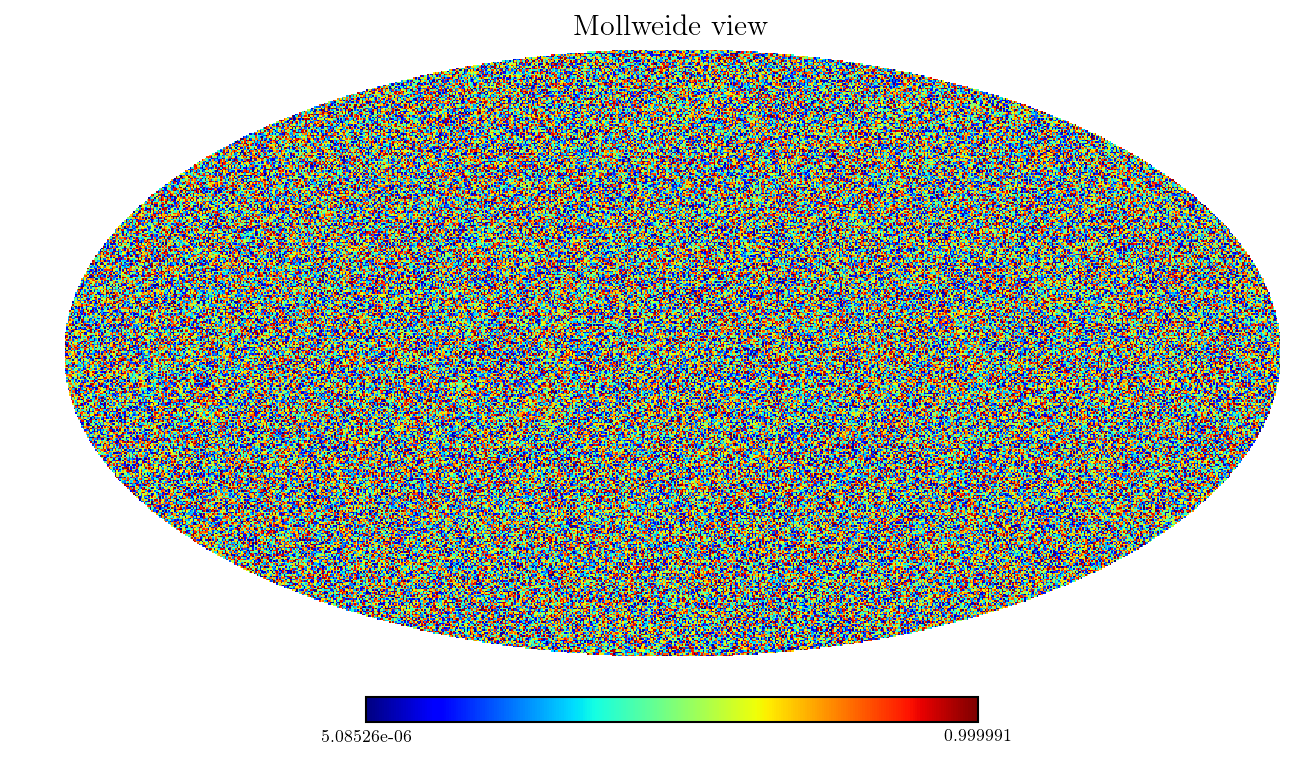

In [9]:
healpy.mollview(np.random.ranf(12*256**2))

/home/carlson/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from IPython.kernel.zmq import kernelapp as app


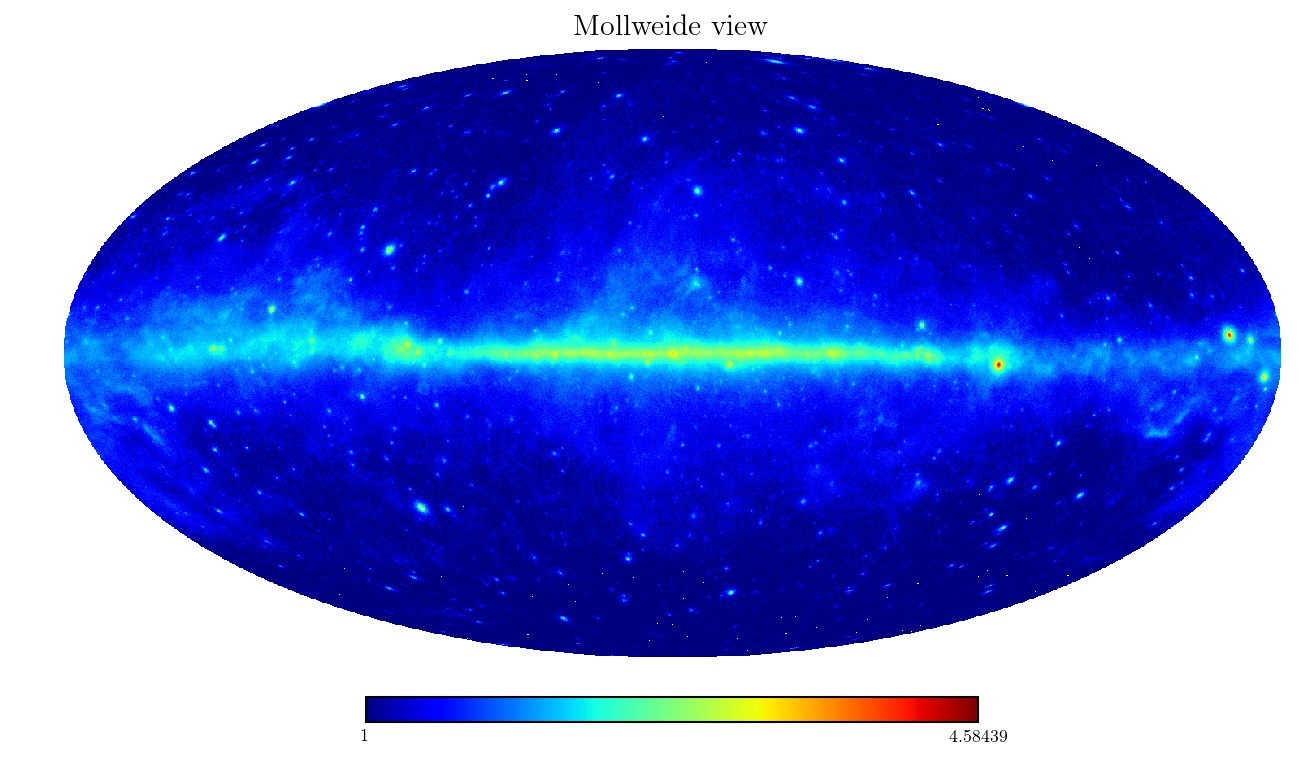

In [21]:
import healpy
healpy.mollview(np.log10(np.sum(np.load('binned_photons_P7REP_CLEAN_V15_calore.npy')[3:],axis=0)),xsize=1500, min=1)

In [1]:
h = pyfits.open('bubbles_mapcube.fits.gz')
h.info()

Filename: bubbles_mapcube.fits.gz
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      23   (1440, 721, 33)   float32   
1    ENERGIES    BinTableHDU     11   33R x 1C     [D]   


In [2]:
print h[1].data

[(100.0) (133.35214321633239) (177.82794100389228) (237.13737056616552)
 (316.22776601683785) (421.69650342858216) (562.34132519034893)
 (749.8942093324556) (999.99999999999966) (1333.5214321633237)
 (1778.2794100389222) (2371.3737056616542) (3162.2776601683777)
 (4216.9650342858204) (5623.4132519034883) (7498.9420933245538)
 (9999.9999999999927) (13335.214321633232) (17782.794100389216)
 (23713.737056616534) (31622.776601683767) (42169.650342858185)
 (56234.132519034858) (74989.420933245521) (99999.999999999913)
 (133352.14321633228) (177827.94100389211) (237137.37056616528)
 (316227.76601683756) (421696.50342858175) (562341.32519034843)
 (749894.20933245495) (999999.99999999872)]


[  8.47861095e+00   8.46988620e+00   8.74097384e+00   8.18358051e+00
   8.17600109e+00   7.65305885e+00   6.93496863e+00   6.08372093e+00
   5.16665429e+00   4.53246216e+00   3.72755260e+00   2.69234062e+00
   1.94502708e+00   1.40514552e+00   1.15572793e+00   8.62365176e-01
   6.23062442e-01   4.80331717e-01   3.70297650e-01   2.94879996e-01
   2.20074812e-01   1.58988601e-01   1.11169985e-01   8.03207787e-02
   5.80261237e-02   4.19327503e-02   3.23234960e-02   2.33538609e-02
   1.74312459e-02   1.14241888e-02   7.73484638e-03   5.23640586e-03
   3.78293561e-03   2.73318678e-03   1.91152639e-03   1.33701412e-03
   8.48559721e-04   4.88372579e-04   2.72132354e-04   1.61833282e-04]


0.22540632663301324

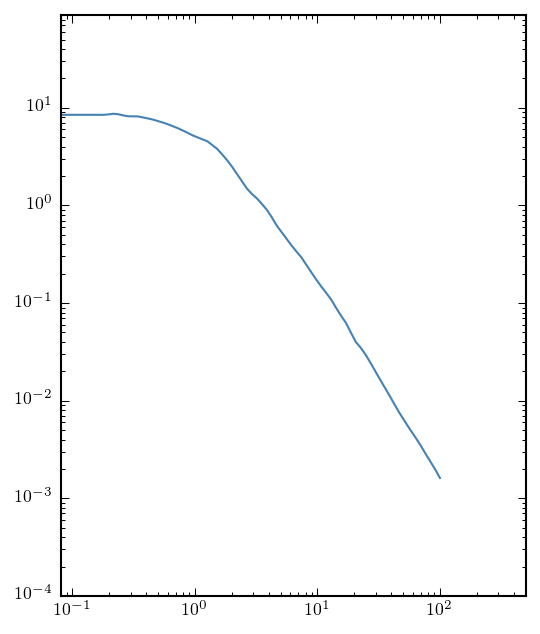

In [20]:
r_DM, rho_DM = np.genfromtxt('dm_profile_1509.02166.dat', delimiter=',').T

rho_DM_interp  = lambda r: np.exp(np.interp(np.log(r), np.log(r_DM), np.log(rho_DM)))
plt.figure(figsize=(4,5))
x = np.logspace(-2,2,100)
plt.loglog(x, rho_DM_interp(x))
plt.xlim(8e-2,500)
plt.ylim(1e-4,9e1)

rho_DM_interp(8.5)
